In [1]:
import os
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler

#CifParser：cifを読み込むためのモジュール
from pymatgen.io.cif import CifParser
from pymatgen.analysis.diffraction.xrd import XRDCalculator

plt.rcParams["font.size"] = 25
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def diffraction_angle_change(XRD_pattern, XRD_pattern_angle,lambda1, lambda2): 
    """
    Modified 240810 by S.Matsuno @ Tohoku Univ.
    
    XRD_pattern: data
    lambda1: 変換前のpatternの波長
    lambda2: 変換後のpatternの波長
    """
    diffraction_angle_lambda1 = XRD_pattern_angle
    
    #lambda1 = 0.6999200 # refinement result by manually 手動でパラメータ動かし波長決定→0.6999200 ver 240304
    #lambda2 = 1.5418
    
    diffraction_angle_lambda1 = diffraction_angle_lambda1/2 # 2theta → thetaに変換
    diffraction_angle_lambda1_radians = [math.radians(angle) for angle in diffraction_angle_lambda1] # 度数法からラジアンに変換
    theta2_list = []
    d_value_list = []
    
    # リストの各要素に対して計算を実行
    for angle in diffraction_angle_lambda1_radians:
        # lambda2 * sin(angle) / lambda1 の計算結果が -1 から 1 の範囲内に収まるようにする必要があることに注意
        sin_value = (lambda2 * math.sin(angle)) / lambda1
        if -1 <= sin_value <= 1:  # math.asin の定義域は [-1, 1]
            theta2 = math.degrees(math.asin(sin_value)) 
            theta2 = theta2*2 #theta → 2thetaに変換
            theta2_list.append(theta2)
            
            # Calculate d-value using the original angle in radians and lambda2
            d_value = lambda1 / (2 * math.sin(angle))
            d_value_list.append(d_value)
        else:
            # 範囲外の場合はエラー処理や適切な処理をここに記述
            pass
    ################################################ Diff Angle change       
    XRD_pattern_changed = XRD_pattern.iloc[0:len(theta2_list)].copy()
    XRD_pattern_changed.loc[:, "2θ_changed"] = theta2_list 
    XRD_pattern_changed.loc[:, "d-value"] = d_value_list
    
    return XRD_pattern_changed



In [4]:
# データが含まれるフォルダーのパスを定義
folder_path = "../0_Data/2_Compiled_Data/"
# サンプル名のリストが含まれるExcelファイルを読み込んでデータフレームにする
Sample_name_list = pd.read_excel(folder_path + "Sample_name_list.xlsx")
############################################################ リートベルトデータフォルダーのパスを定義
M_L_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/1_Rietveld/Laboratory/Mafic"
P_L_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/1_Rietveld/Laboratory/Pelitic"

M_S_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/1_Rietveld/SPring-8/Mafic"
P_S_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/1_Rietveld/SPring-8/Pelitic"

path_rietveld_folder = [M_L_path, P_L_path, M_S_path, P_S_path]
############################################################ リートベルトデータフォルダーのパスを定義


############################################################ Path_Df
# 指定されたディレクトリおよびそのサブディレクトリ内のすべての.xyファイルを見つけるためにglobを使用
path_glob = []
full_path_glob = []
for path in path_rietveld_folder:
    path_glob_result = glob.glob(path + "/*/*.xy")
    full_path_glob = full_path_glob+path_glob_result

    # Split
    path_glob_result_split = [path.split("/") for path in path_glob_result]
    path_glob = path_glob+path_glob_result

path_glob = [path.split("/") for path in path_glob]
Path_Df = pd.DataFrame([path[-1] for path in path_glob], columns=["xy"])
Path_Df["Path"] = full_path_glob
Path_Df.index = Path_Df["xy"].str.split(".", expand=True)[0]
############################################################ Path_Df
Path_Df.to_excel(folder_path + "Path_Rietveld_df.xlsx")

# NAME LIST
name_SP_Mafic = Sample_name_list[Sample_name_list["Rock_Type"]=="Mafic Schist"]["SP-8"]
name_LAB_Mafic = Sample_name_list[Sample_name_list["Rock_Type"]=="Mafic Schist"]["LAB"]
name_SP_Pelitic = Sample_name_list[Sample_name_list["Rock_Type"]=="Pelitic Schist"]["SP-8"]
name_LAB_Pelitic = Sample_name_list[Sample_name_list["Rock_Type"]=="Pelitic Schist"]["LAB"]

name_SP = Sample_name_list["SP-8"]
name_LAB = Sample_name_list["LAB"]

lambda_SP = 0.6999200 # refinement result by manually 手動でパラメータ動かし波長決定→0.6999200 ver 240304
lambda_LAB = 1.5418

SP-MTN-42 46_MTN2011090101B_Theta_2-Theta


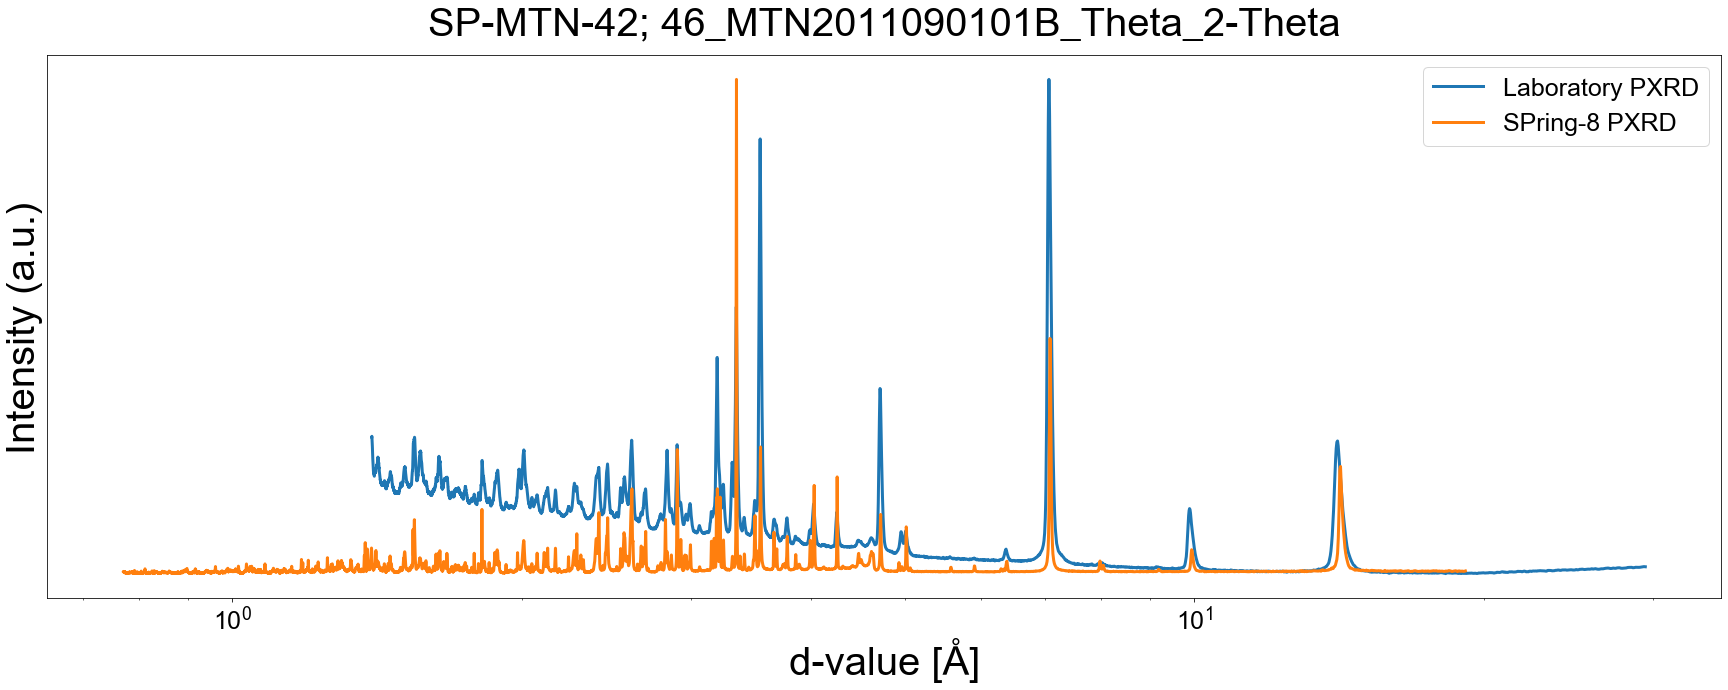

SP-MTN-43 47_MTN2011090101C_Theta_2-Theta


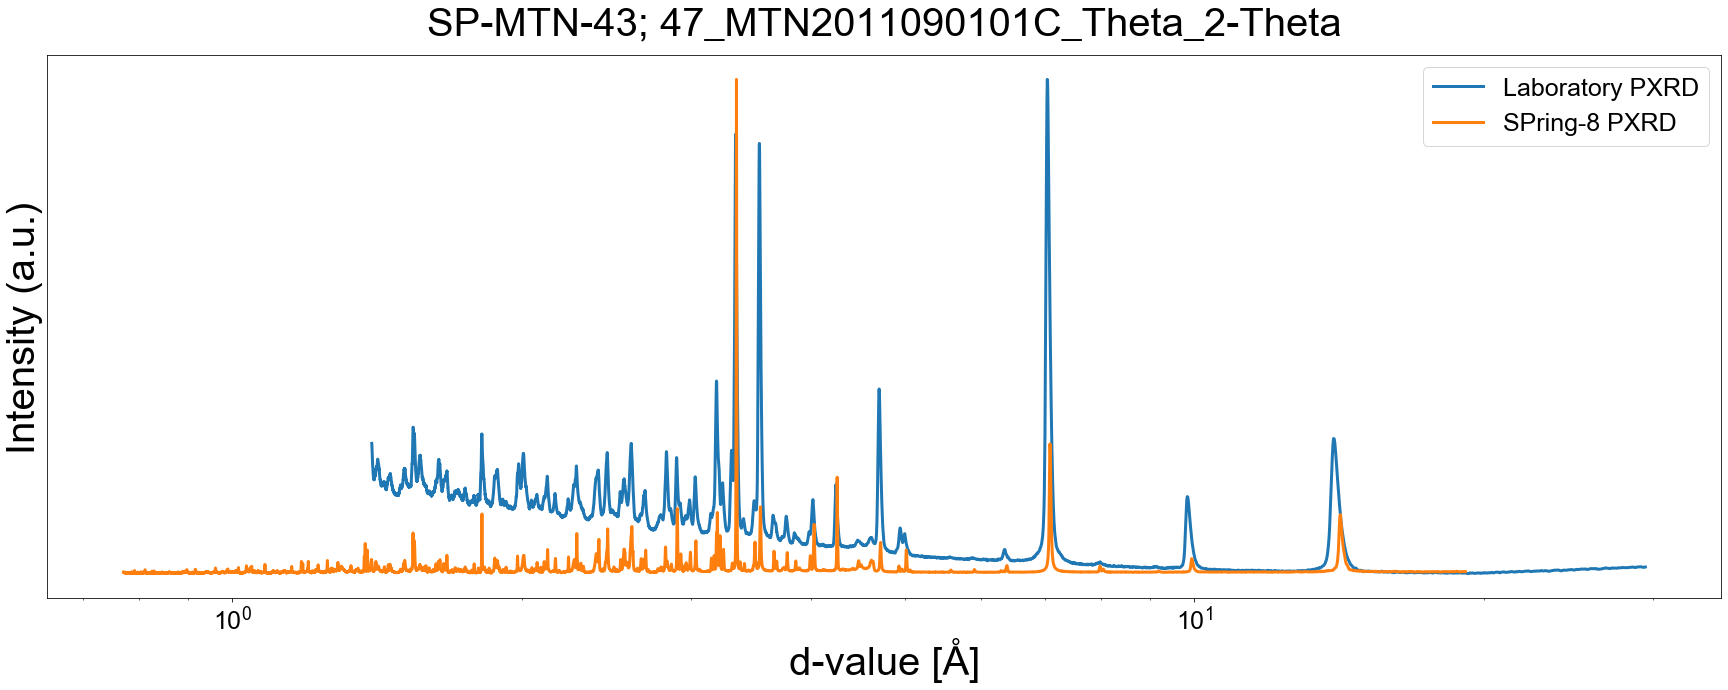

SP-MTN-44 48_MTN2011090101D_Theta_2-Theta


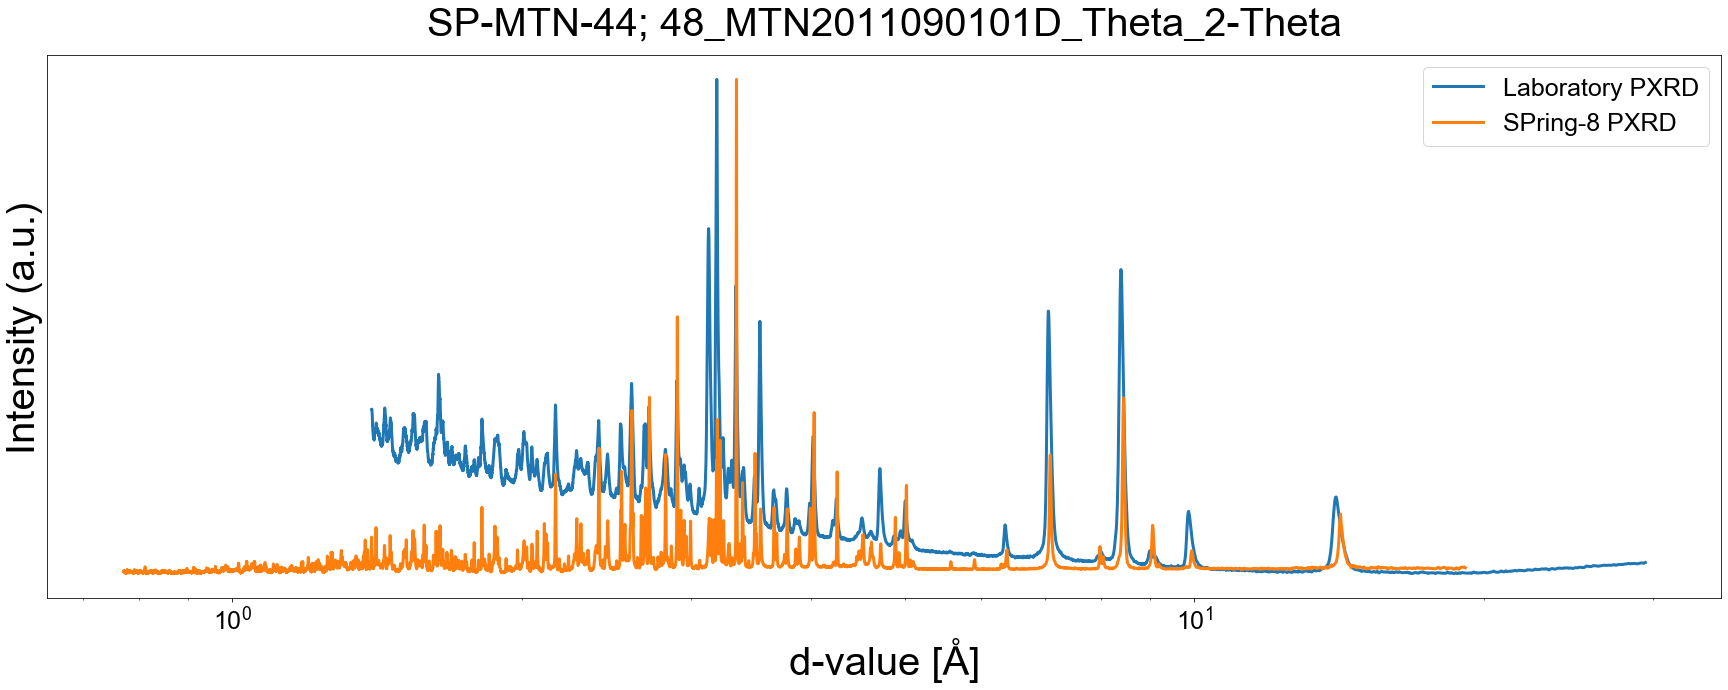

SP-MTN-45 49_MTN2011090101E_Theta_2-Theta


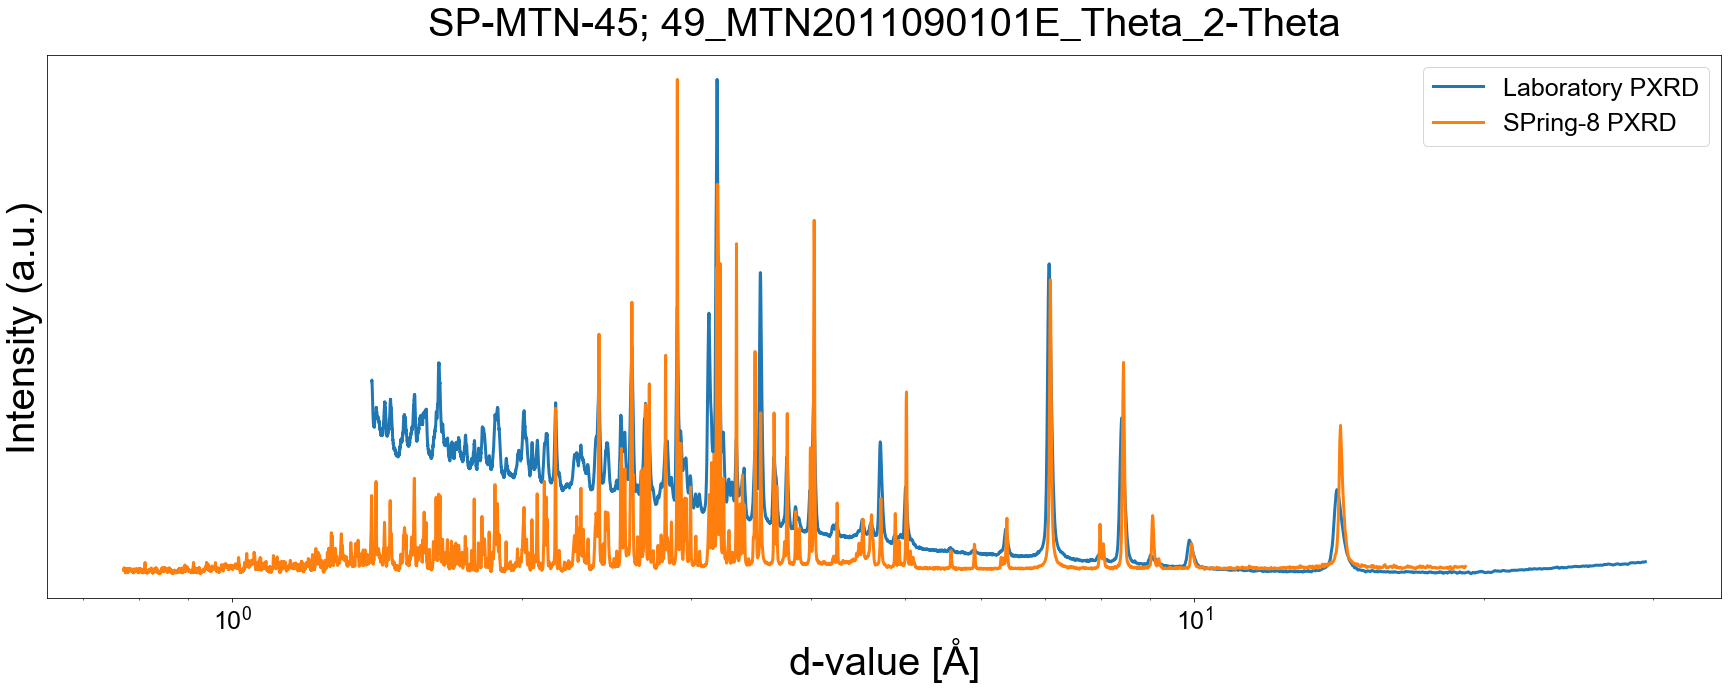

SP-MTN-46 50_MTN2011090101F_17_Theta_2-Theta


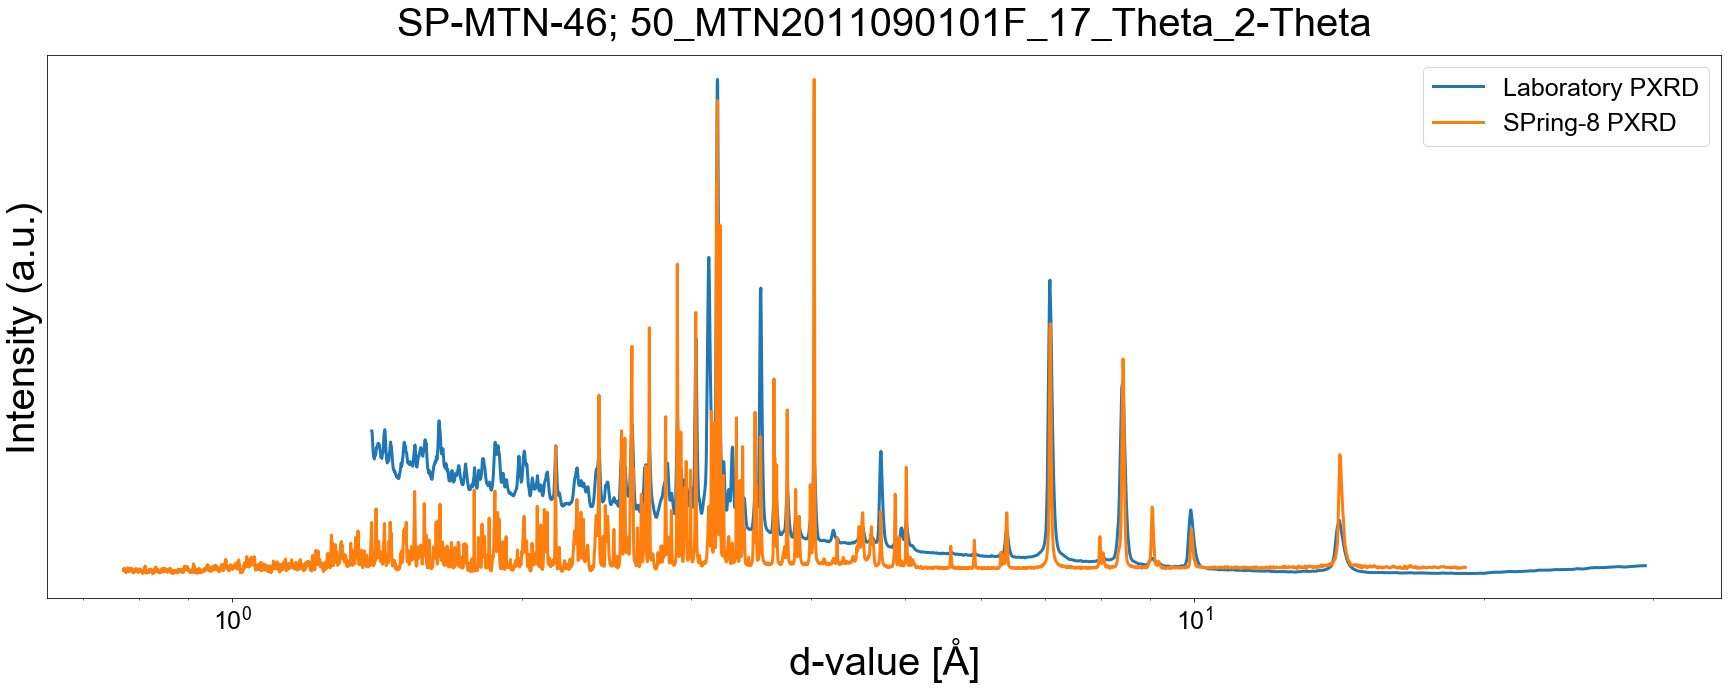

SP-MTN-47 51_MTN2011090101G_Theta_2-Theta


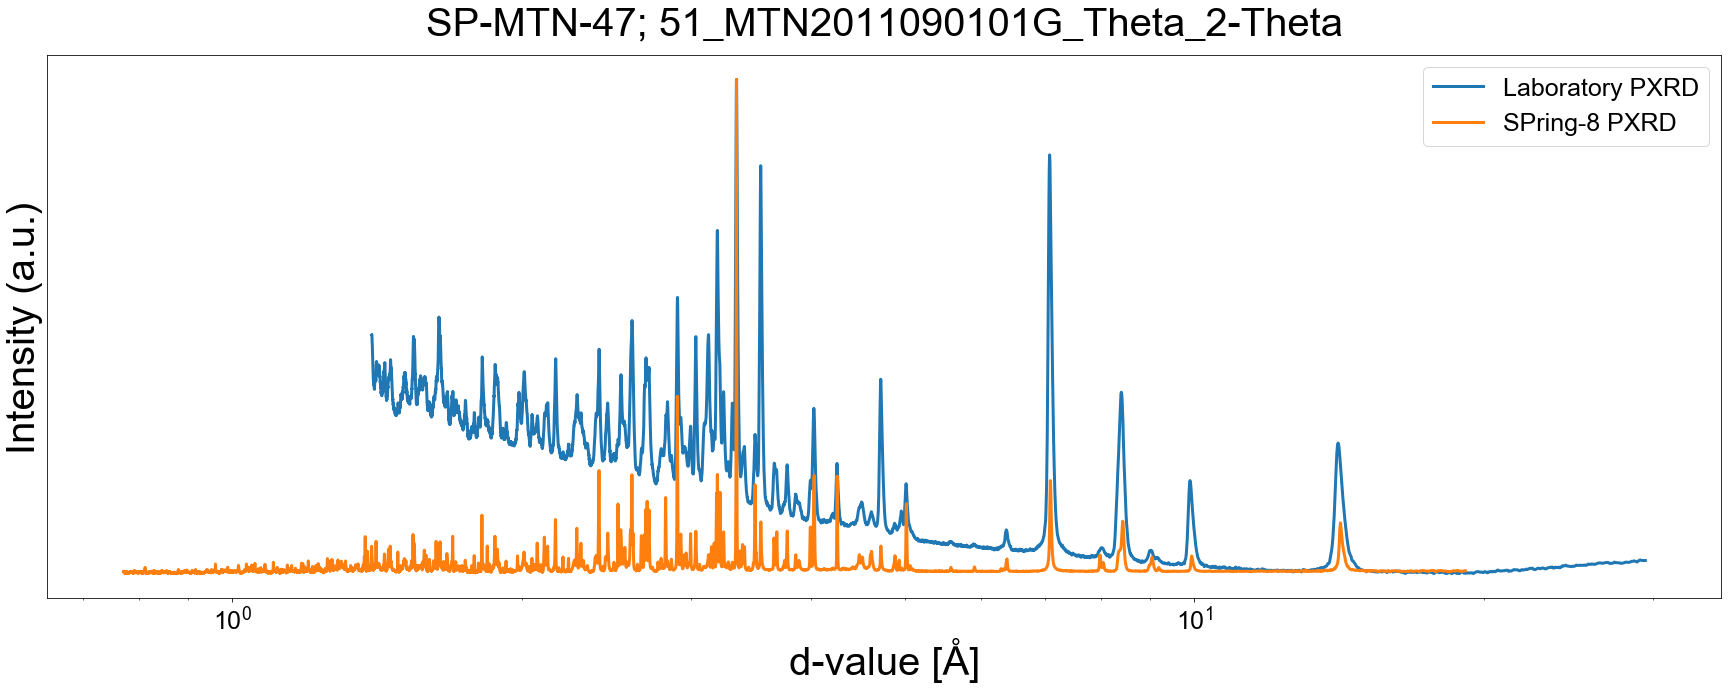

SP-MTN-56 63_MTN2107310101A_A-1_Theta_2-Theta


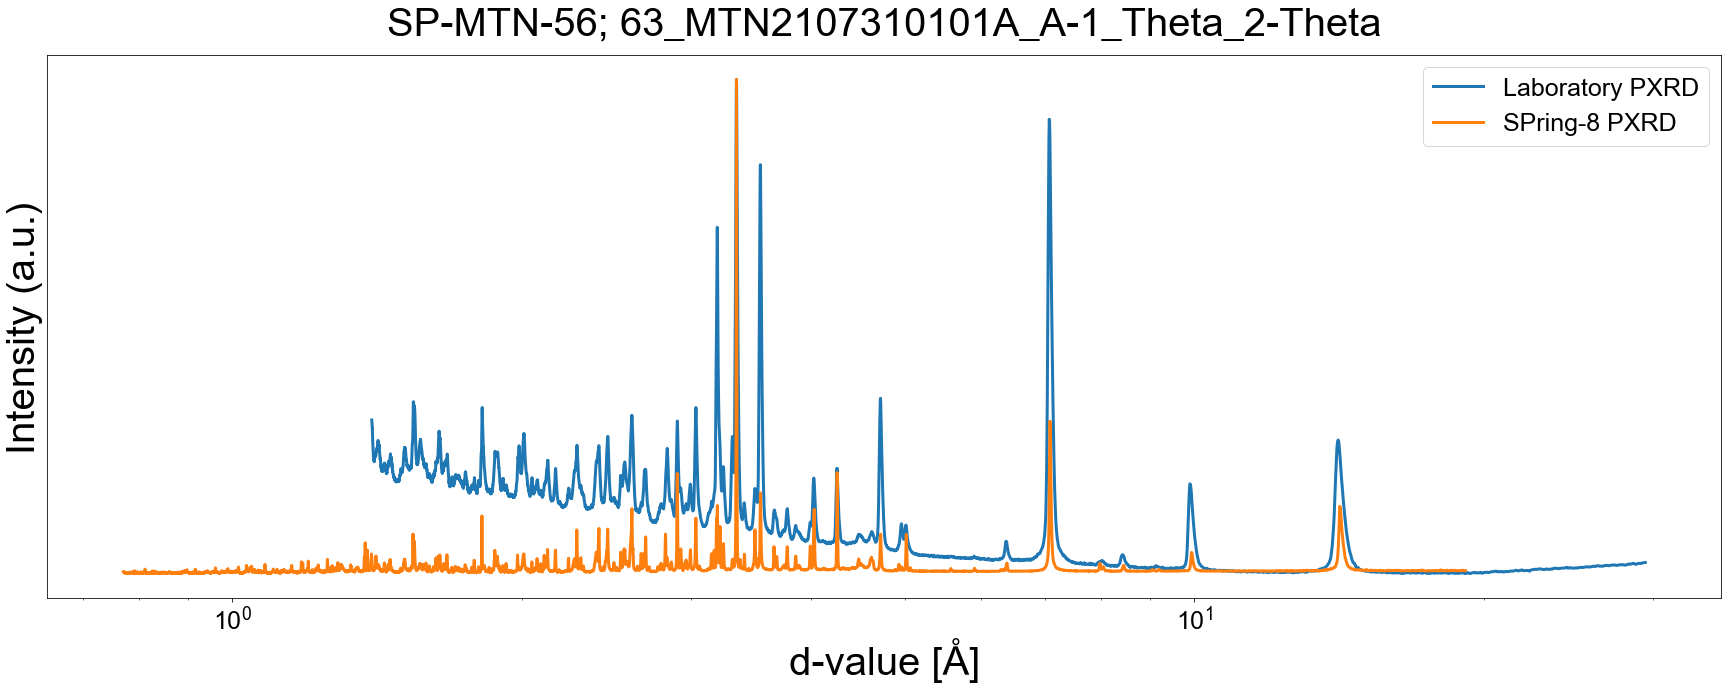

SP-MTN-57 64_MTN2107310101A_A-2_Theta_2-Theta


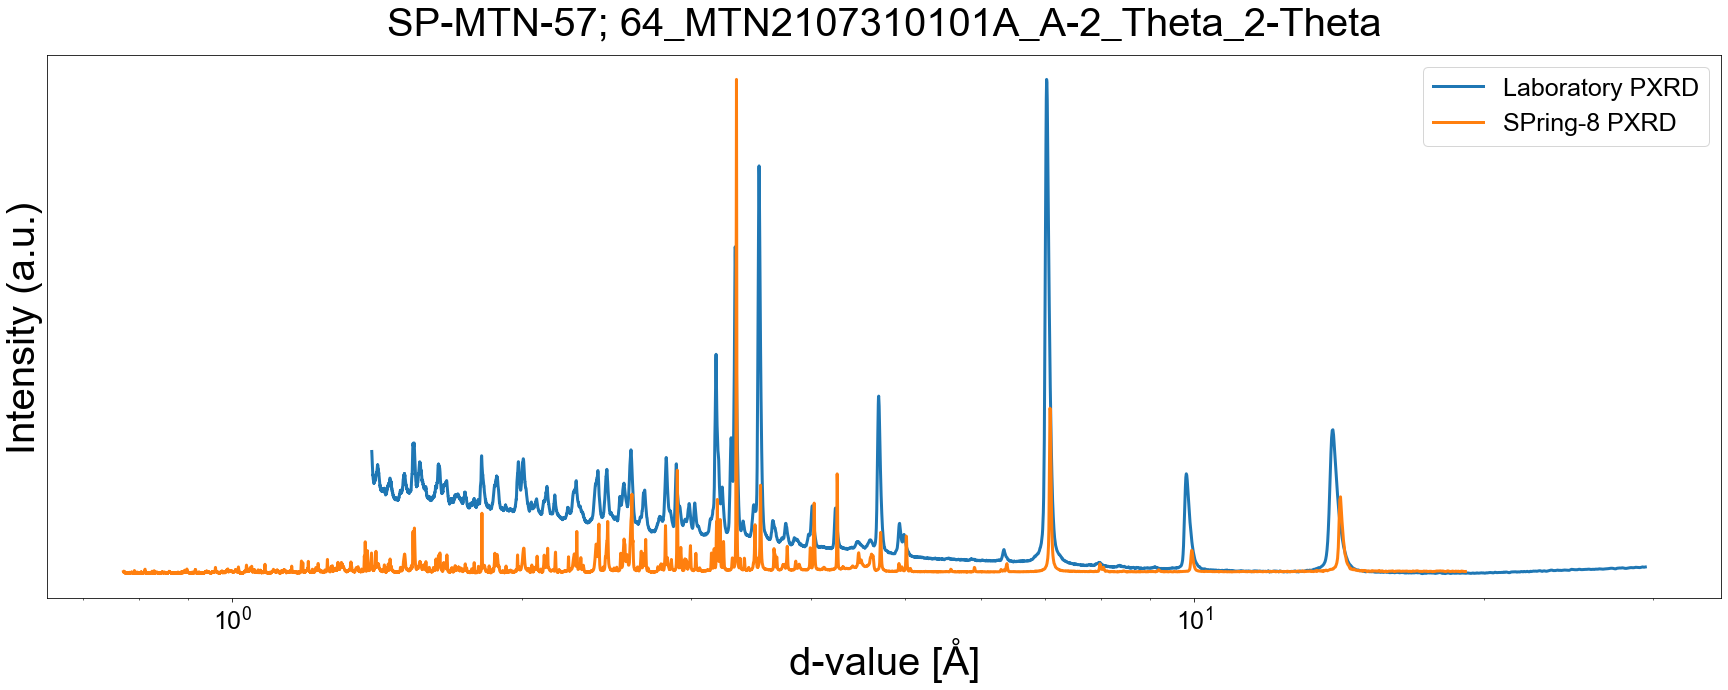

SP-MTN-58 65_MTN2107310101A_B-1_Theta_2-Theta


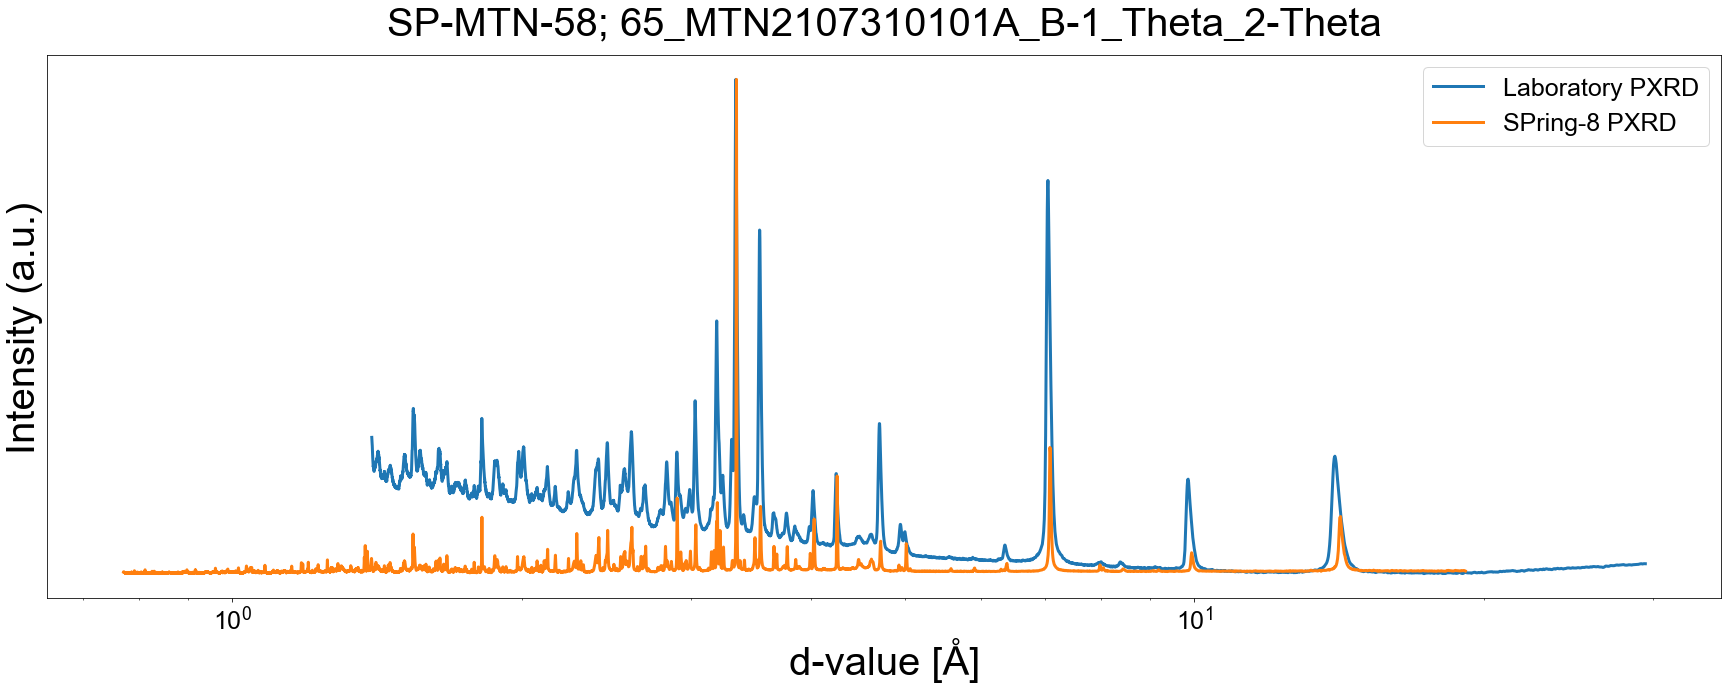

SP-MTN-59 66_MTN2107310101A_B-2_retry_Theta_2-Theta


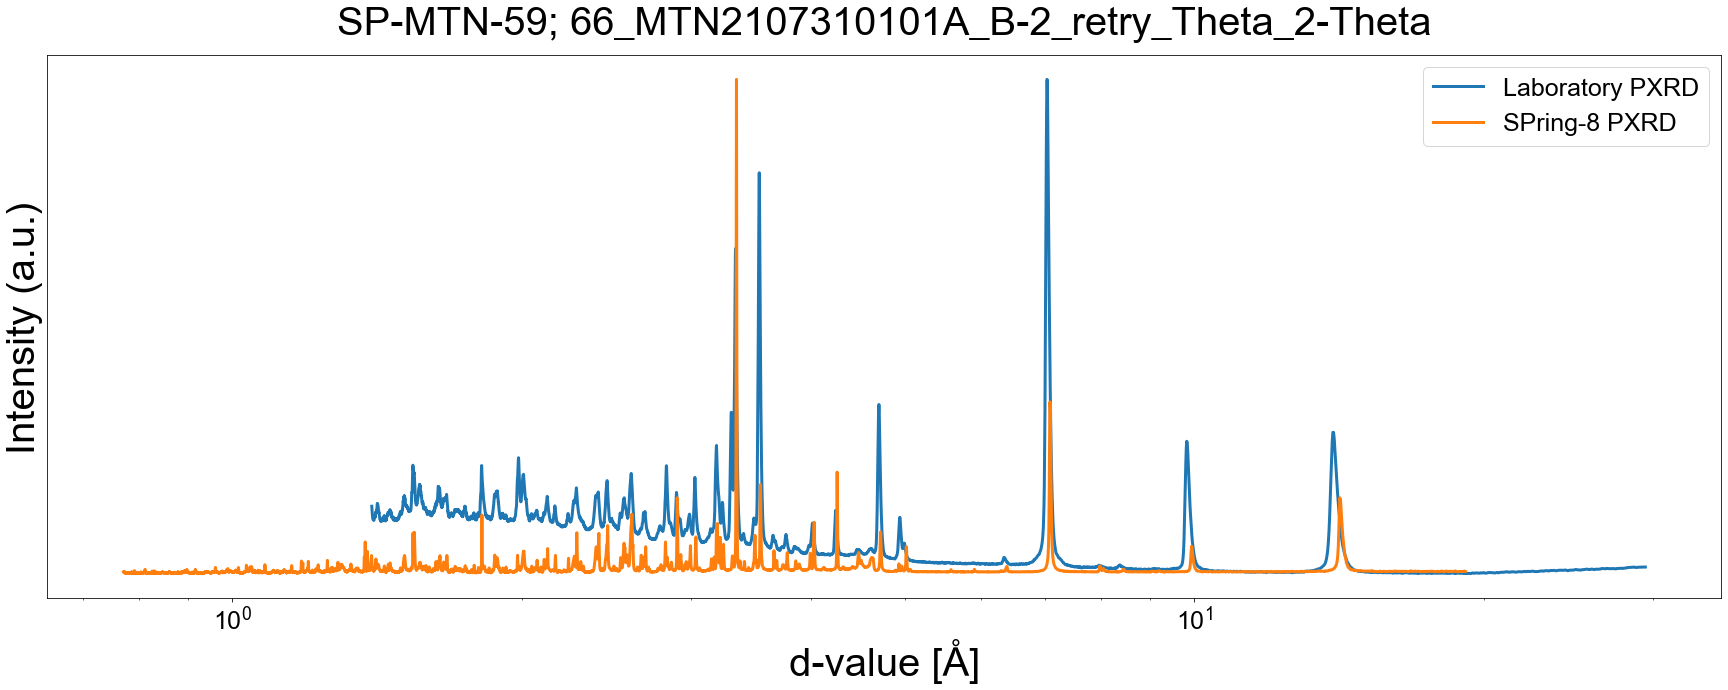

SP-MTN-60 67_MTN2107310101A_C-1


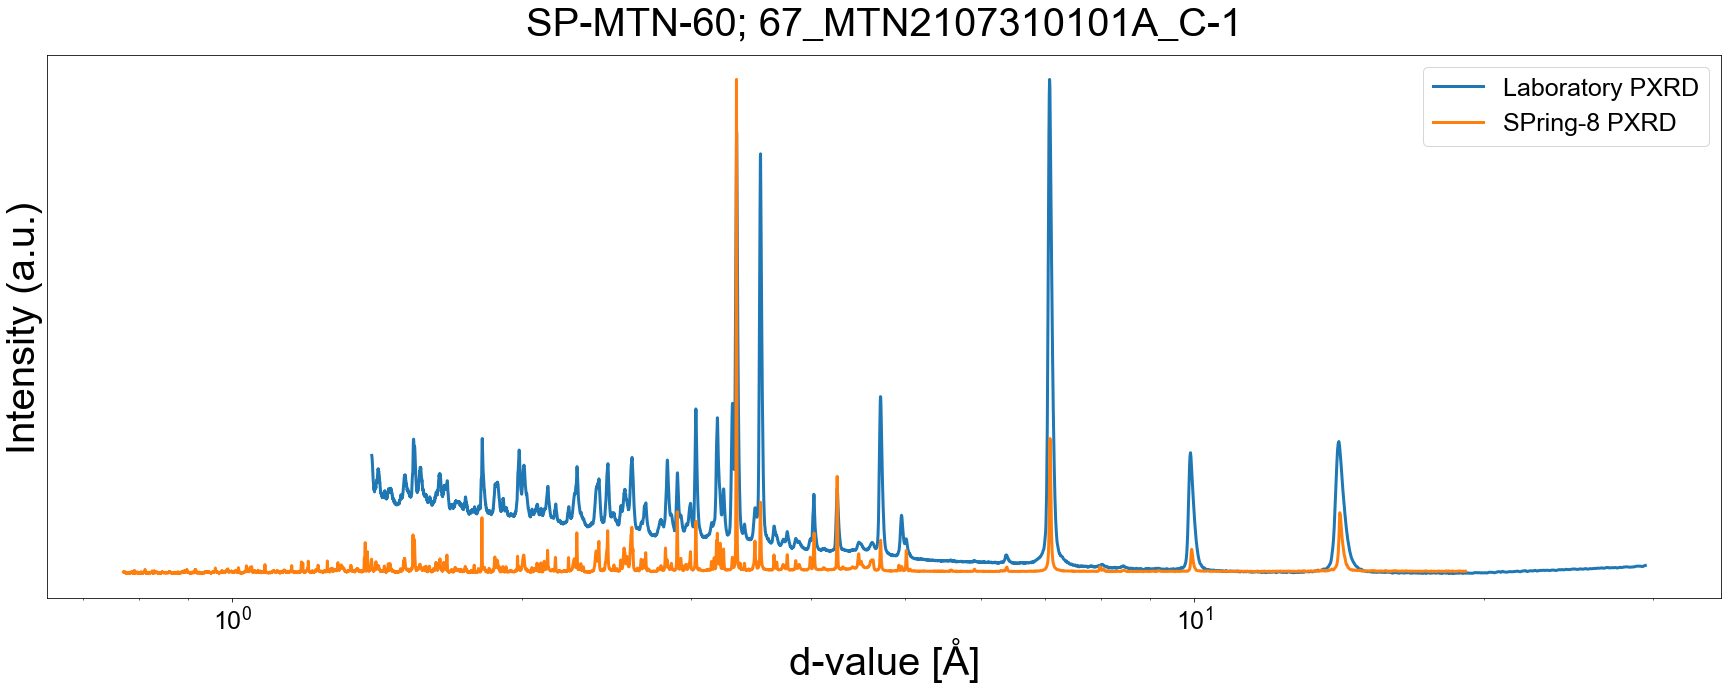

SP-MTN-61 68_MTN2107310101A_C-2_Theta_2-Theta


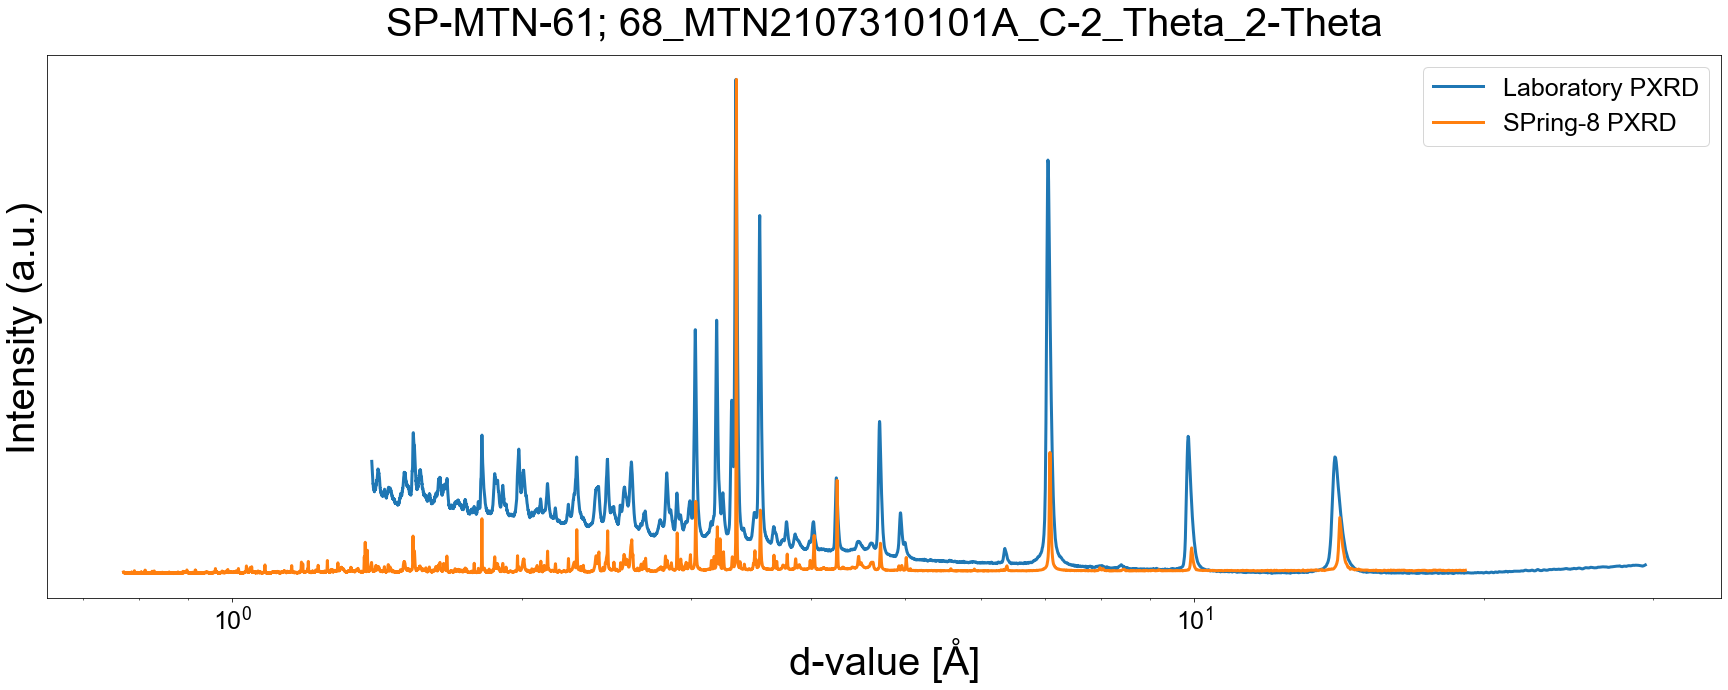

SP-MTN-70 104_MTN22051304_Theta_2-Theta


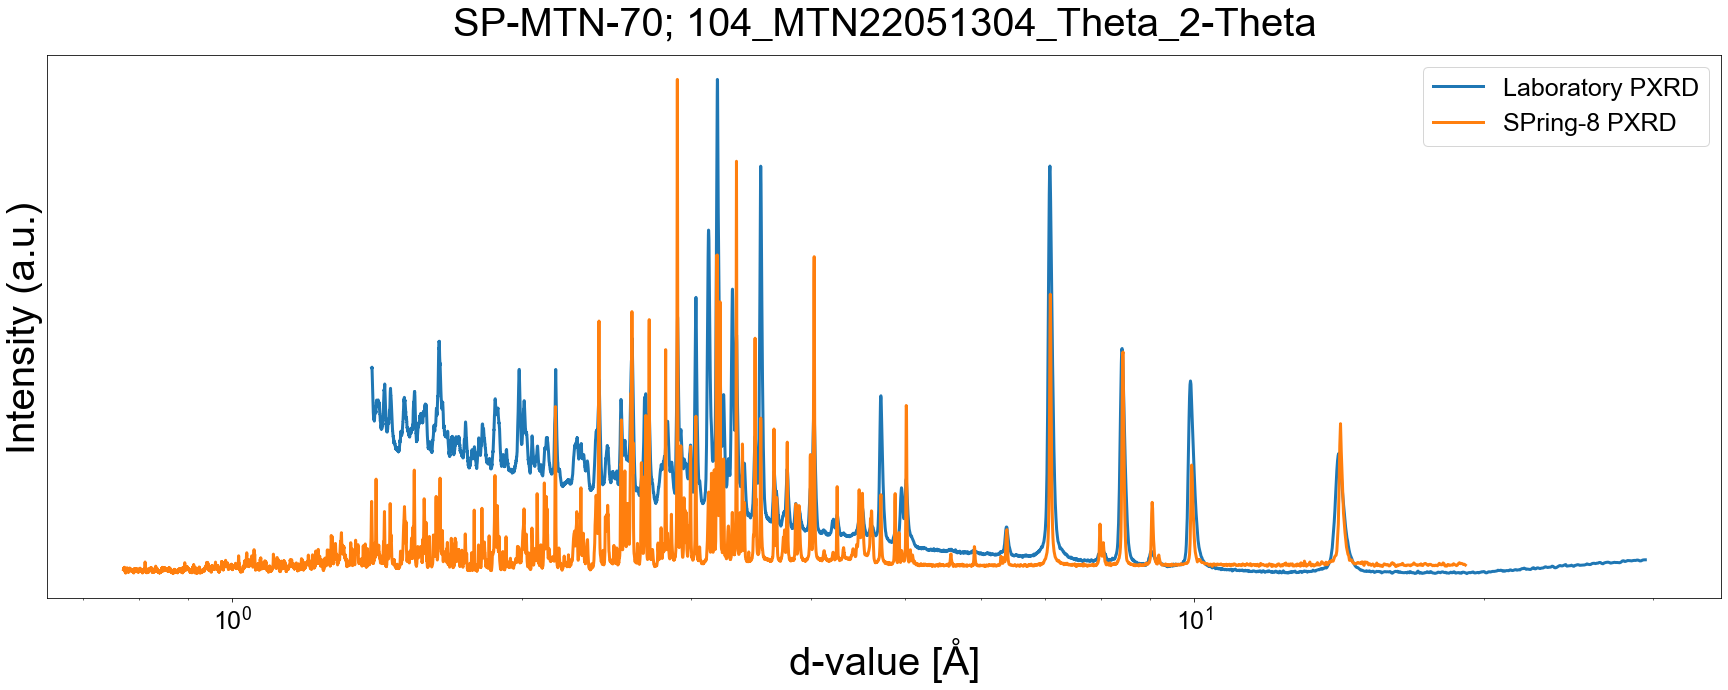

SP-MTN-71 105_MTN22051305_Theta_2-Theta


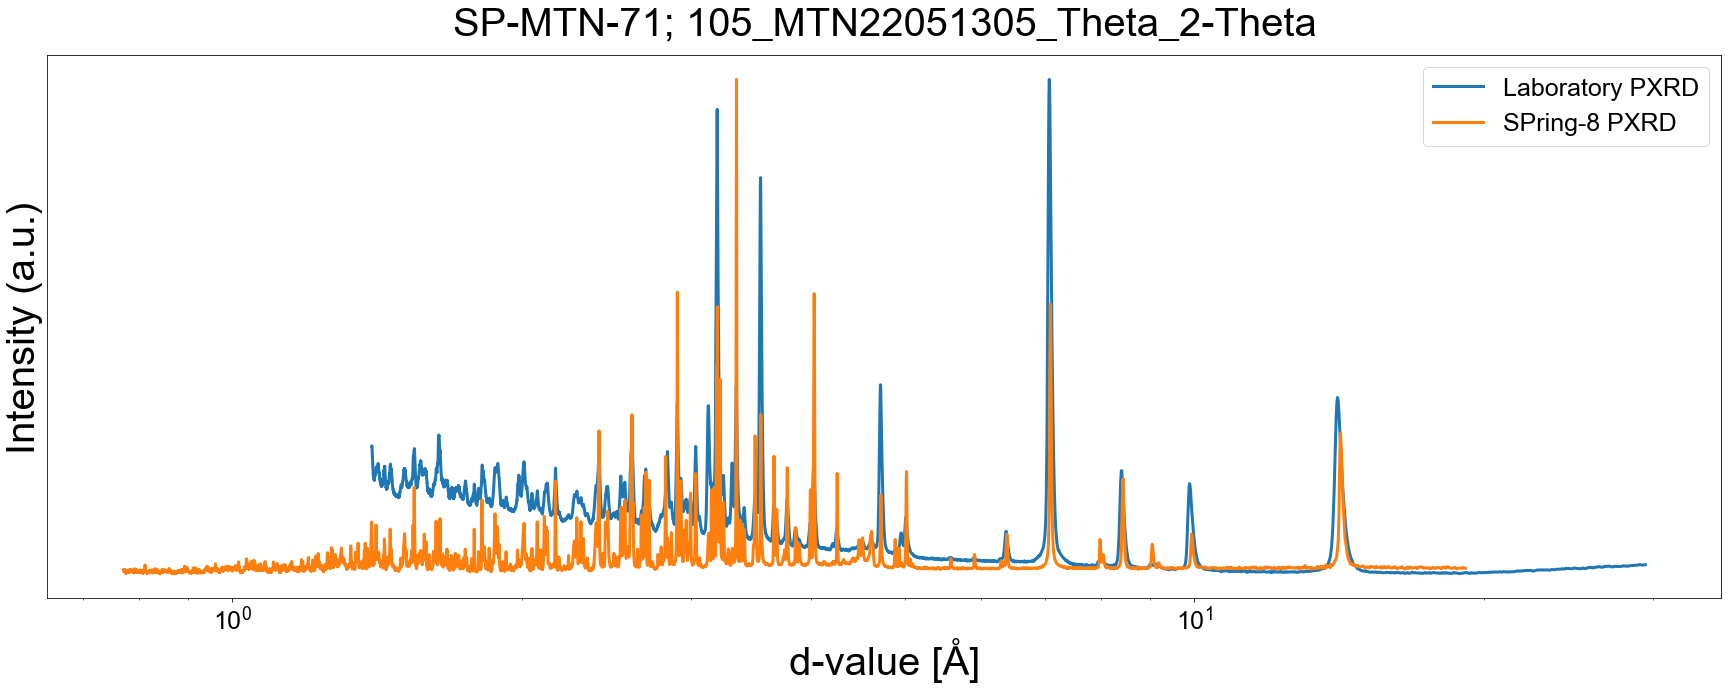

SP-MTN-72 106_MTN22051306_Theta_2-Theta


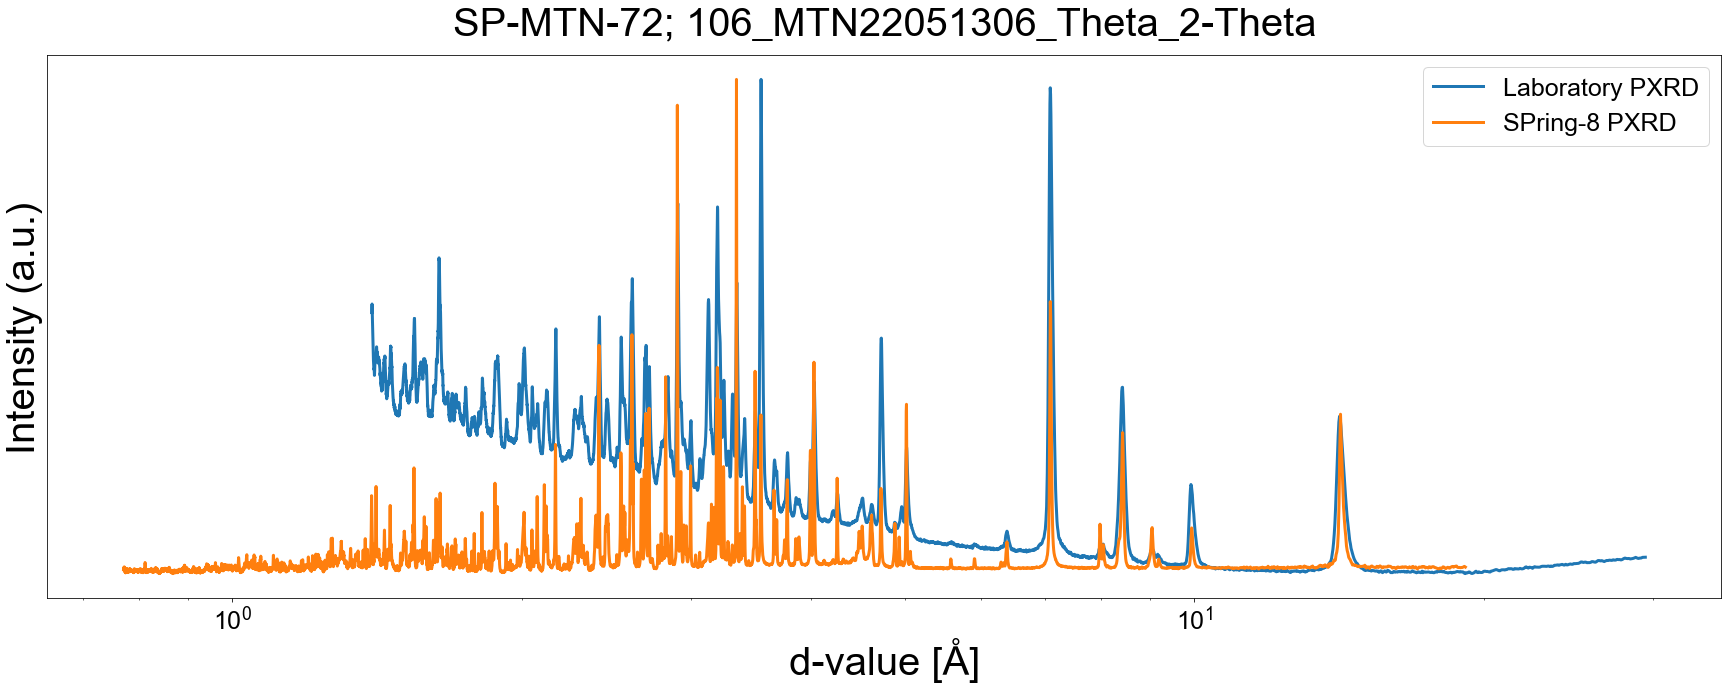

SP-MTN-78 112_MTN22051312_Theta_2-Theta


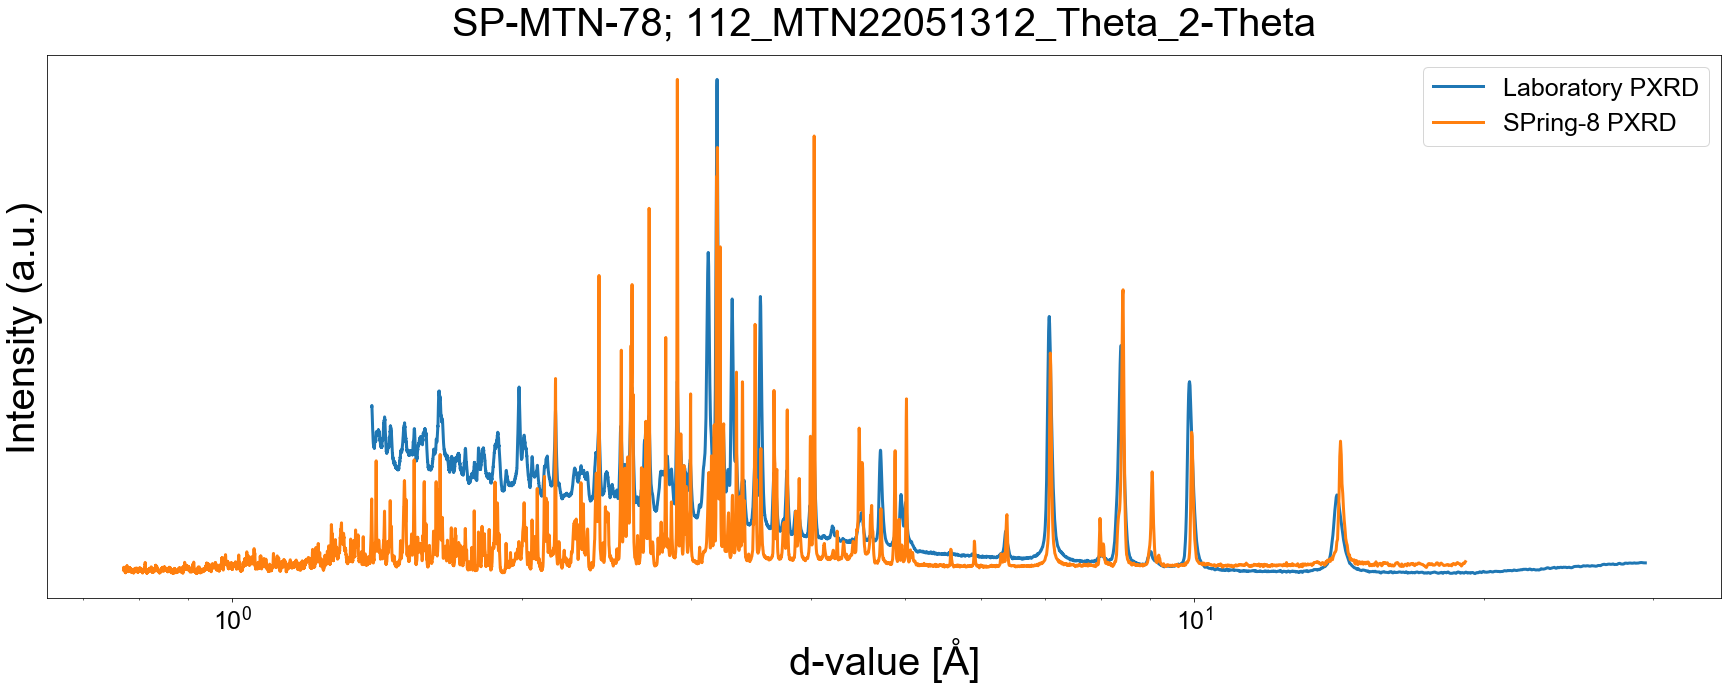

SP-MTN-83 118_MTN22051301-01_Theta_2-Theta


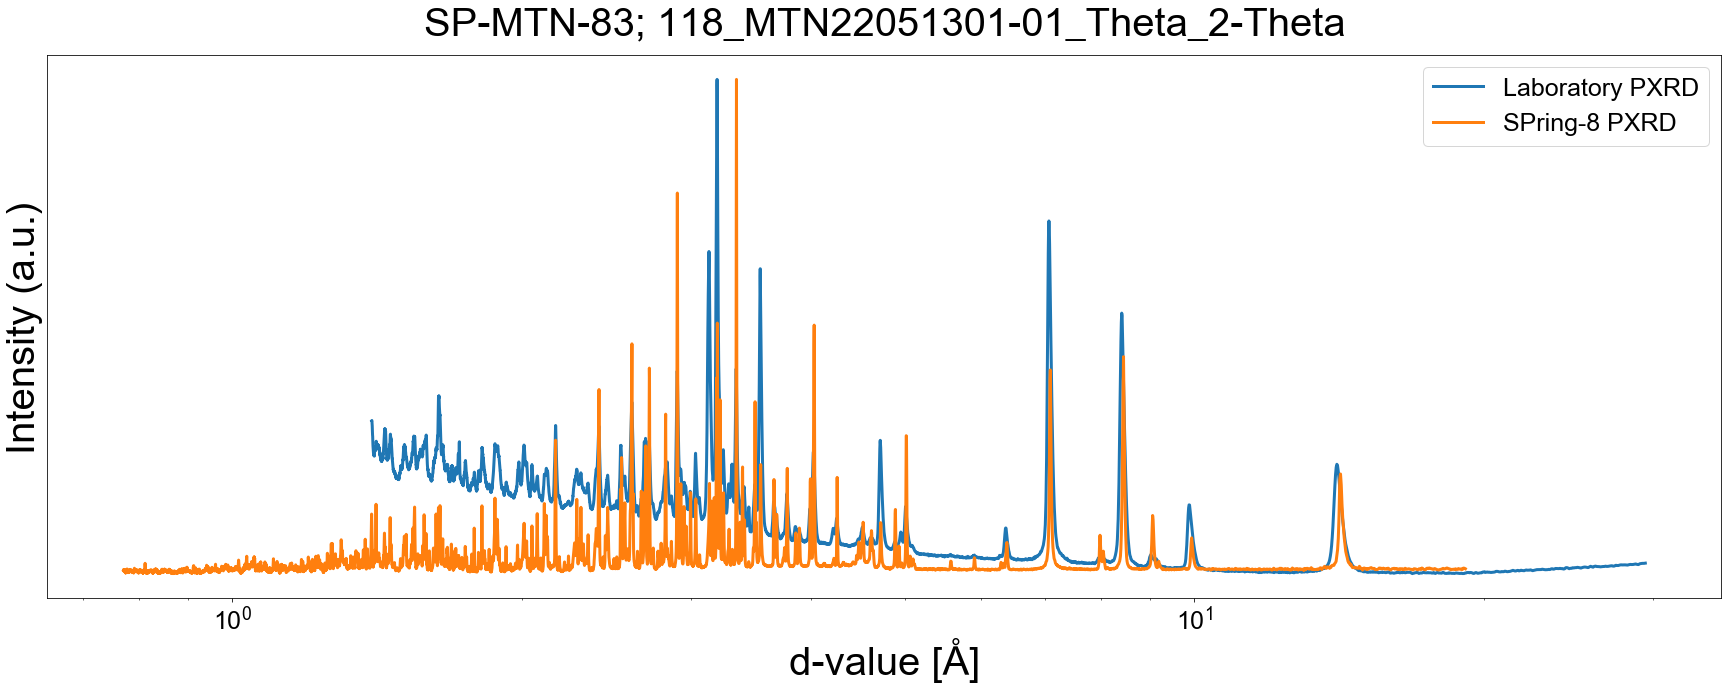

SP-MTN-84 119_MTN22051301-02


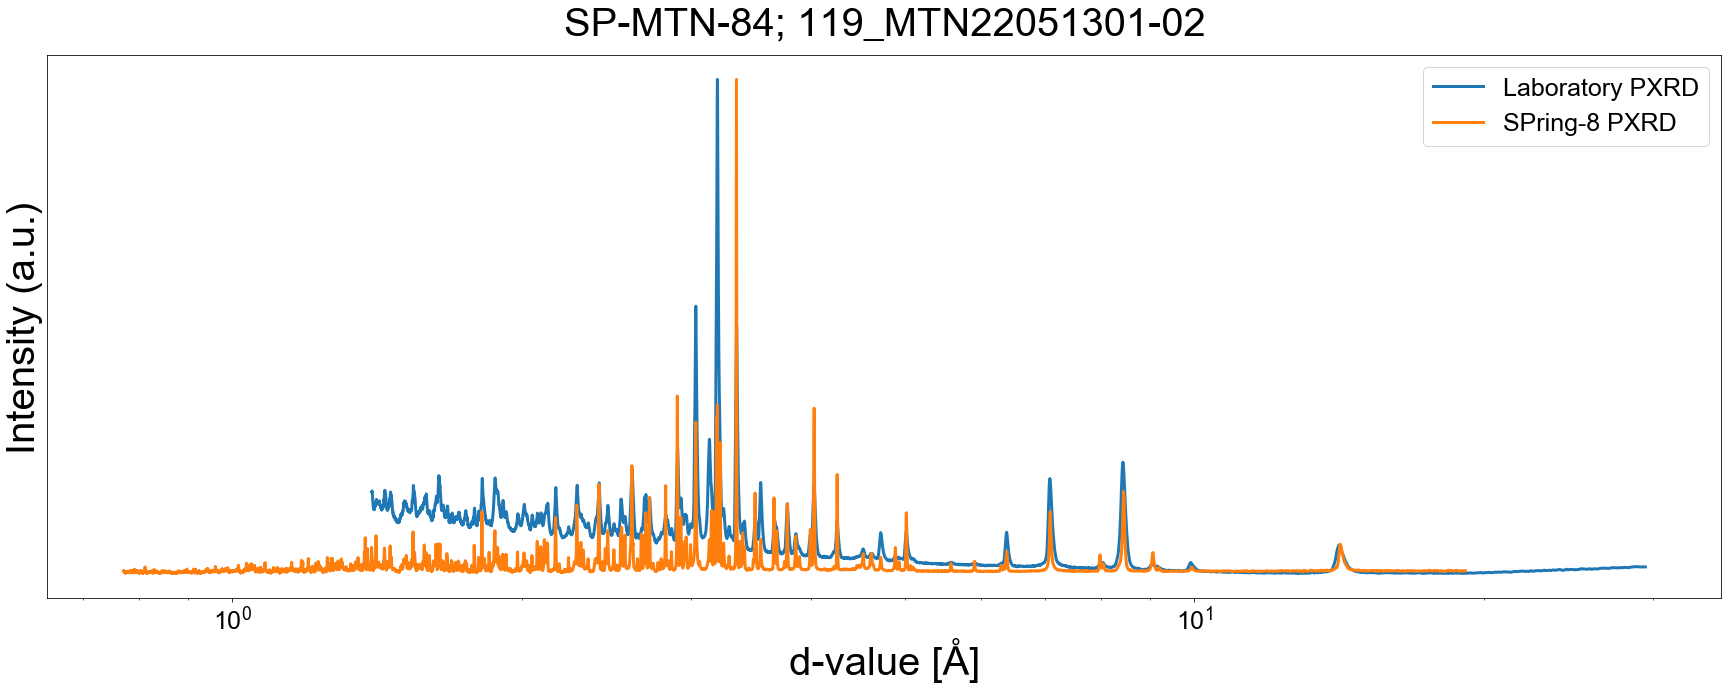

SP-MTN-85 121_MTN22051302-1_Theta_2-Theta


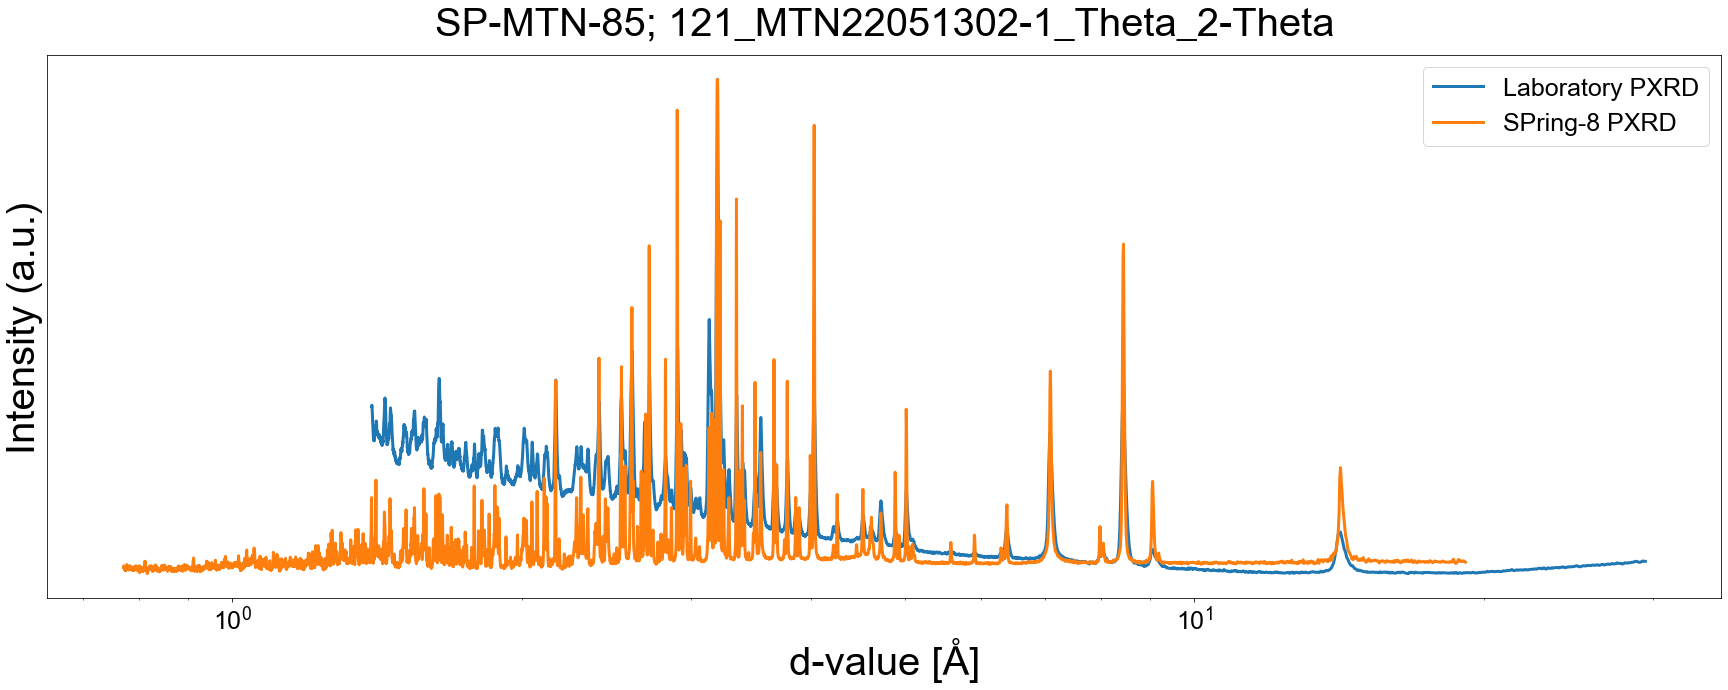

SP-MTN-86 122_MTN22051302-2_Theta_2-Theta


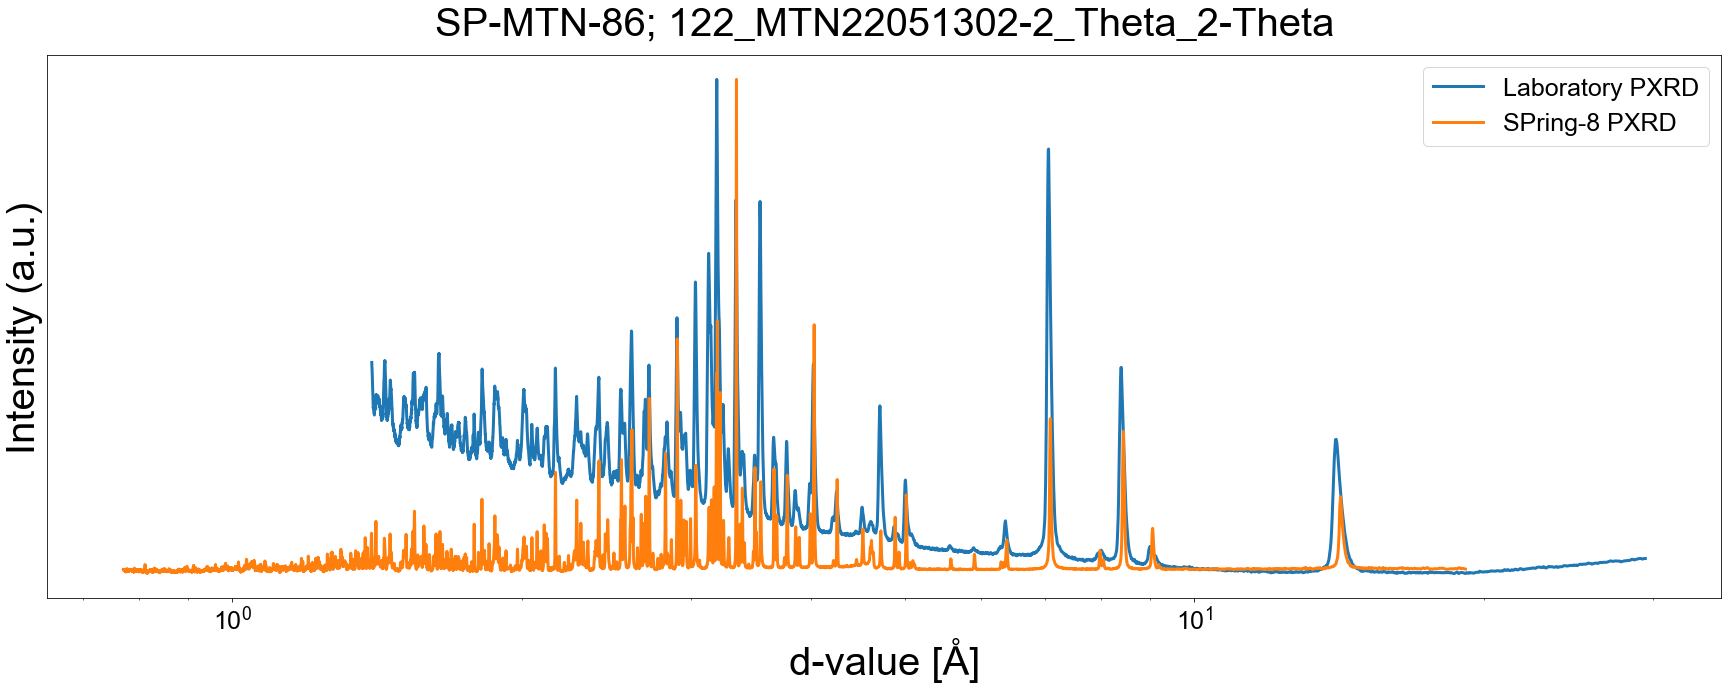

SP-MTN-87 123_MTN22051302-3_Theta_2-Theta


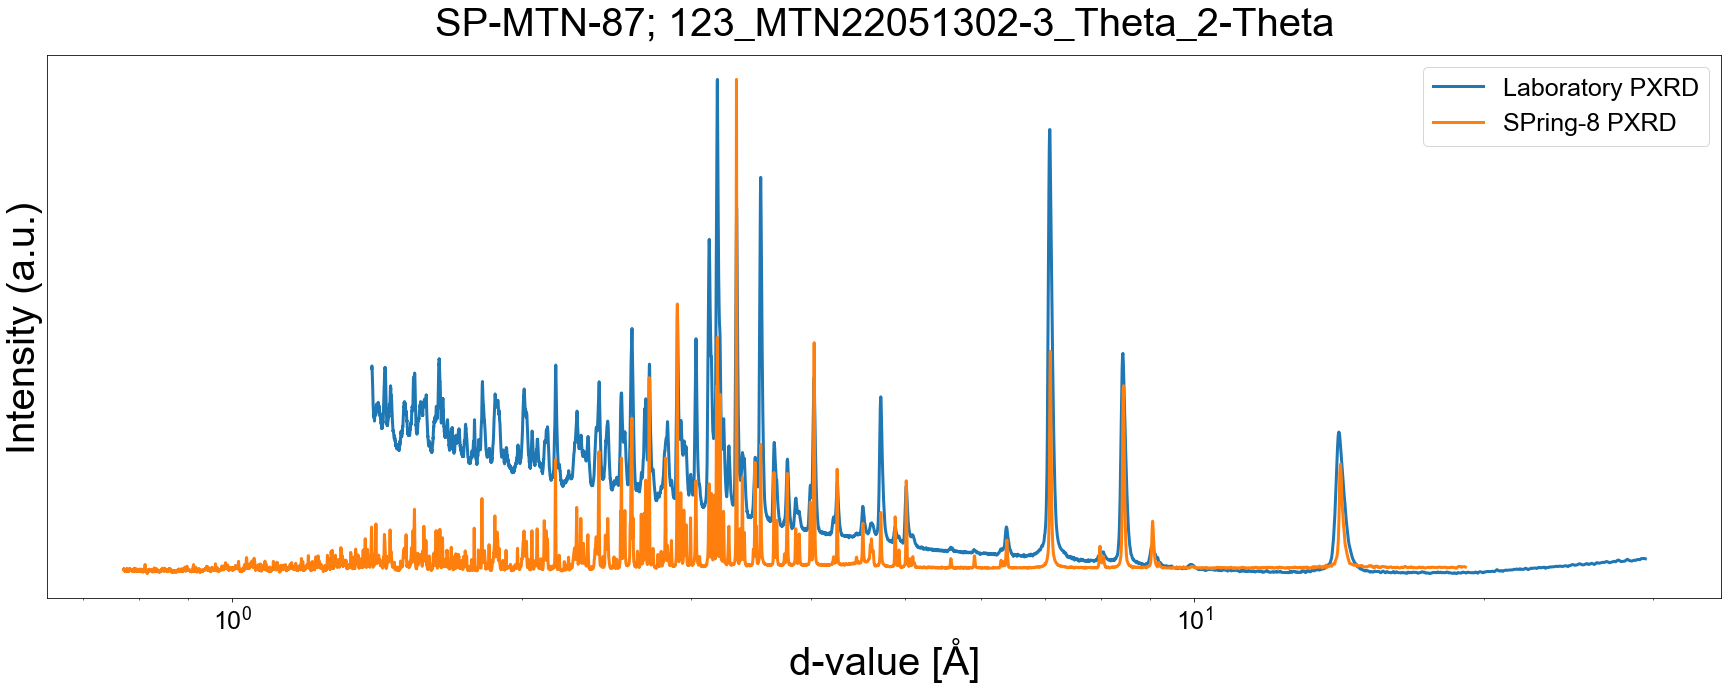

SP-MTN-88 124_MTN22051302-4_Theta_2-Theta


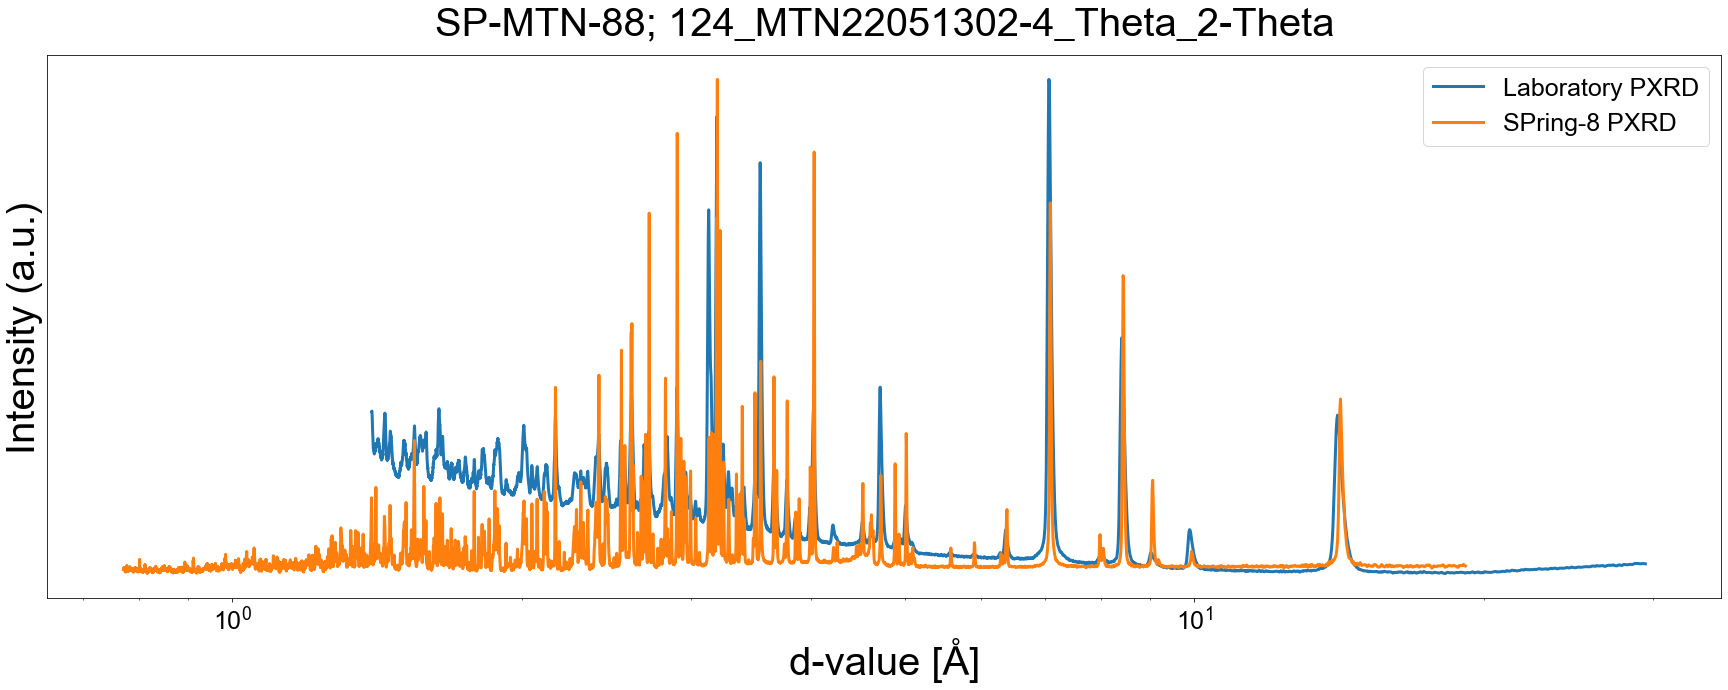

SP-MTN-92 138_10rpm-8-1903-8_Theta_2-Theta


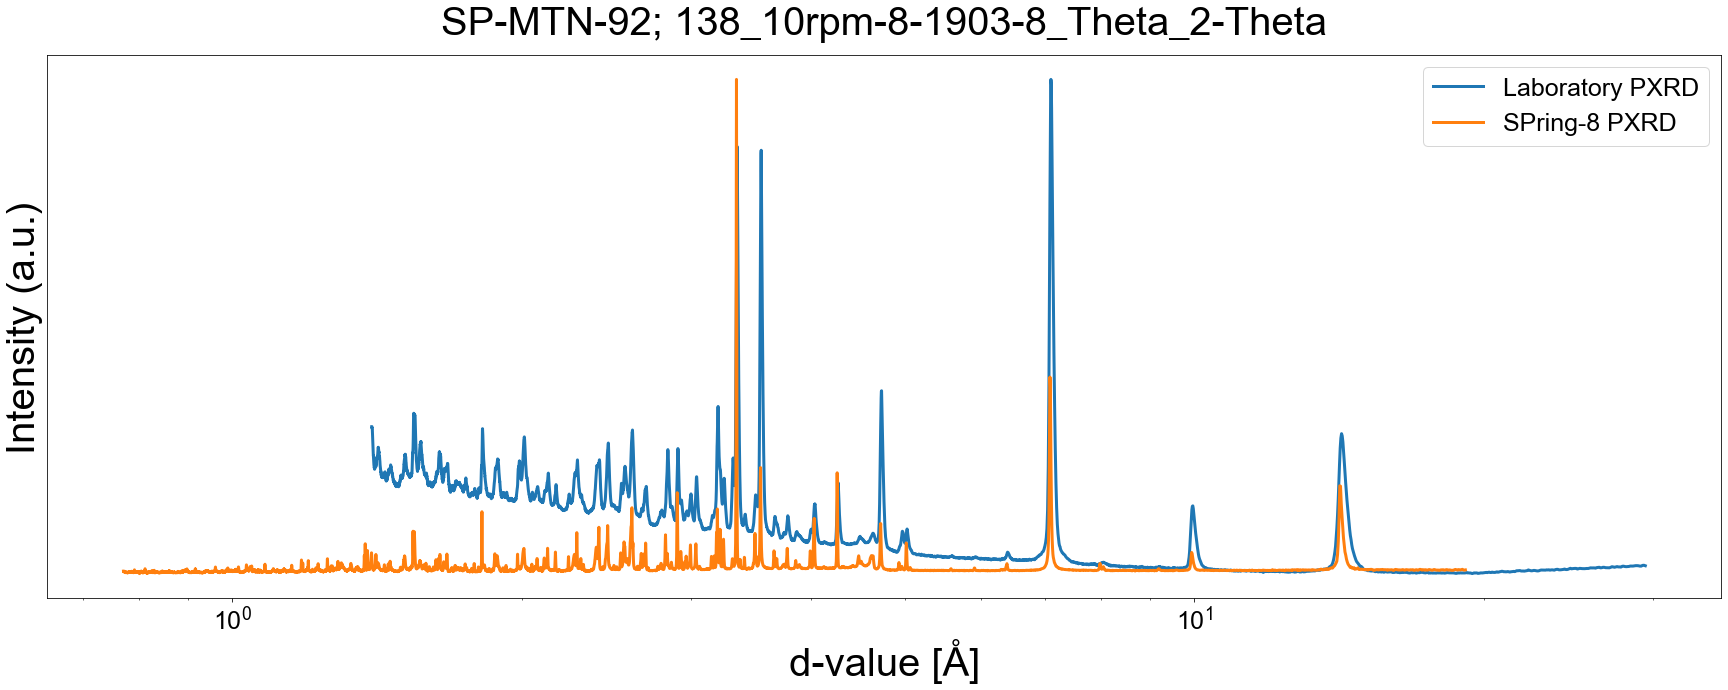

SP-MTN-93 139_10rpm-7-1903-7_Theta_2-Theta


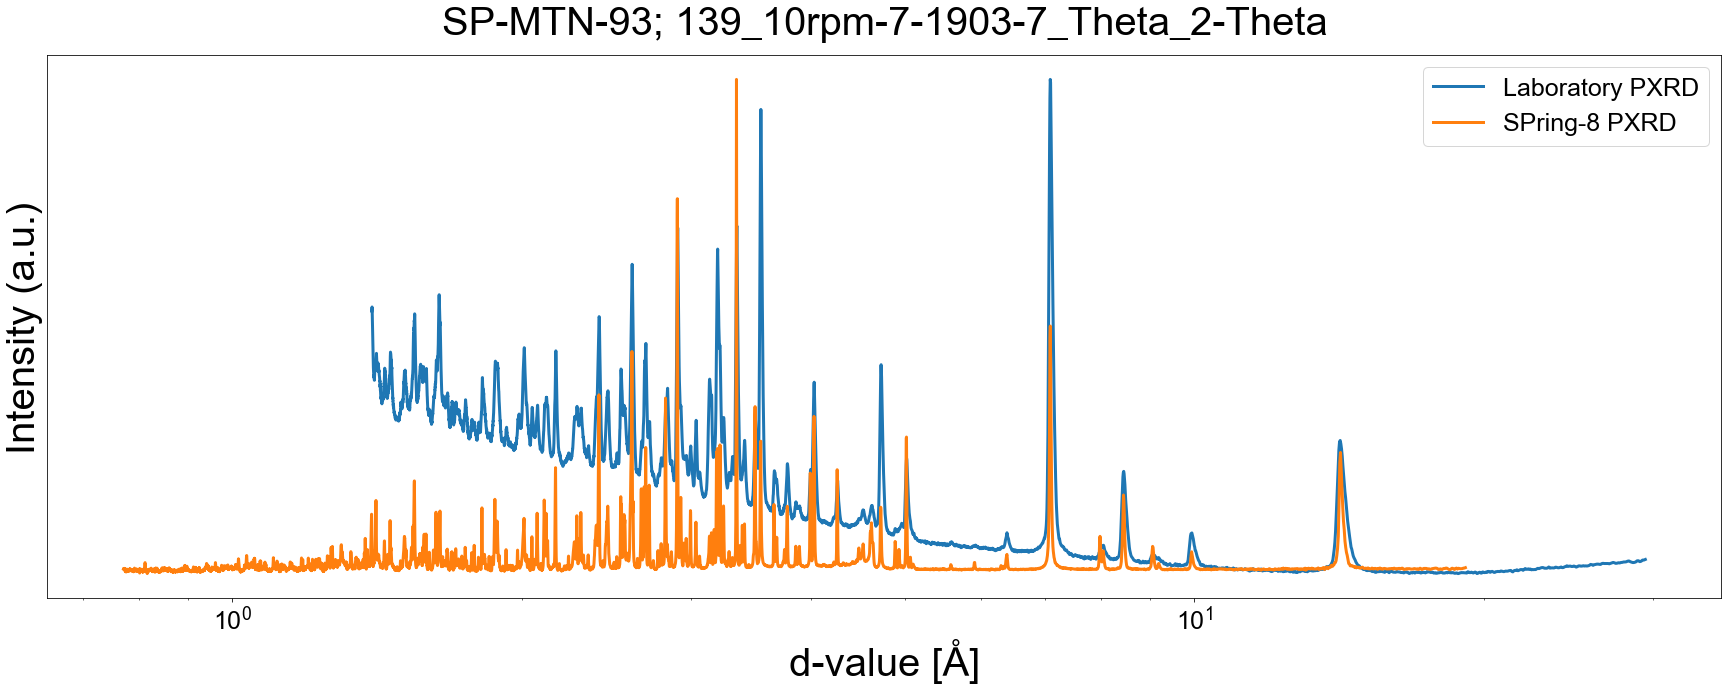

SP-MTN-94 140_10rpm-6-1903-6_Theta_2-Theta


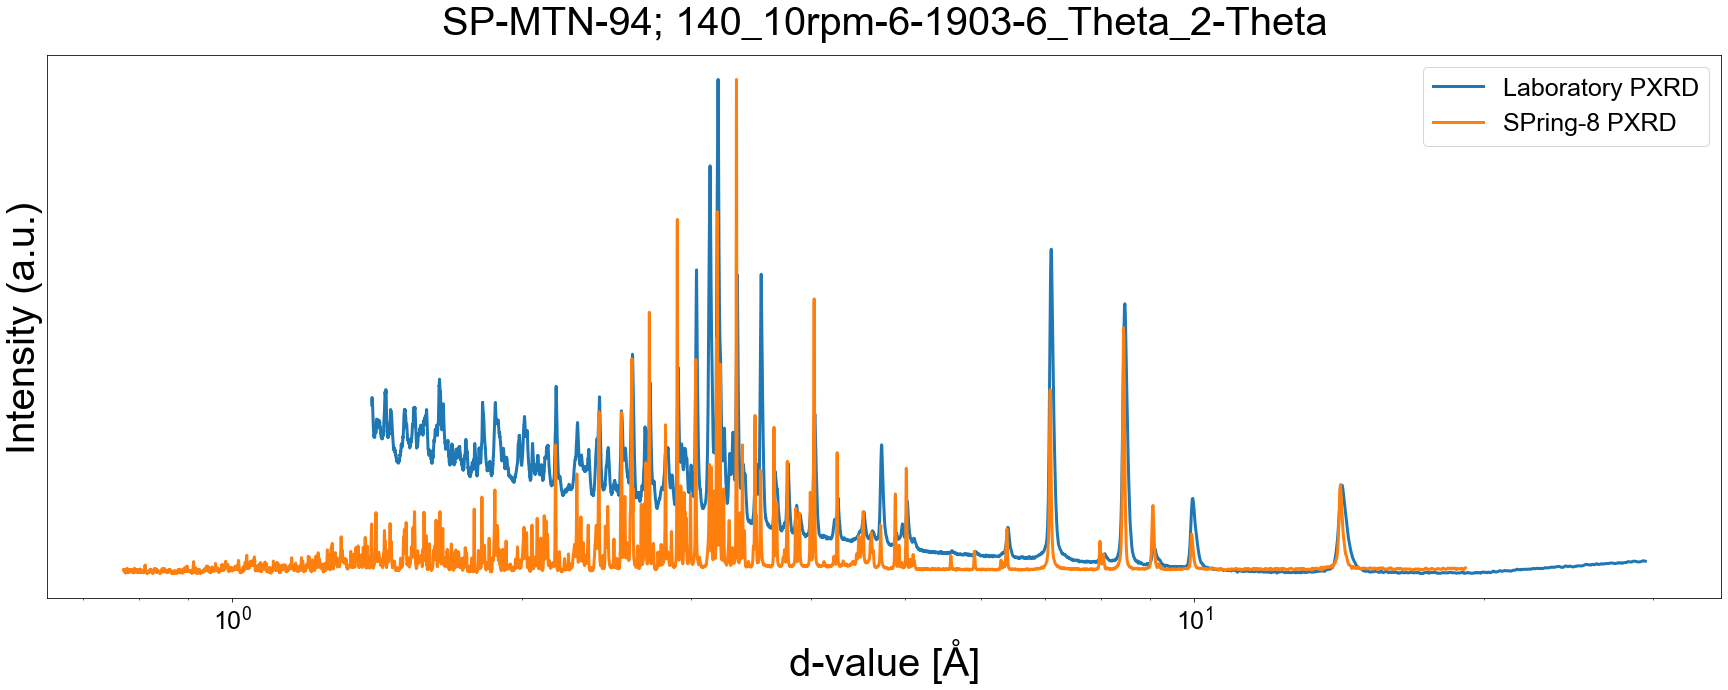

SP-MTN-95 141_10rpm-5-1903-5_Theta_2-Theta


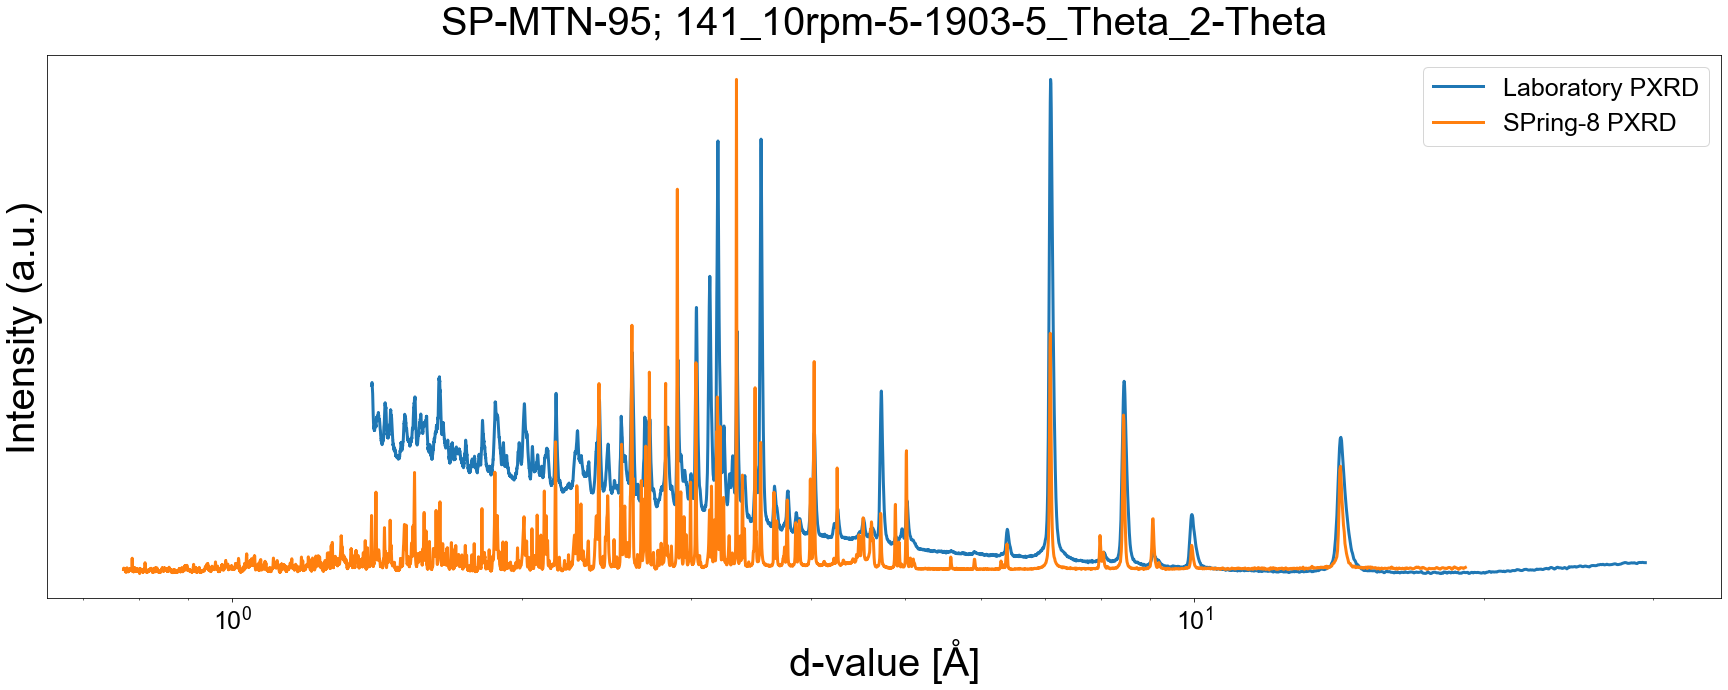

SP-MTN-41 45_MTN2011090101A_Theta_2-Theta


KeyError: '45_MTN2011090101A_Theta_2-Theta'

In [5]:
n=0
for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
    print(SP_sample_name, Lab_sample_name)
    Path_Df.loc[SP_sample_name]

    SP_path = Path_Df.loc[SP_sample_name]["Path"]
    LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

    # ファイルパスを指定して読み込み: pd.read_csv(file_path, sep='\s+', header=None)
    df_inhouse = pd.read_csv(LAB_path, sep='\s+', header=None)
    df_inhouse.columns = ["2θ", "Intensity"]

    df_SP = pd.read_csv(SP_path, sep='\s+', header=None)
    df_SP.columns = ["2θ", "Intensity"]
    # angleをCuKaに変換
    df_SP = diffraction_angle_change(df_SP, df_SP["2θ"], lambda_SP, lambda_LAB)
    df_inhouse = diffraction_angle_change(df_inhouse, df_inhouse["2θ"], lambda_LAB, lambda_SP)       

    # データフレーム内の"Intensity"列に対してMinMaxスケーリングを適用
    # MinMaxScalerを初期化して適用
    scaler = MinMaxScaler()
    df_inhouse["Intensity"] = scaler.fit_transform(df_inhouse[["Intensity"]])
    
    df_SP["Intensity"] = scaler.fit_transform(df_SP[["Intensity"]])

    # XRDプロットを作成
    plt.figure(figsize=(30, 10))
    
    # 実験パターンをプロット
    plt.plot(df_inhouse["d-value"].values, df_inhouse["Intensity"].values, label="Laboratory PXRD", linewidth=3)
    plt.plot(df_SP["d-value"].values, df_SP["Intensity"].values, label="SPring-8 PXRD", linewidth=3)

    # グラフにラベルを追加
    plt.xlabel('d-value [Å]', fontsize=40)
    plt.ylabel('Intensity (a.u.)', fontsize=40)

    # タイトルと凡例を追加
    plt.title(SP_sample_name+"; "+Lab_sample_name, fontsize=40, pad=20)

    # 0から始めて、データの最大値まで5単位ごとの目盛りを作成
    ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 5, 5)

    # ticksのフォントサイズを大きく設定
    plt.xticks(fontsize=25)
    plt.xticks(ticks)
    plt.yticks([])
    
    # x軸の範囲を設定
    #plt.xlim([40, 1.1])
    plt.xscale("log")

    # 凡例を追加
    plt.legend(fontsize=25)

    # プロットを保存
    #plt.savefig("0_CuKa変換比較用/比較図_ALL/"+sample_title+"_ALL.pdf", bbox_inches="tight")
    plt.show()
    
    n=n+1

print(n)

In [6]:
df_SP

2θ  Intensity  2θ_changed    d-value
0       2.095   0.012514    4.615906  19.143053
1       2.100   0.011365    4.626927  19.097479
2       2.105   0.010450    4.637948  19.052122
3       2.110   0.011595    4.648969  19.006980
4       2.115   0.011787    4.659991  18.962052
...       ...        ...         ...        ...
10376  53.975   0.009298  176.893527   0.771183
10377  53.980   0.008860  177.279599   0.771117
10378  53.985   0.009450  177.730396   0.771051
10379  53.990   0.009348  178.296550   0.770985
10380  53.995   0.008414  179.192230   0.770919

[10381 rows x 4 columns]

SP-MTN-42 46_MTN2011090101B_Theta_2-Theta


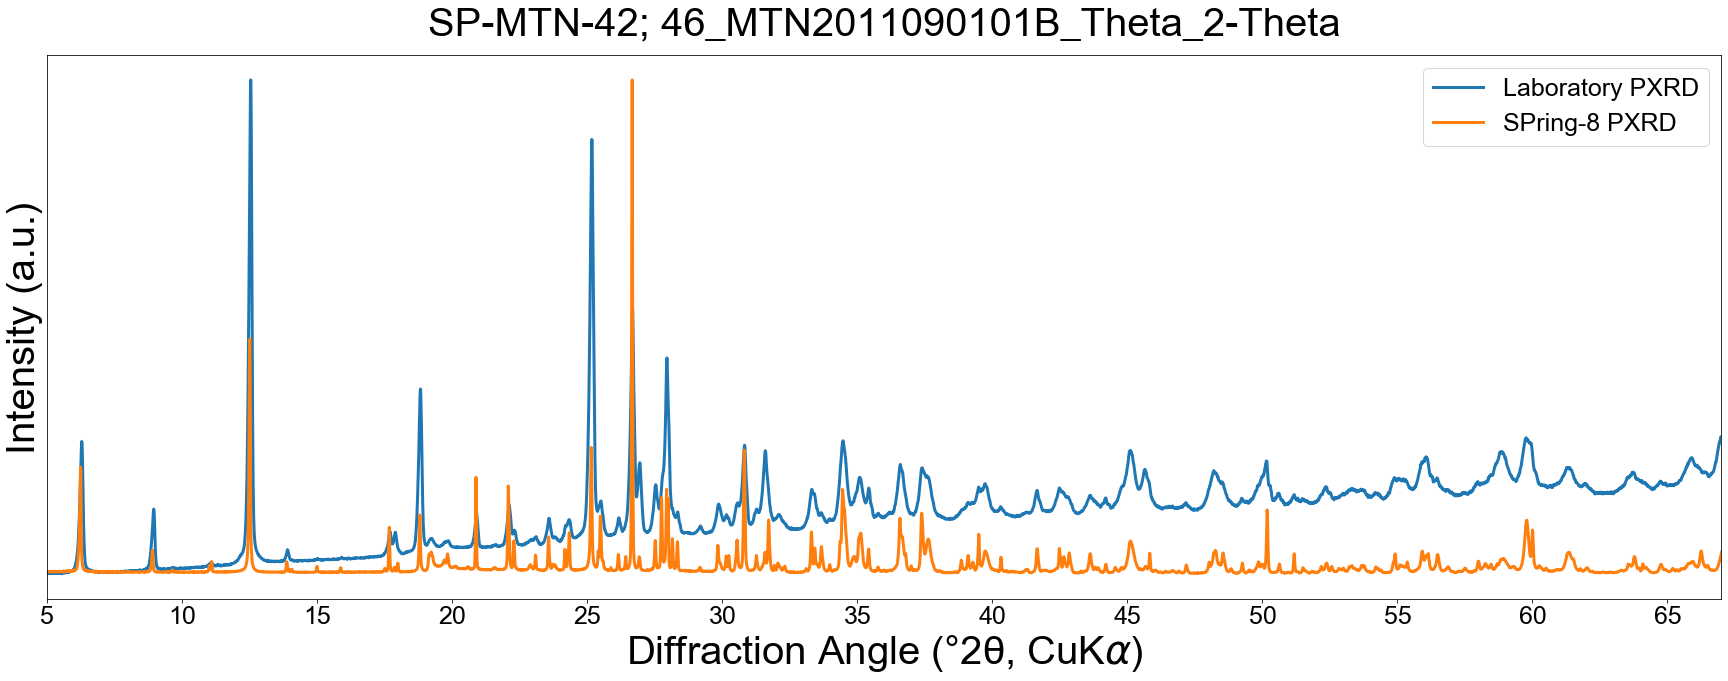

SP-MTN-43 47_MTN2011090101C_Theta_2-Theta


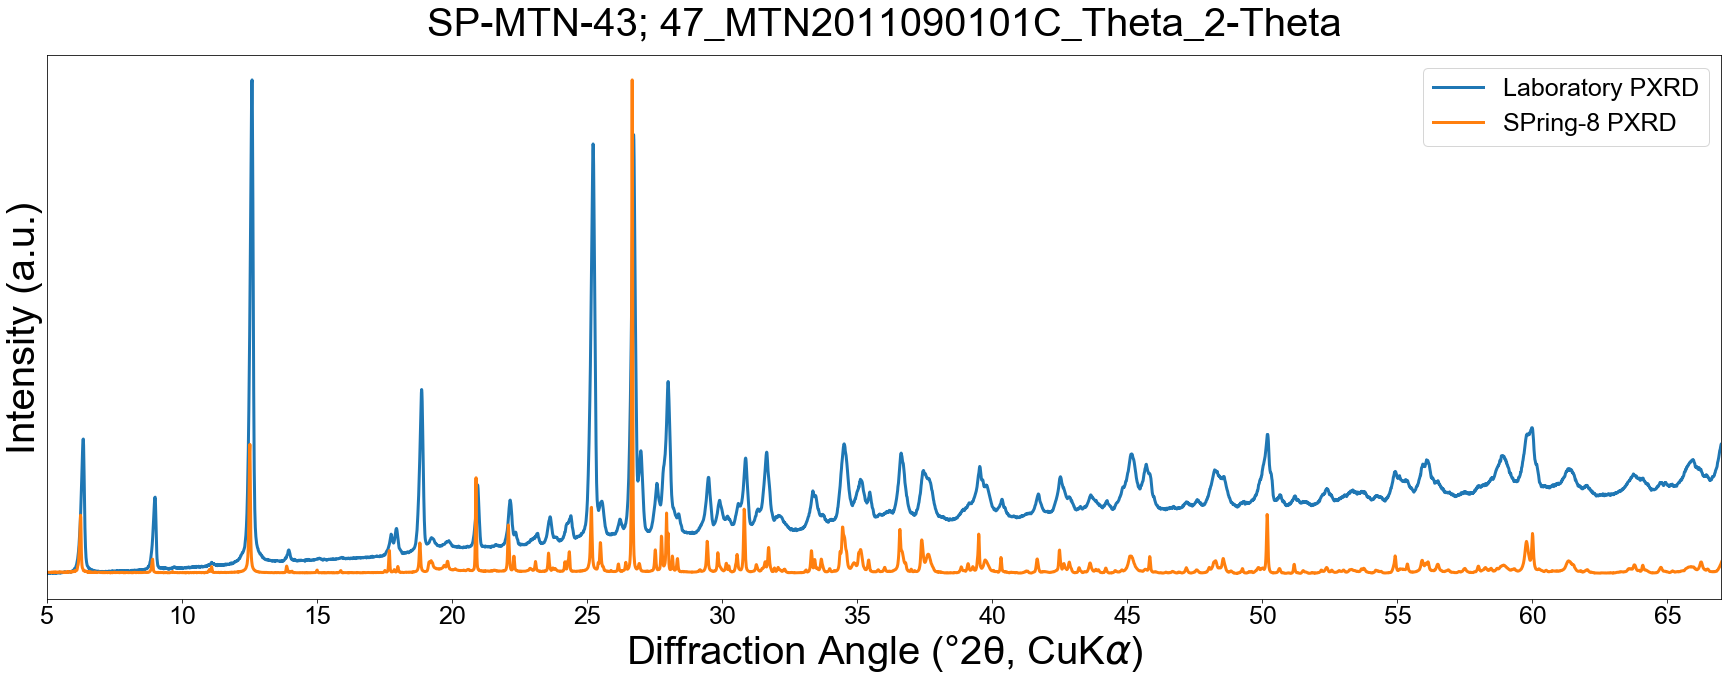

SP-MTN-44 48_MTN2011090101D_Theta_2-Theta


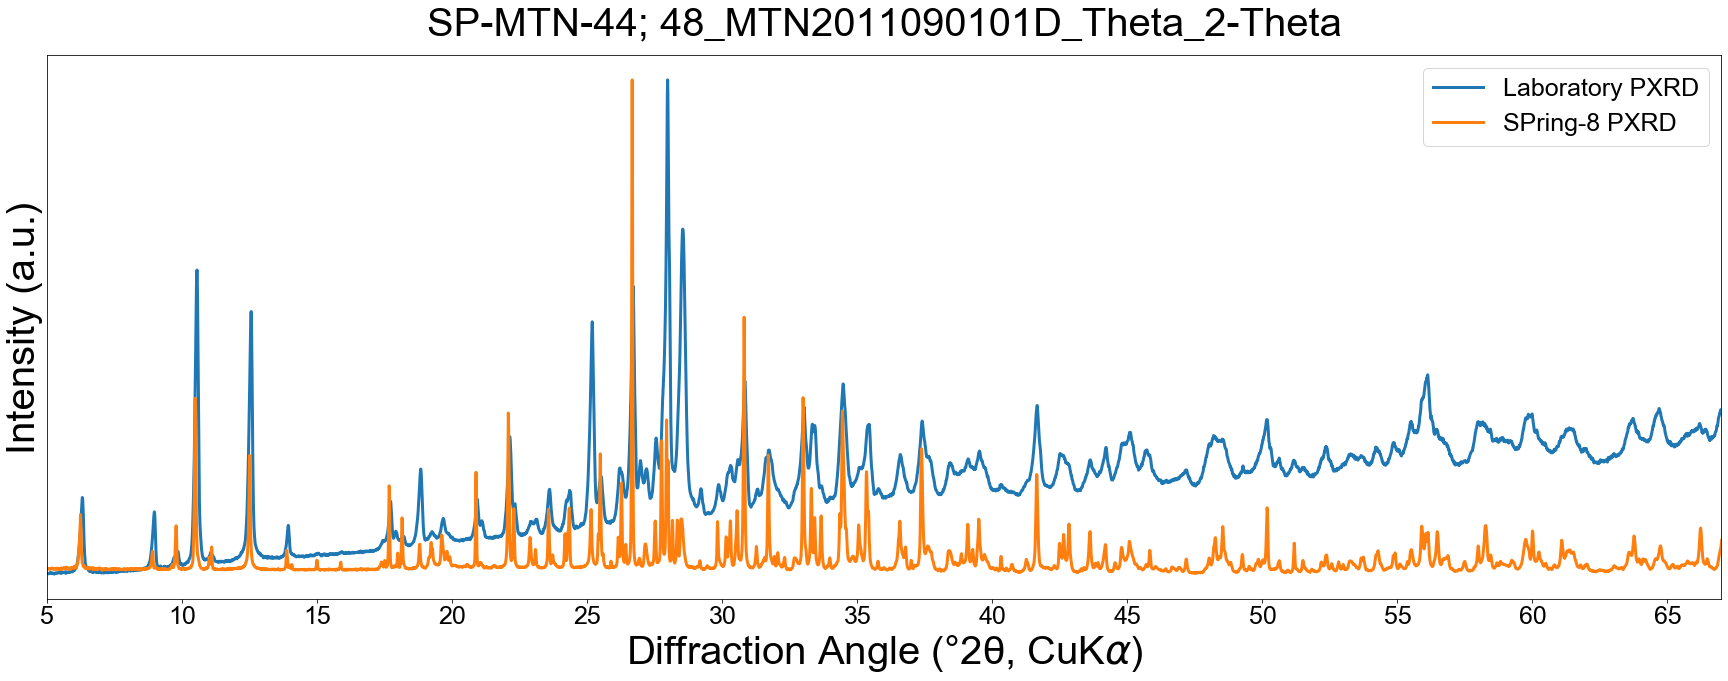

SP-MTN-45 49_MTN2011090101E_Theta_2-Theta


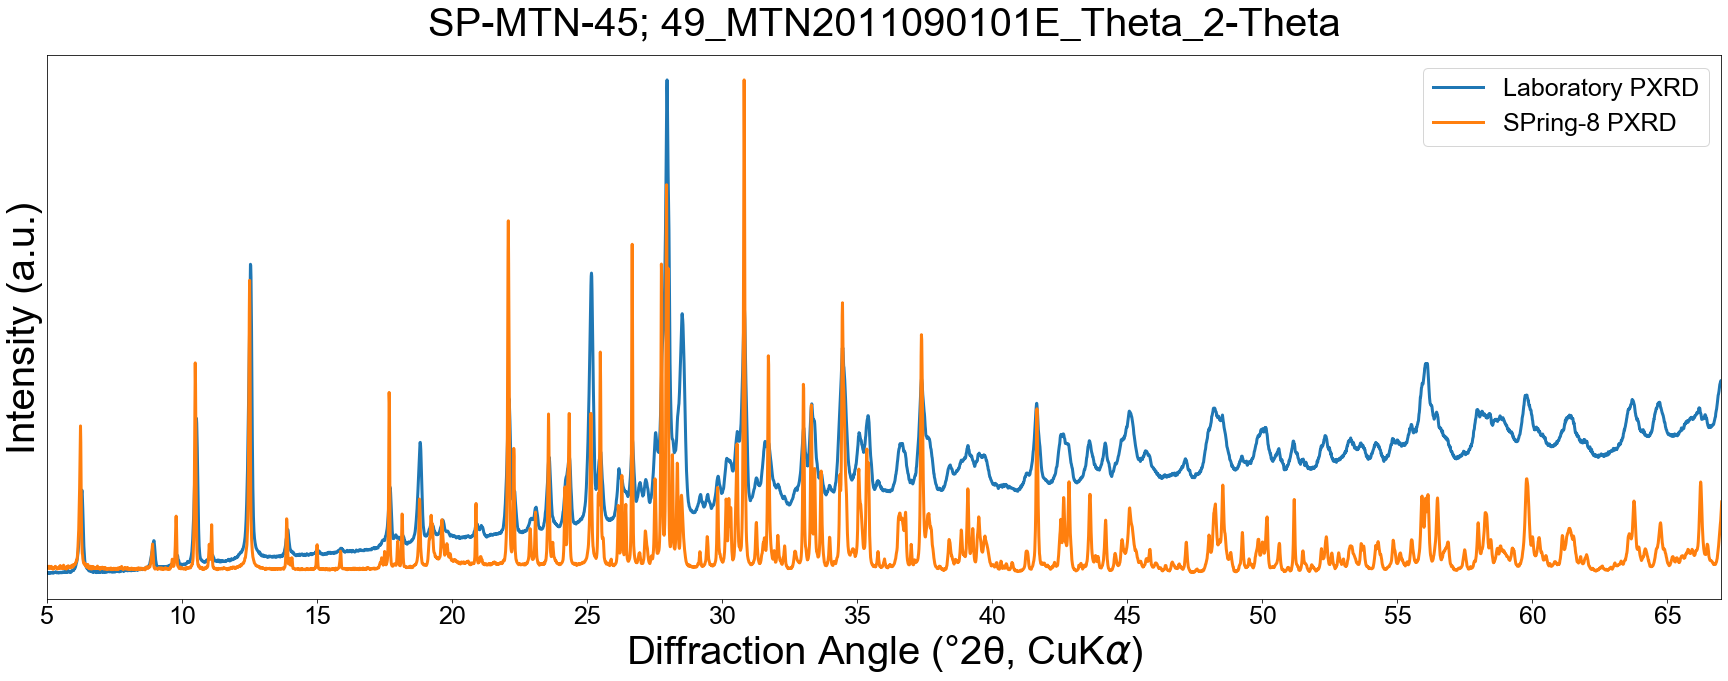

SP-MTN-46 50_MTN2011090101F_17_Theta_2-Theta


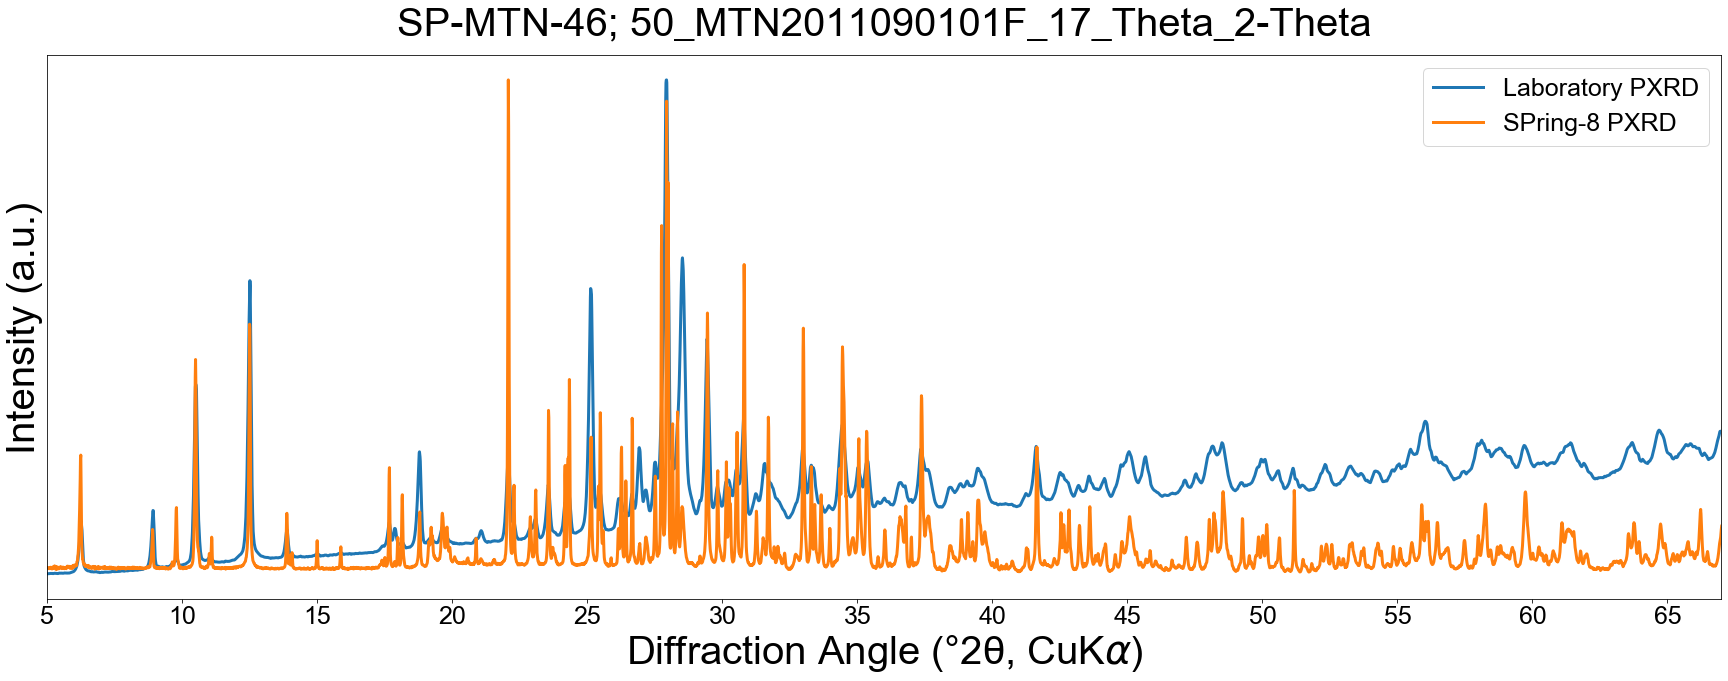

SP-MTN-47 51_MTN2011090101G_Theta_2-Theta


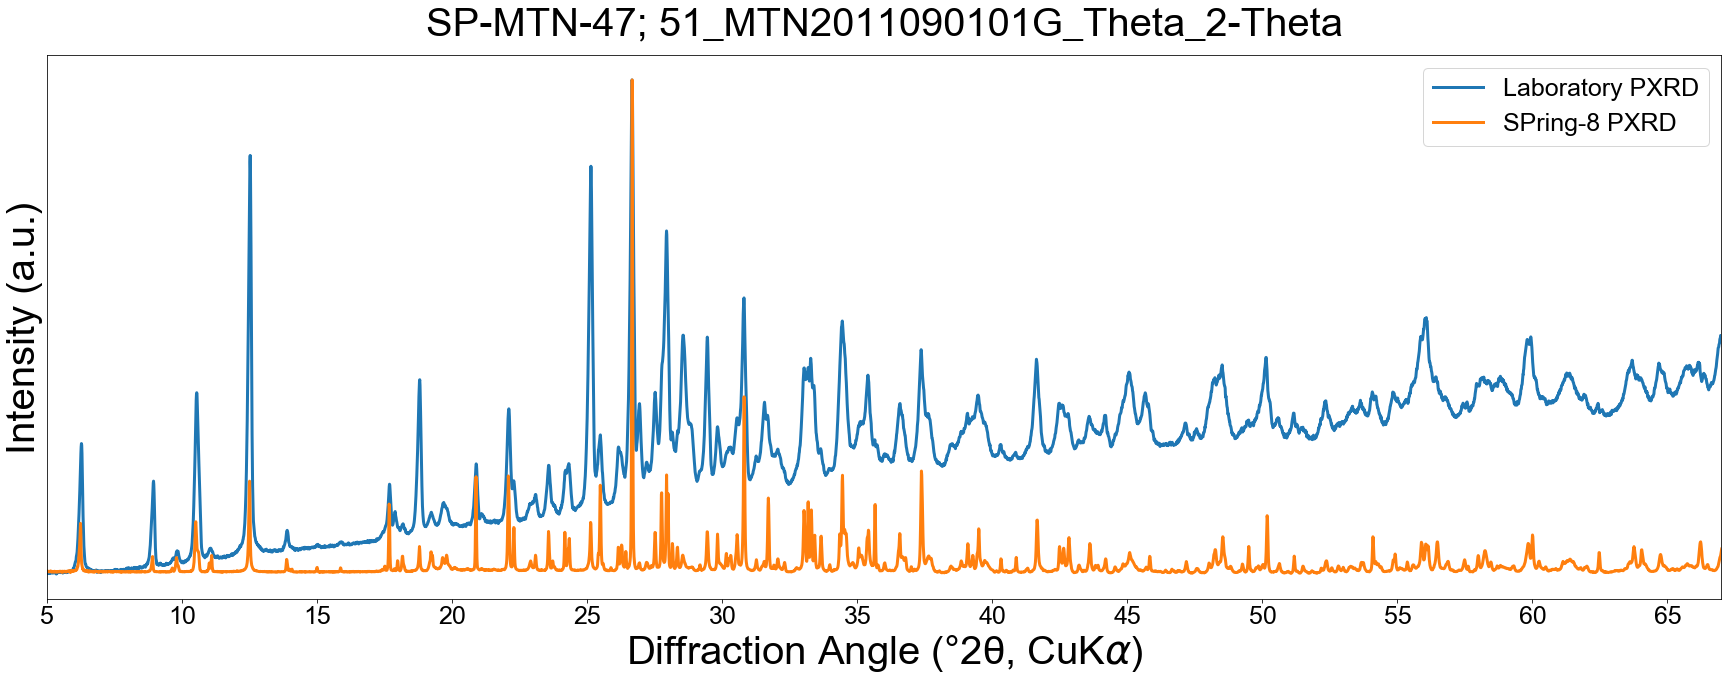

SP-MTN-56 63_MTN2107310101A_A-1_Theta_2-Theta


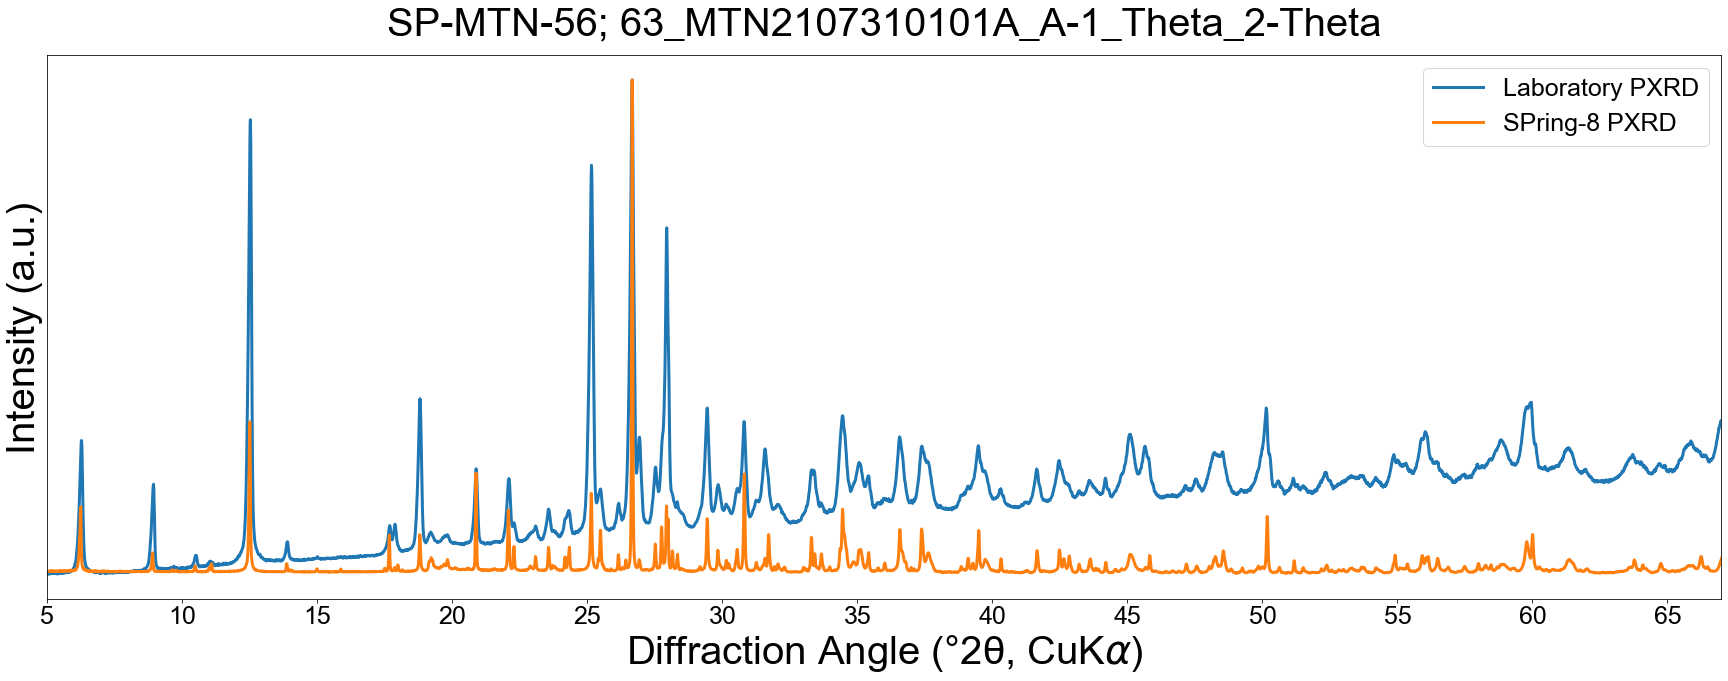

SP-MTN-57 64_MTN2107310101A_A-2_Theta_2-Theta


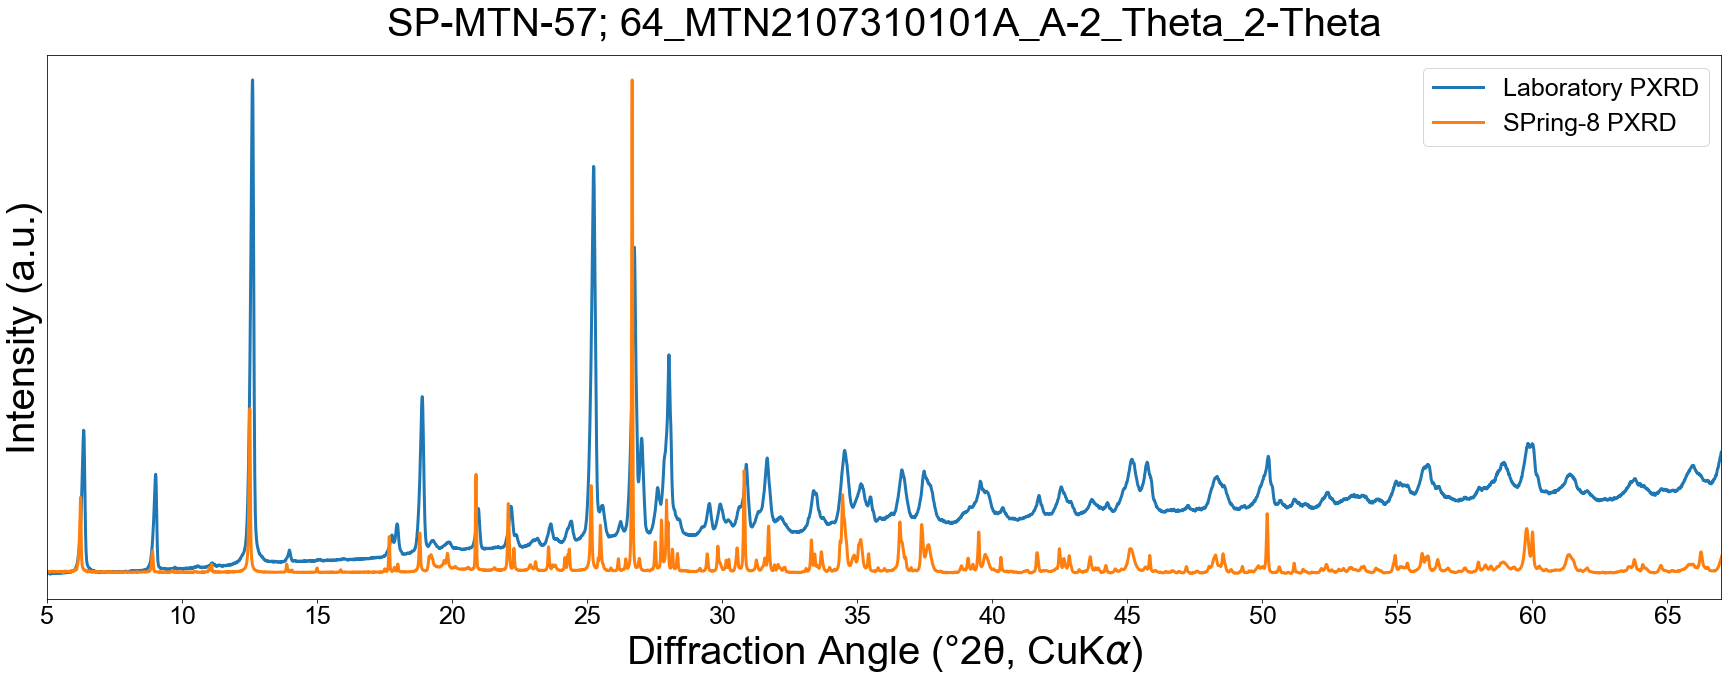

SP-MTN-58 65_MTN2107310101A_B-1_Theta_2-Theta


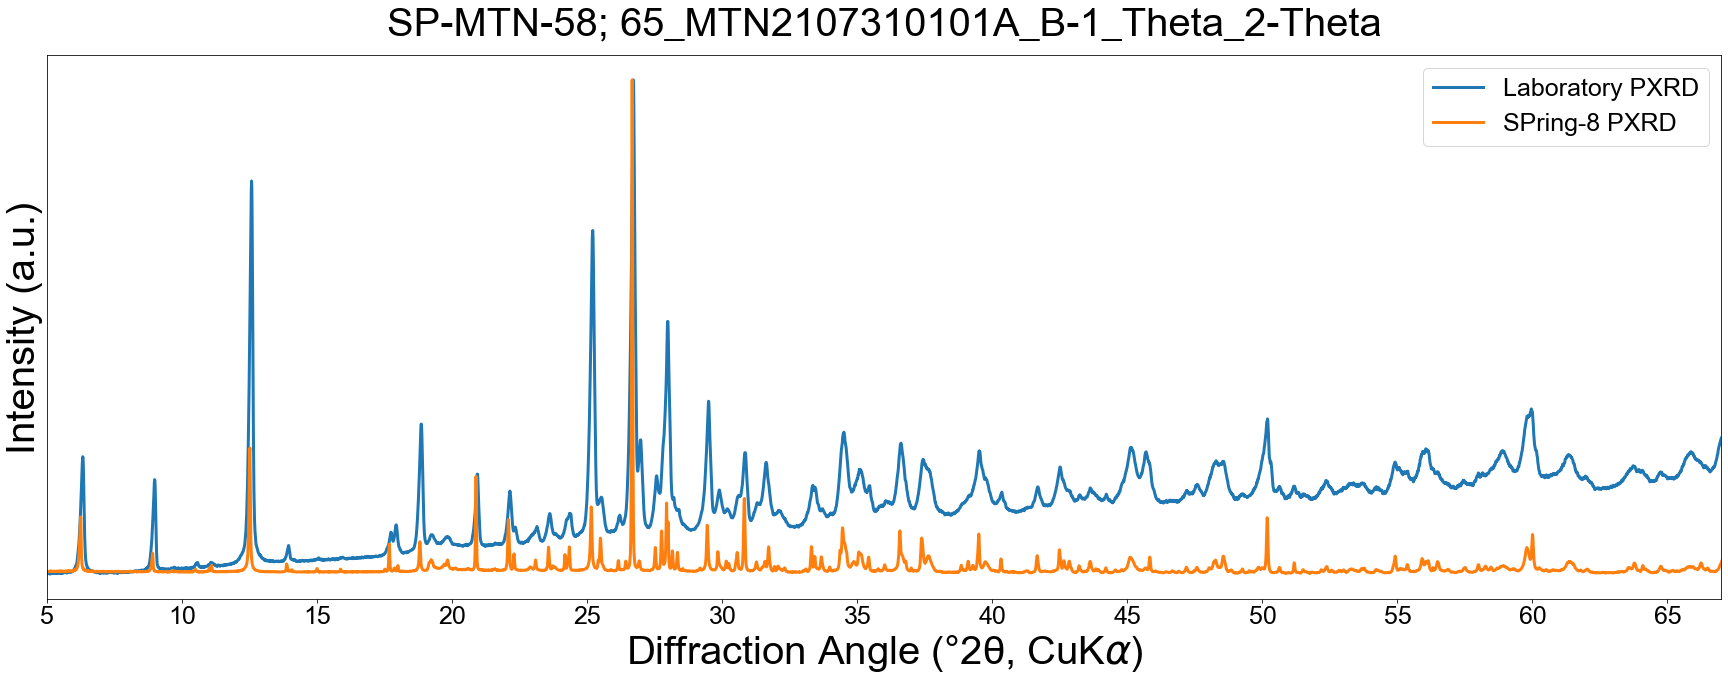

SP-MTN-59 66_MTN2107310101A_B-2_retry_Theta_2-Theta


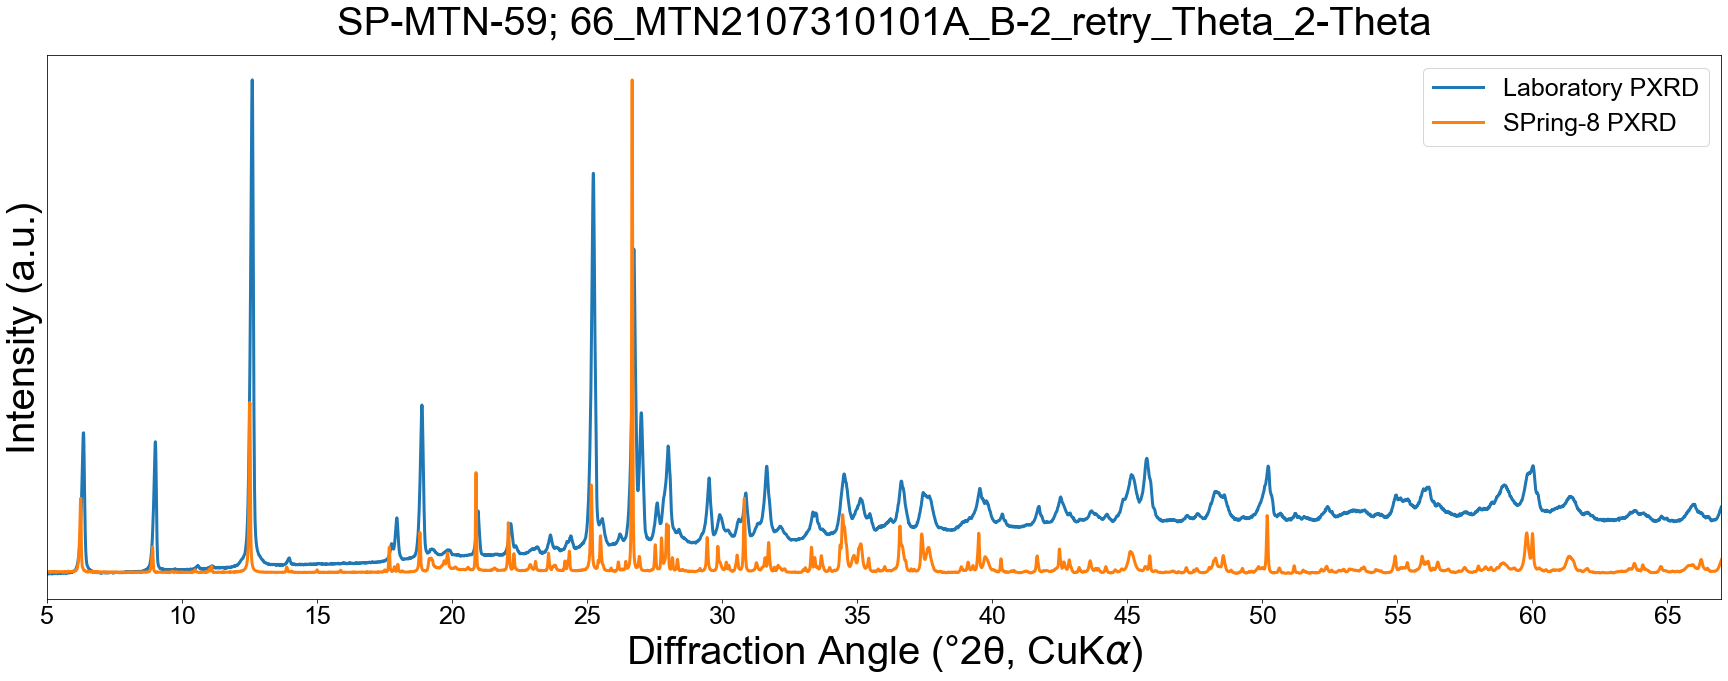

SP-MTN-60 67_MTN2107310101A_C-1


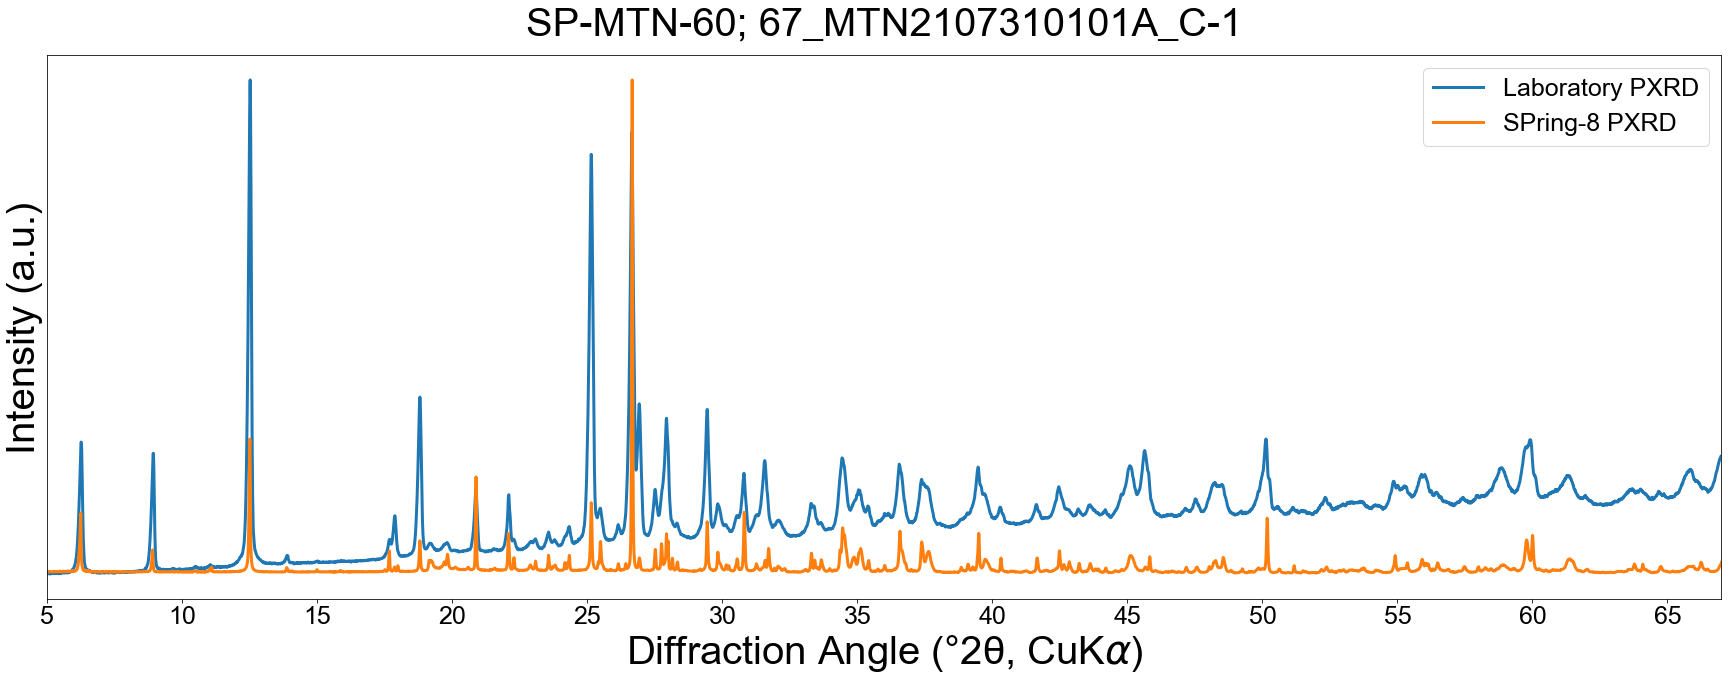

SP-MTN-61 68_MTN2107310101A_C-2_Theta_2-Theta


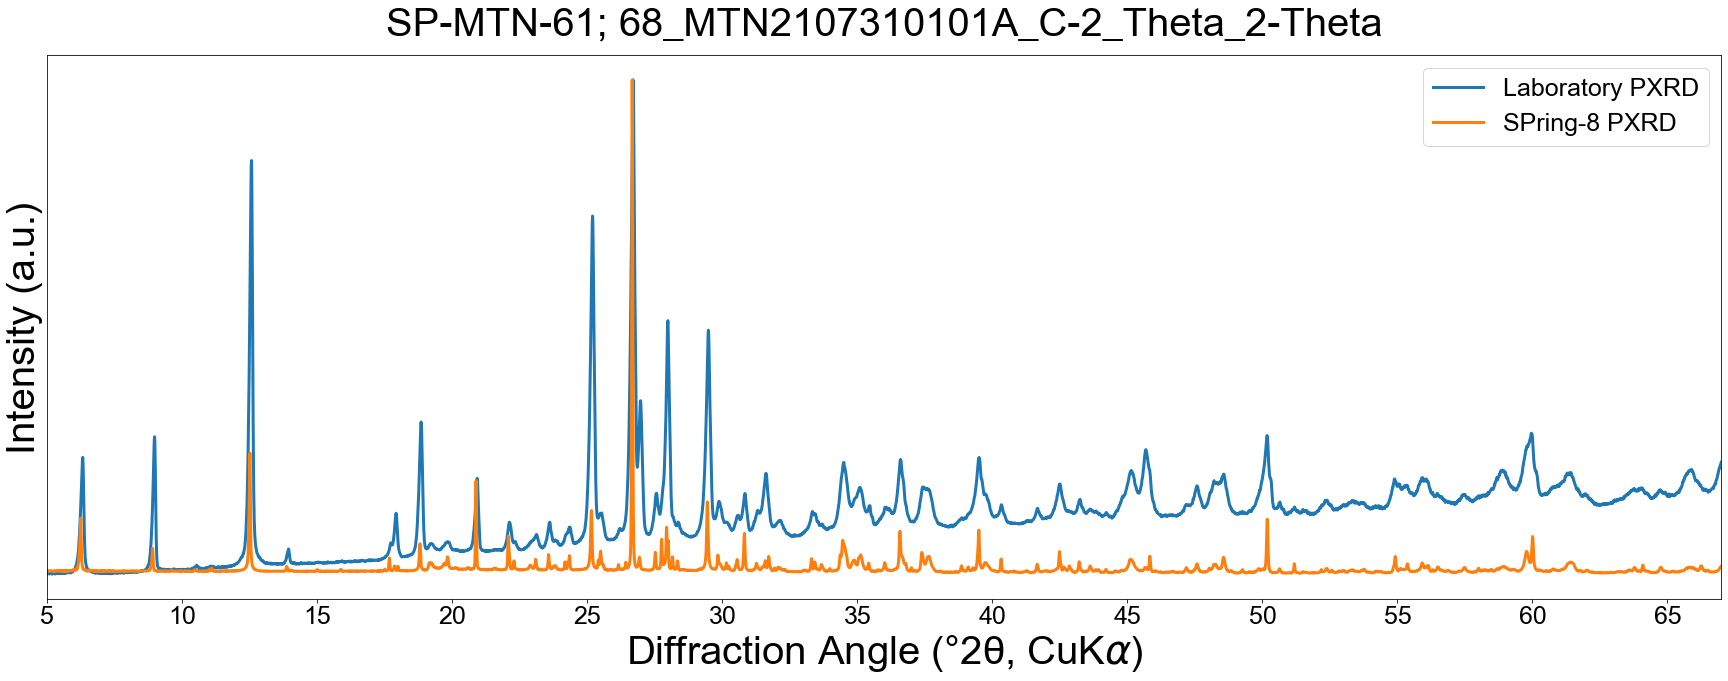

SP-MTN-70 104_MTN22051304_Theta_2-Theta


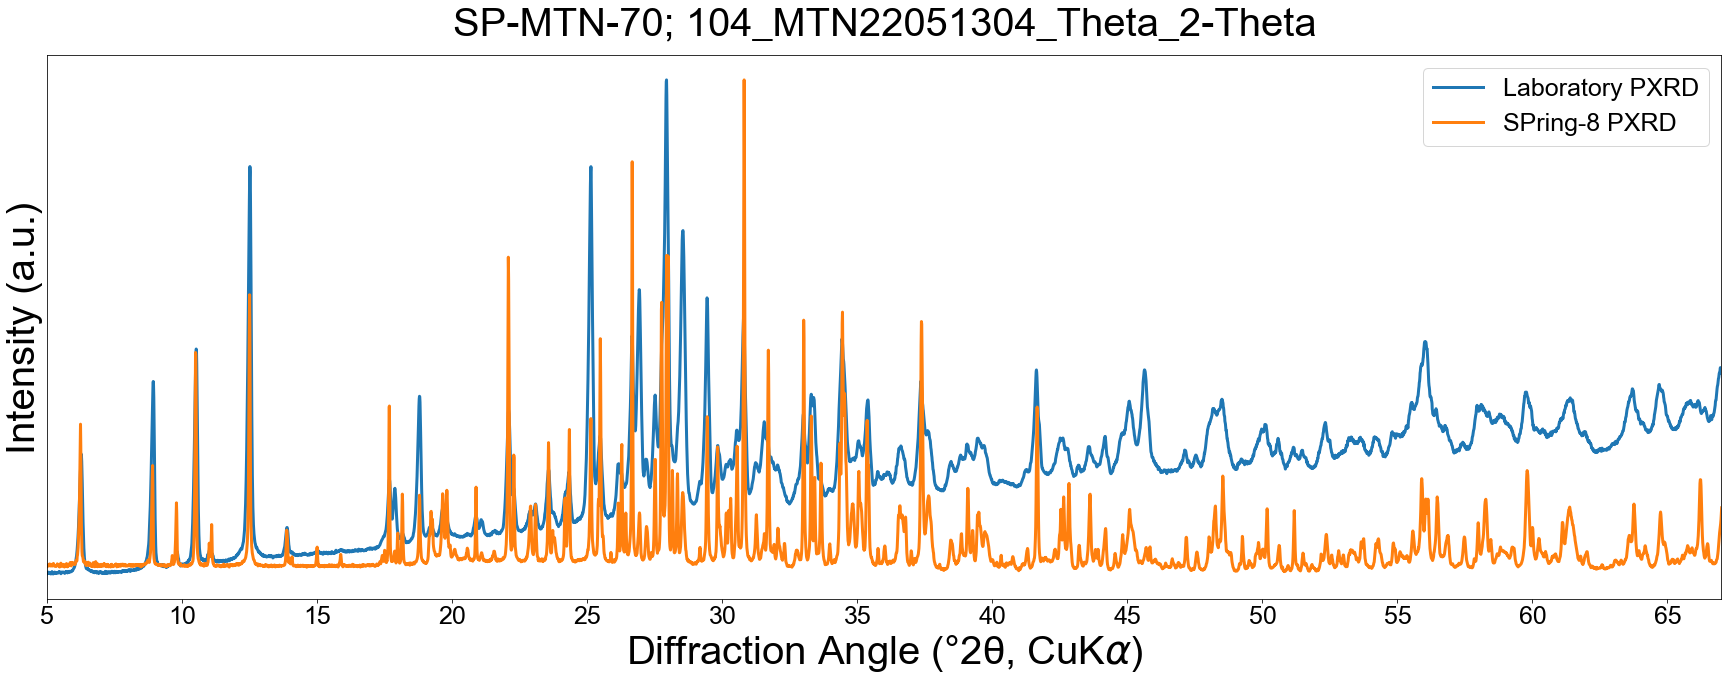

SP-MTN-71 105_MTN22051305_Theta_2-Theta


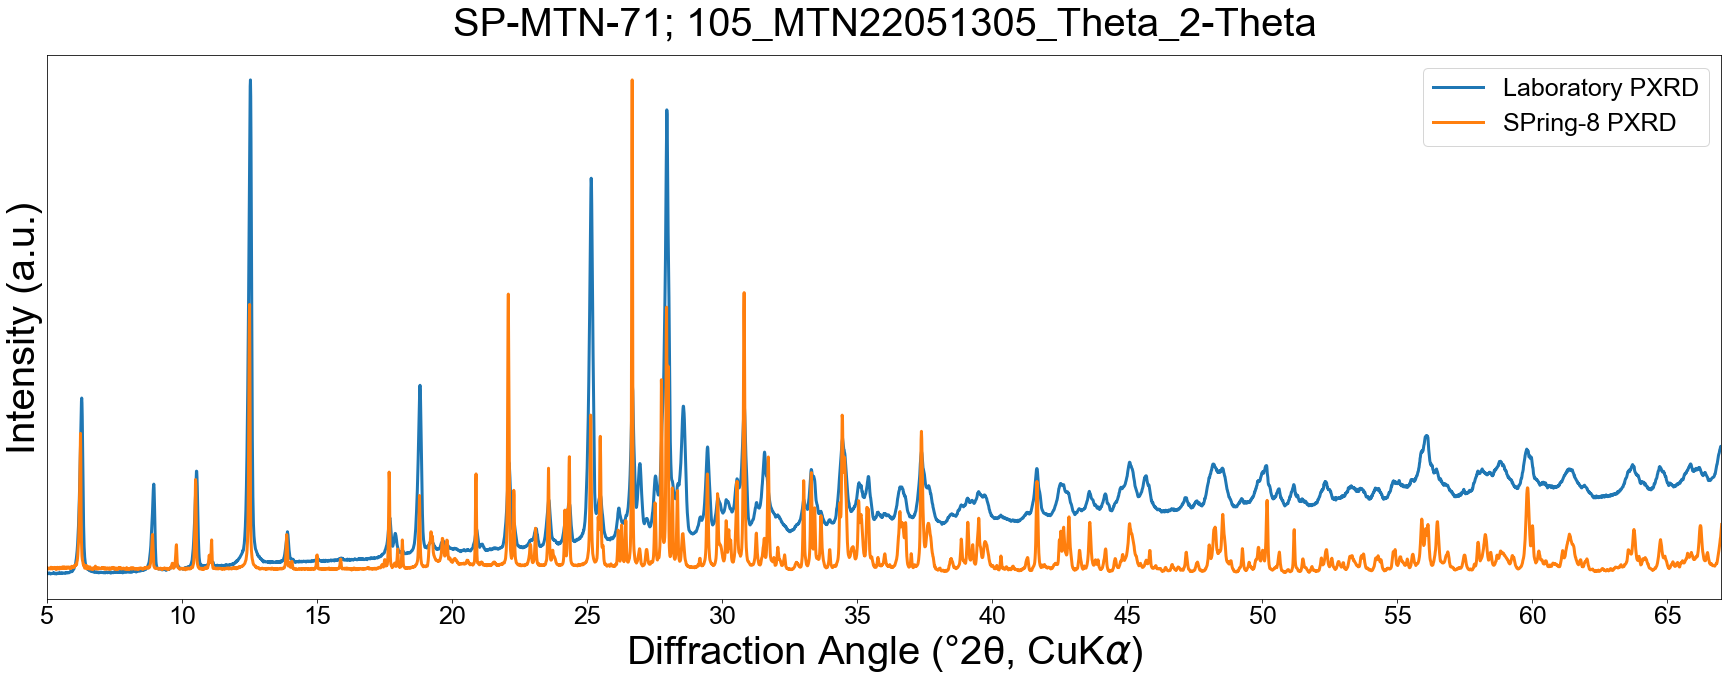

SP-MTN-72 106_MTN22051306_Theta_2-Theta


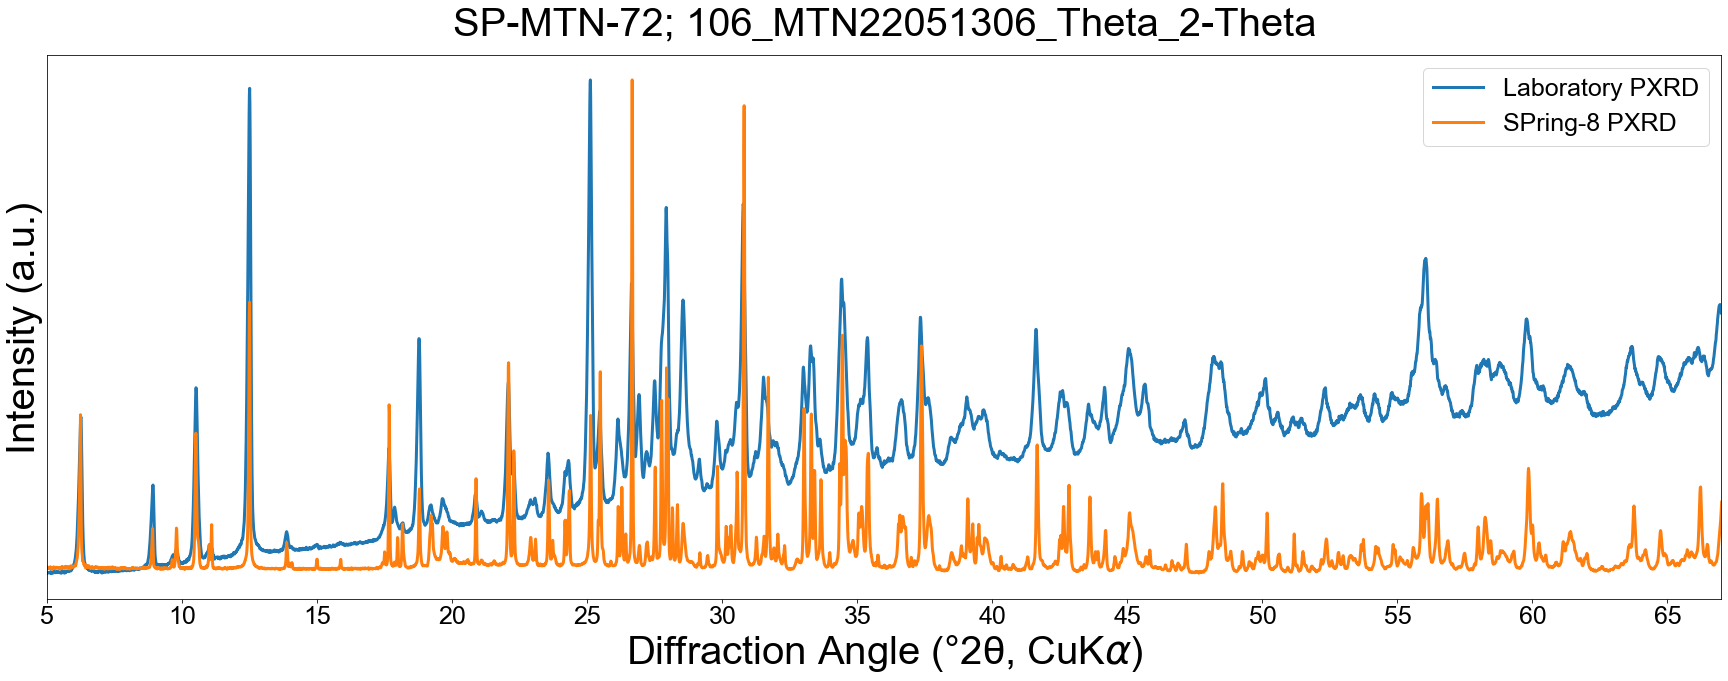

SP-MTN-78 112_MTN22051312_Theta_2-Theta


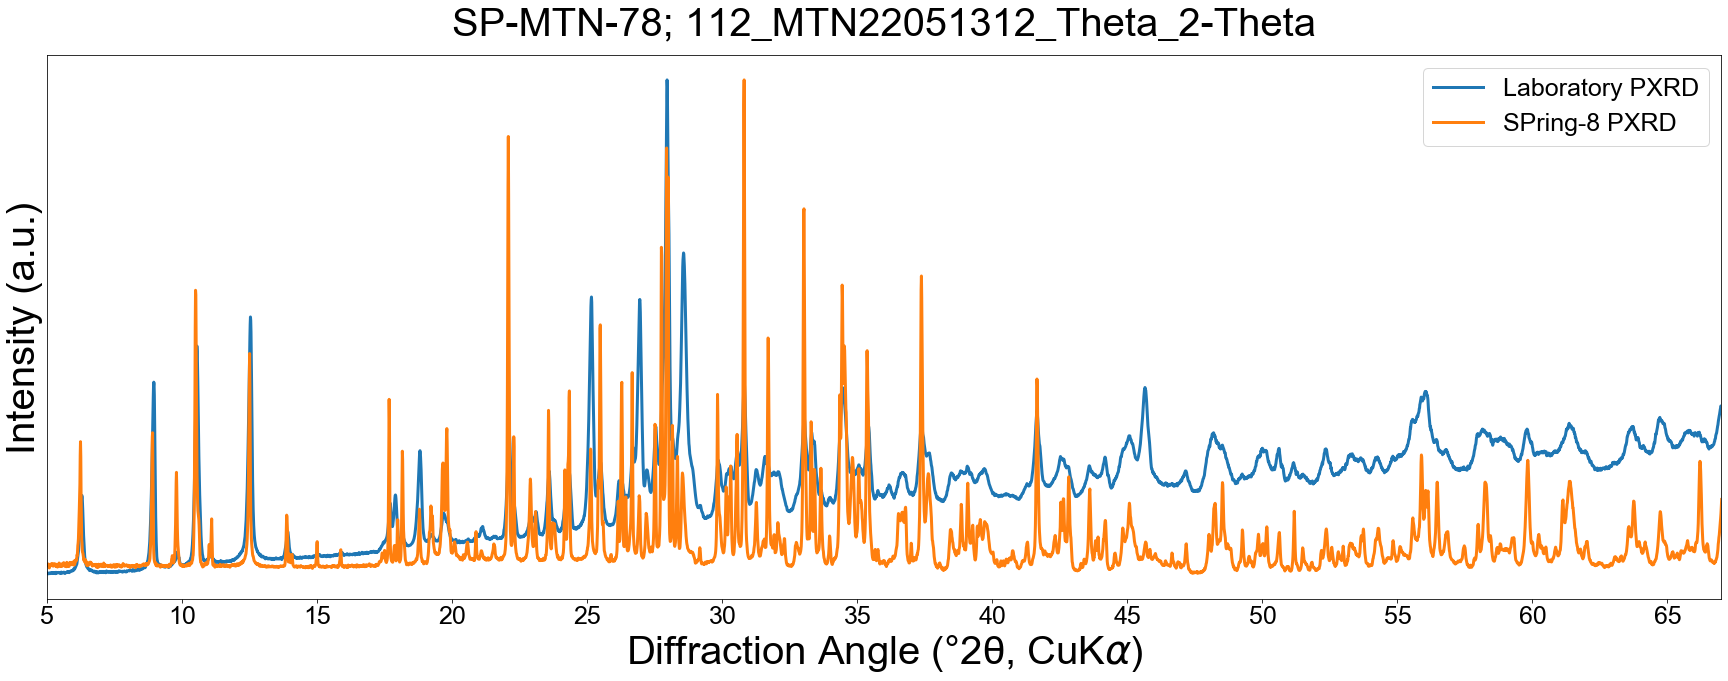

SP-MTN-83 118_MTN22051301-01_Theta_2-Theta


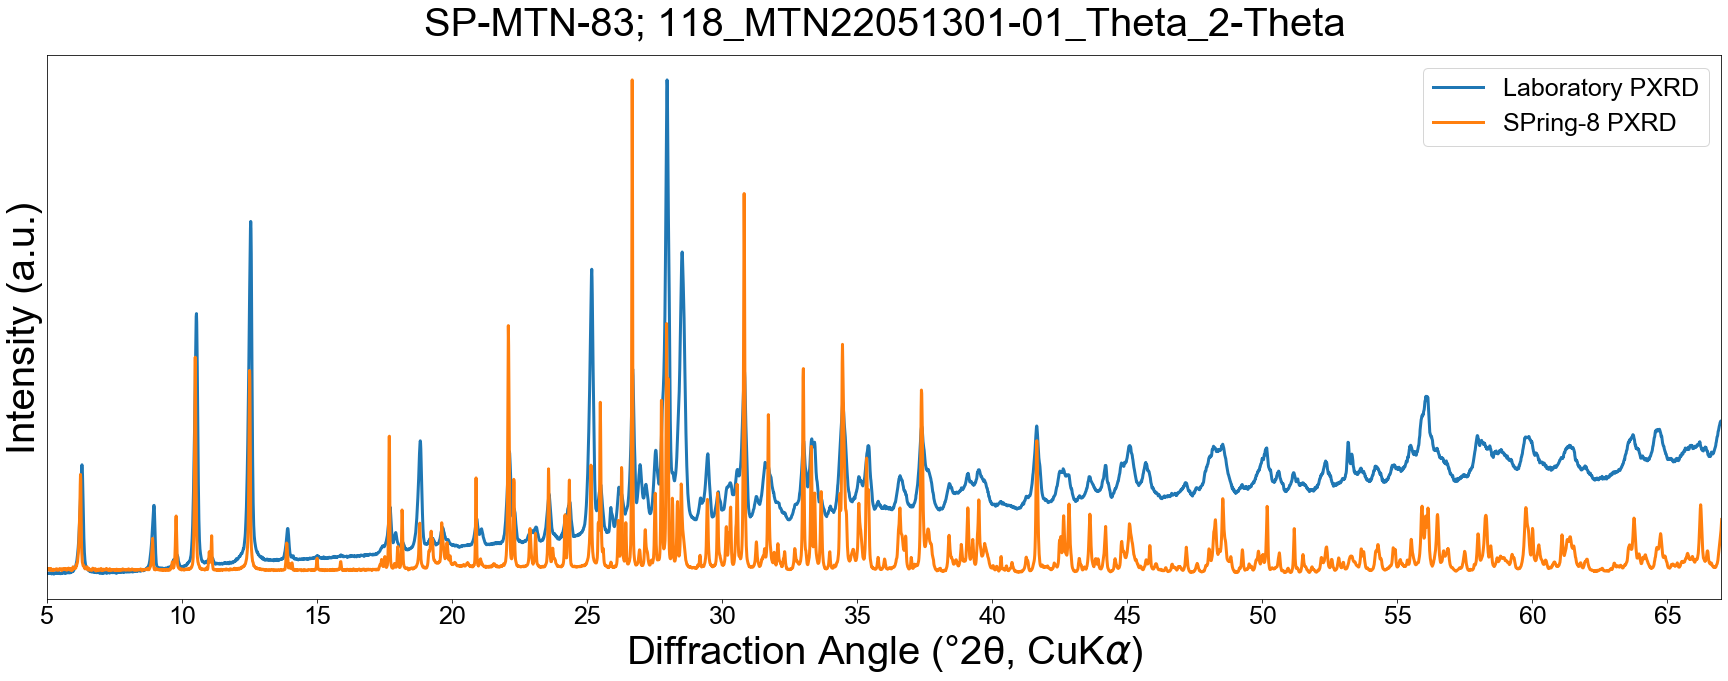

SP-MTN-84 119_MTN22051301-02


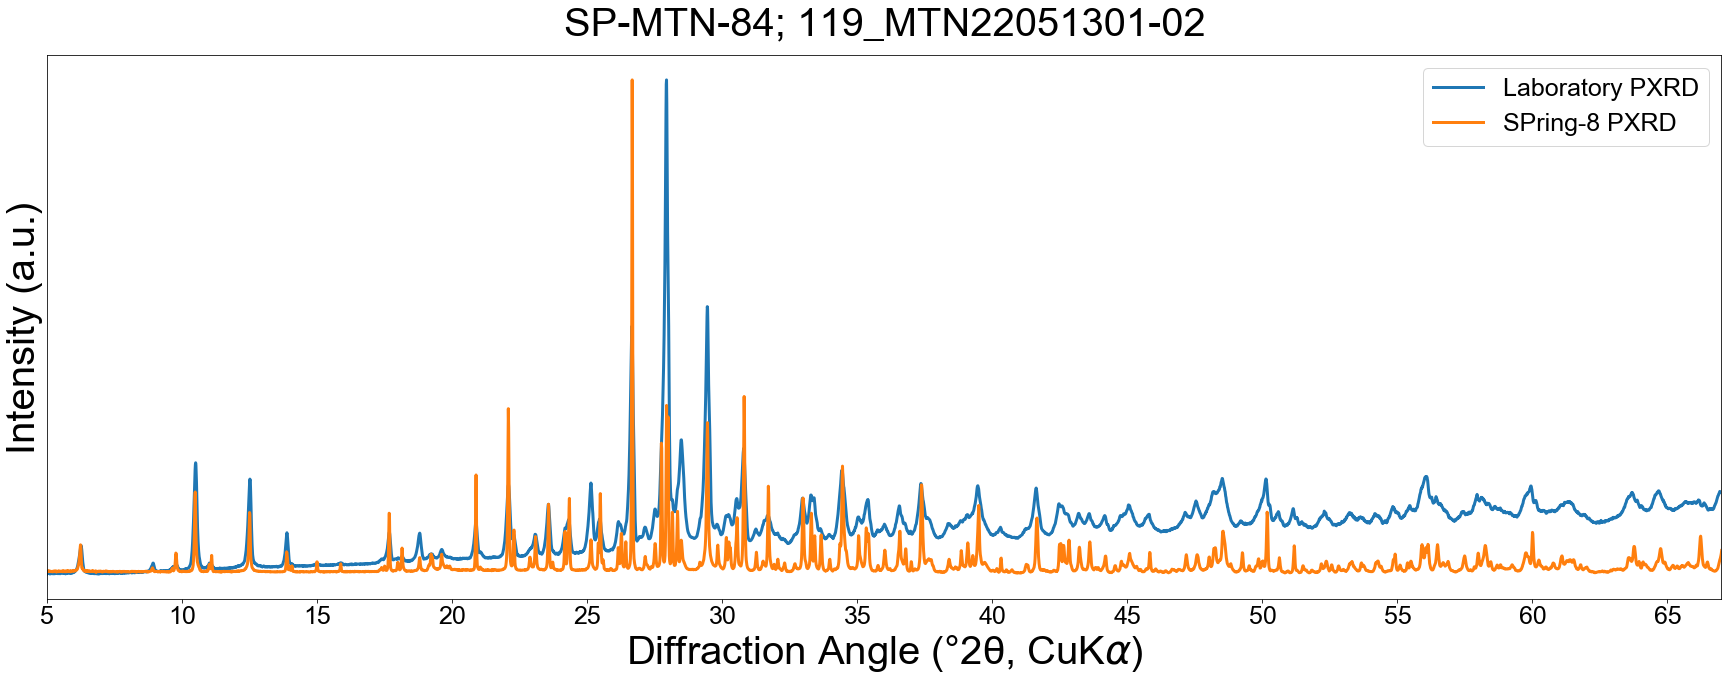

SP-MTN-85 121_MTN22051302-1_Theta_2-Theta


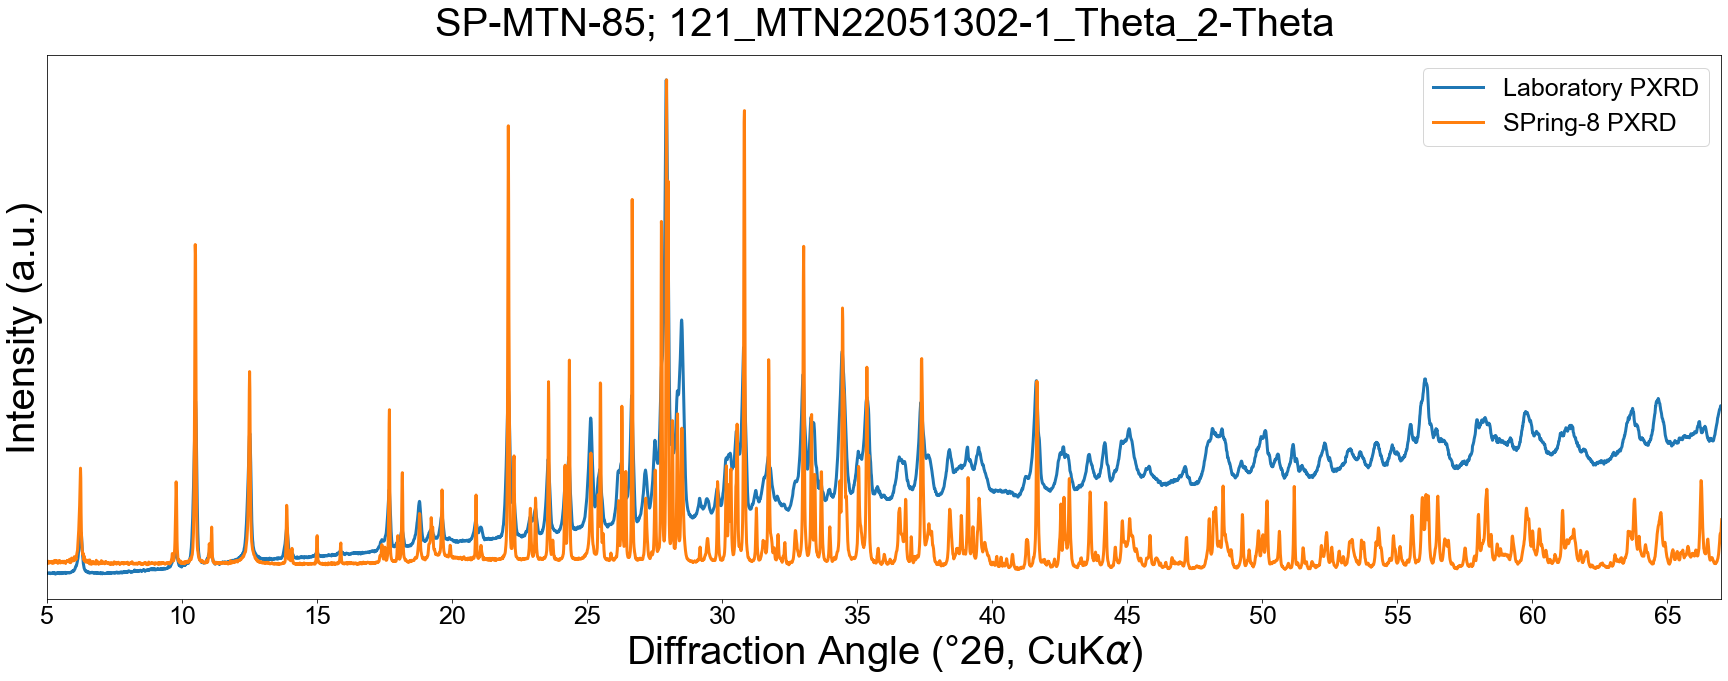

SP-MTN-86 122_MTN22051302-2_Theta_2-Theta


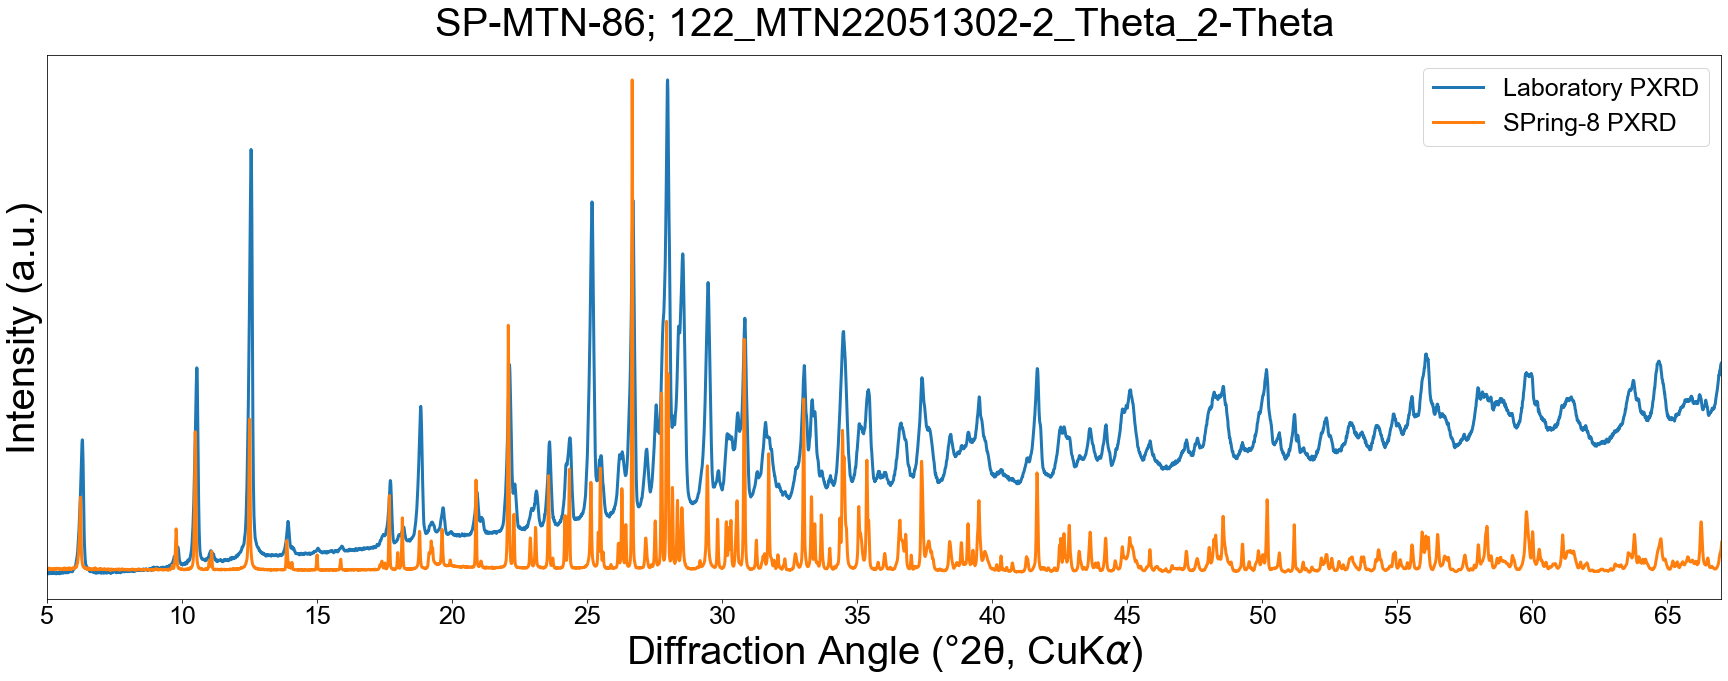

SP-MTN-87 123_MTN22051302-3_Theta_2-Theta


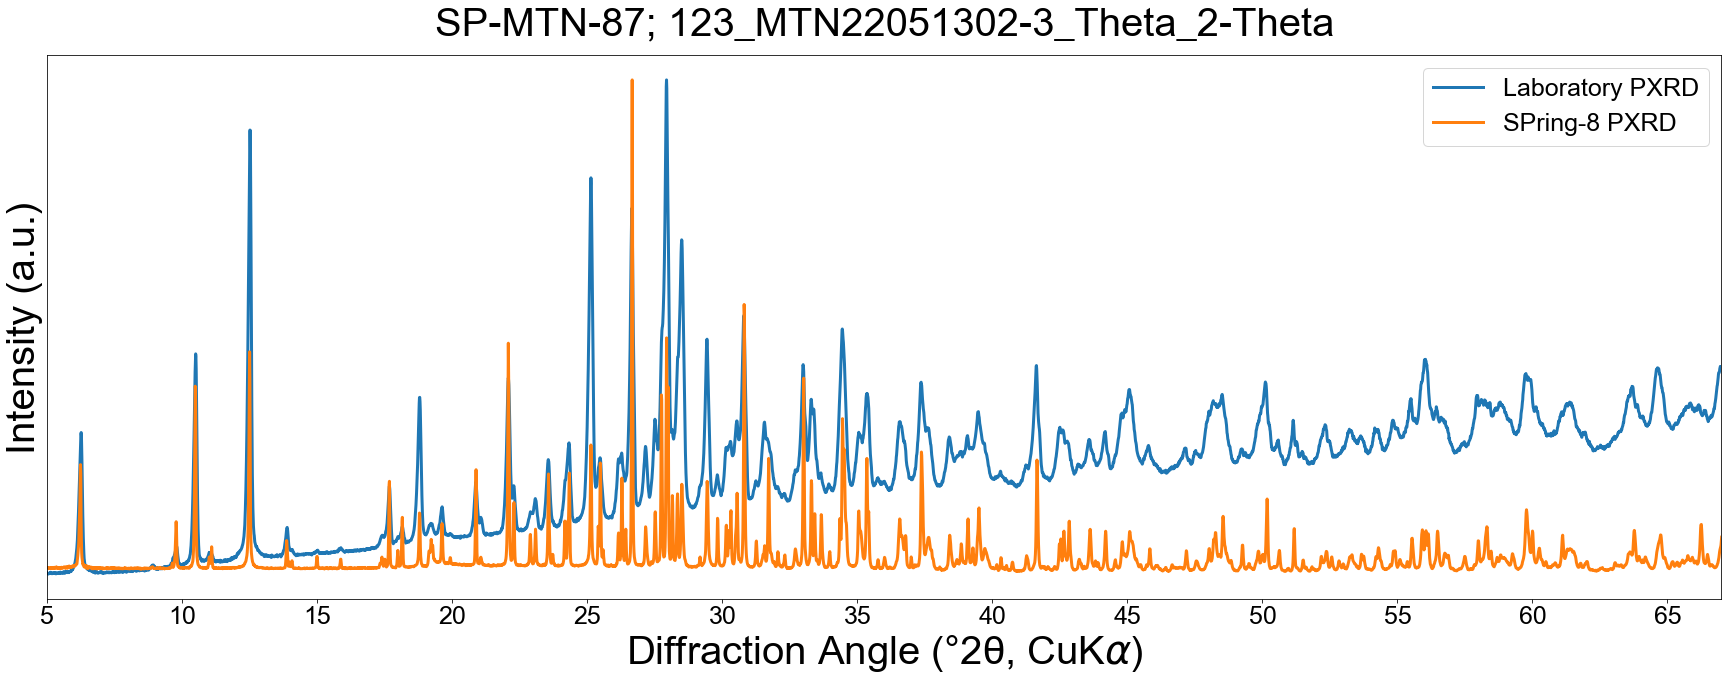

SP-MTN-88 124_MTN22051302-4_Theta_2-Theta


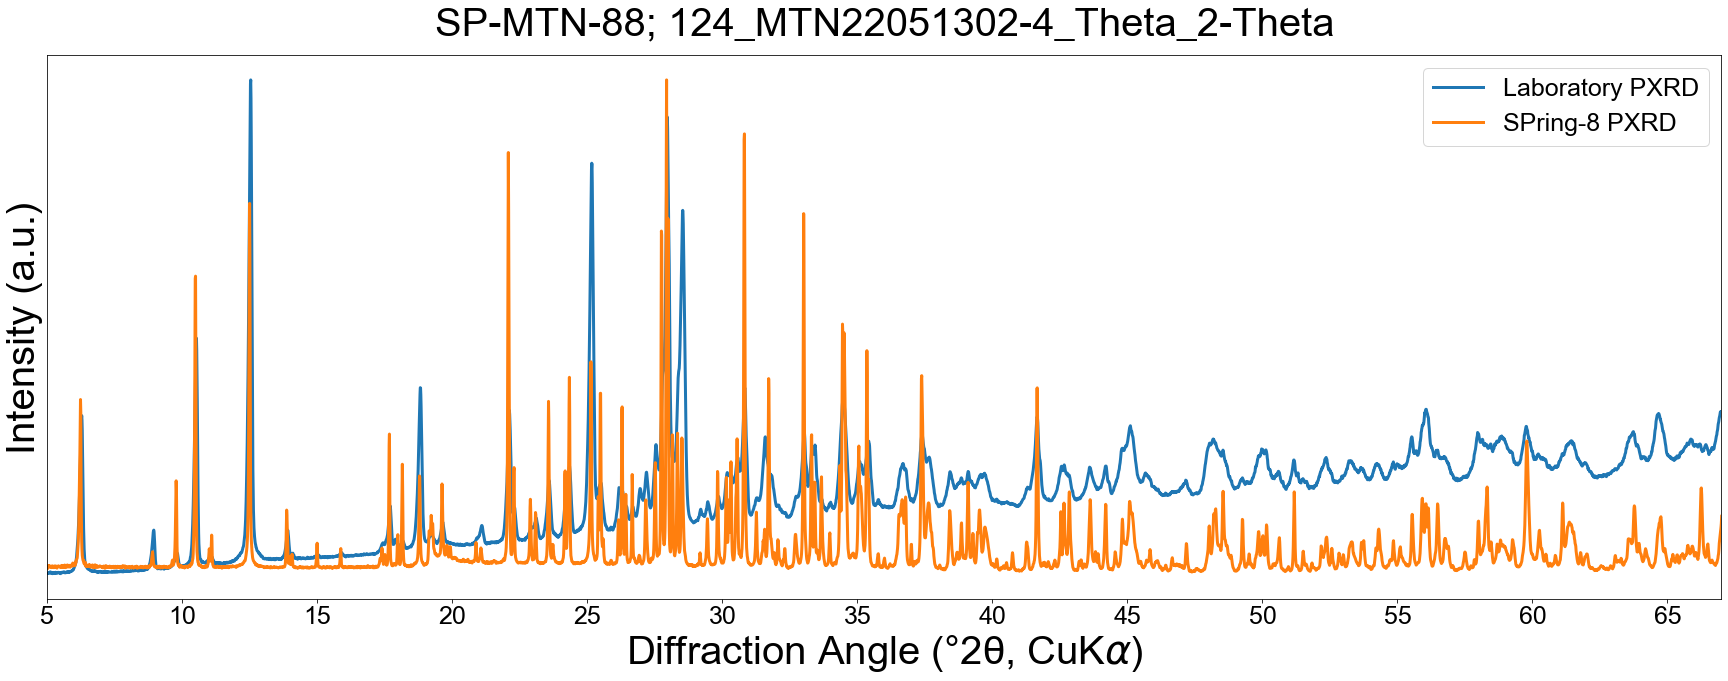

SP-MTN-92 138_10rpm-8-1903-8_Theta_2-Theta


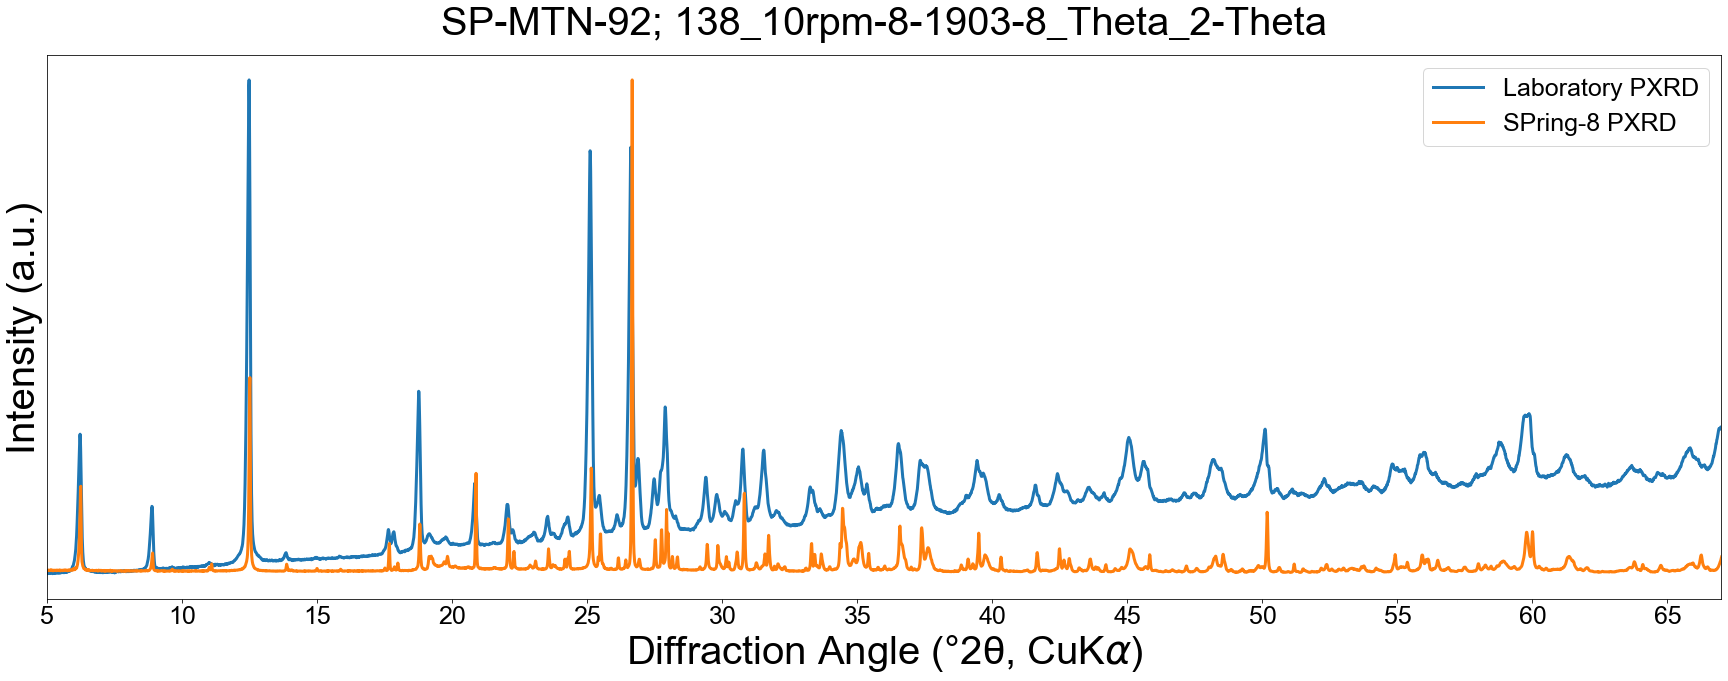

SP-MTN-93 139_10rpm-7-1903-7_Theta_2-Theta


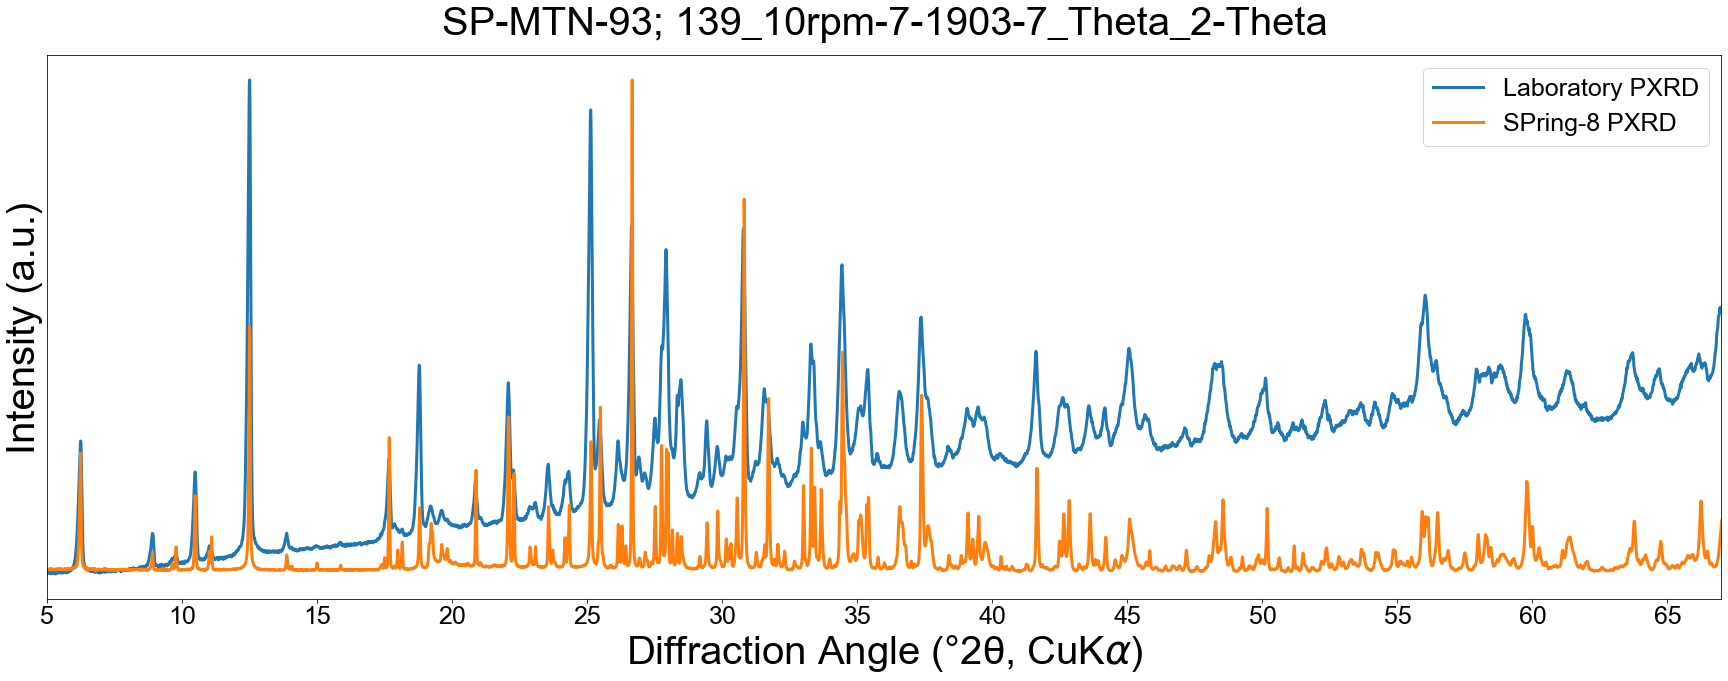

SP-MTN-94 140_10rpm-6-1903-6_Theta_2-Theta


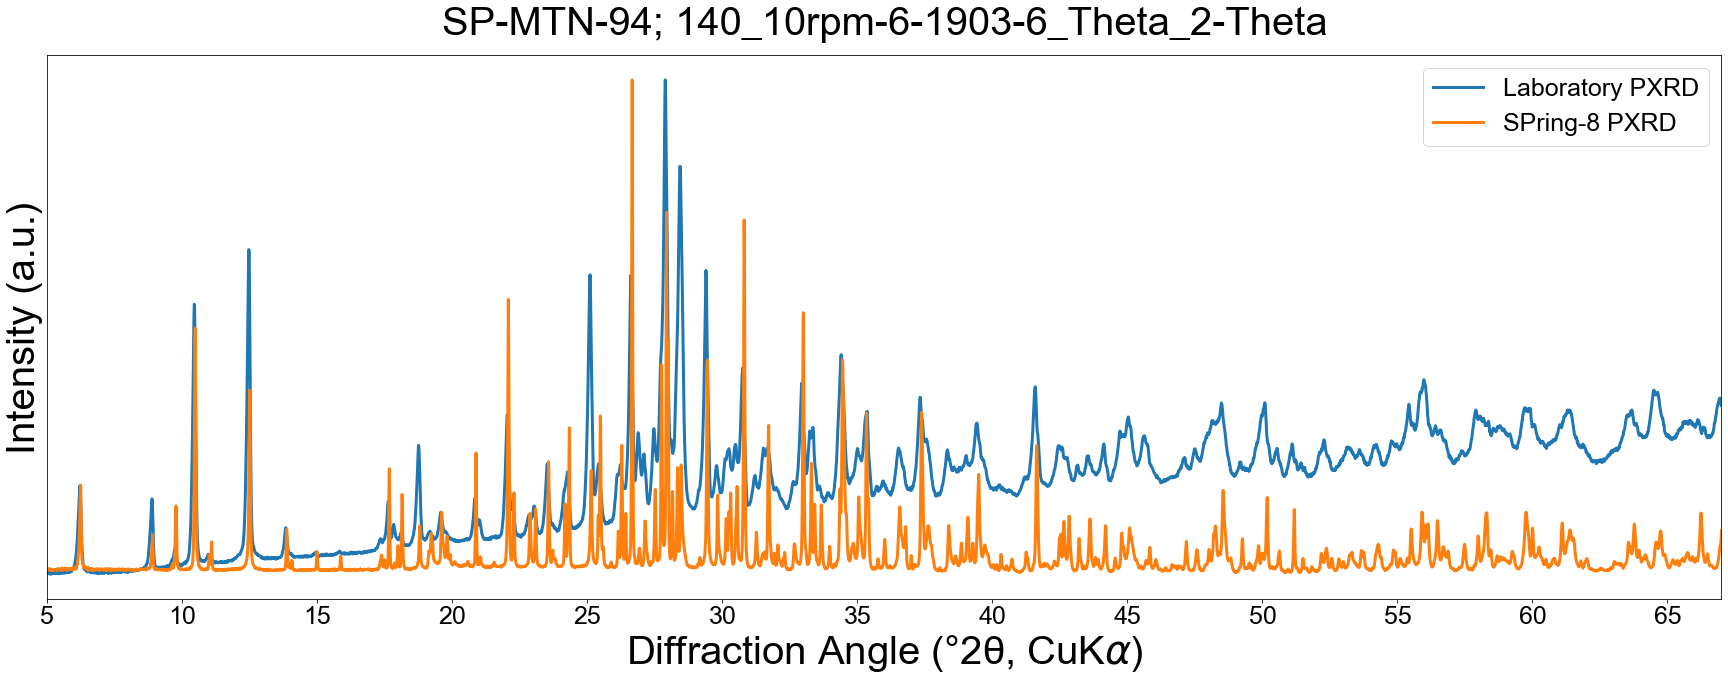

SP-MTN-95 141_10rpm-5-1903-5_Theta_2-Theta


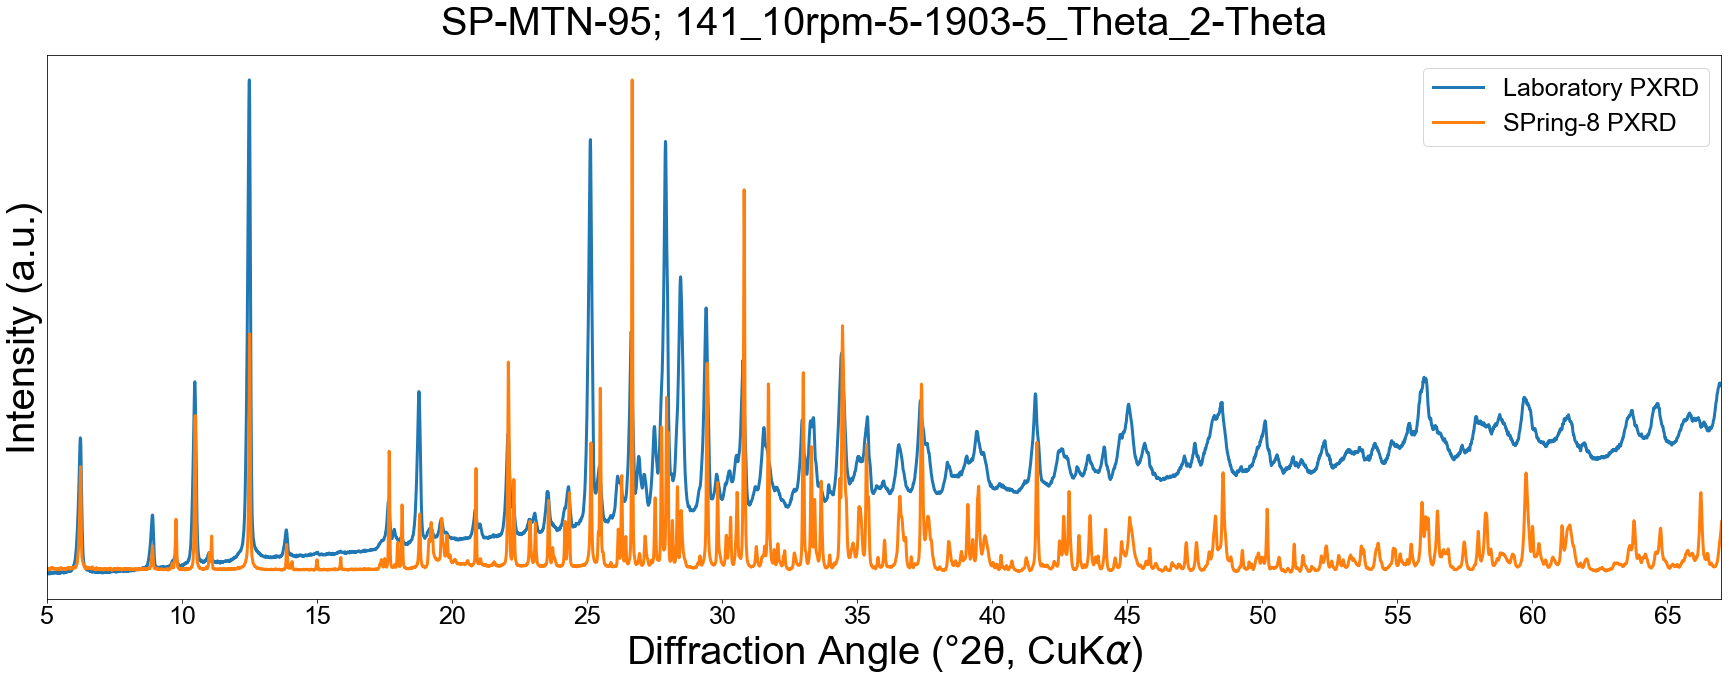

SP-MTN-41 45_MTN2011090101A_Theta_2-Theta


KeyError: '45_MTN2011090101A_Theta_2-Theta'

In [7]:
n=0
for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
    print(SP_sample_name, Lab_sample_name)
    Path_Df.loc[SP_sample_name]

    SP_path = Path_Df.loc[SP_sample_name]["Path"]
    LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

    # ファイルパスを指定して読み込み: pd.read_csv(file_path, sep='\s+', header=None)
    df_inhouse = pd.read_csv(LAB_path, sep='\s+', header=None)
    df_inhouse.columns = ["2θ", "Intensity"]

    df_SP = pd.read_csv(SP_path, sep='\s+', header=None)
    df_SP.columns = ["2θ", "Intensity"]
    # angleをCuKaに変換
    df_SP = diffraction_angle_change(df_SP, df_SP["2θ"], lambda_SP, lambda_LAB)    

    

    # データフレーム内の"Intensity"列に対してMinMaxスケーリングを適用
    # MinMaxScalerを初期化して適用
    scaler = MinMaxScaler()
    df_inhouse["Intensity"] = scaler.fit_transform(df_inhouse[["Intensity"]])
    
    df_SP["Intensity"] = scaler.fit_transform(df_SP[["Intensity"]])

    # XRDプロットを作成
    plt.figure(figsize=(30, 10))
    
    # 実験パターンをプロット
    plt.plot(df_inhouse["2θ"].values, df_inhouse["Intensity"].values, label="Laboratory PXRD", linewidth=3)
    plt.plot(df_SP["2θ_changed"].values, df_SP["Intensity"].values, label="SPring-8 PXRD", linewidth=3)

    # グラフにラベルを追加
    plt.xlabel('Diffraction Angle (°2θ, CuK$\\alpha$)', fontsize=40)
    plt.ylabel('Intensity (a.u.)', fontsize=40)

    # タイトルと凡例を追加
    plt.title(SP_sample_name+"; "+Lab_sample_name, fontsize=40, pad=20)

    # 0から始めて、データの最大値まで5単位ごとの目盛りを作成
    ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 5, 5)

    # ticksのフォントサイズを大きく設定
    plt.xticks(fontsize=25)
    plt.xticks(ticks)
    plt.yticks([])
    
    # x軸の範囲を設定
    plt.xlim([5, 67])

    # 凡例を追加
    plt.legend(fontsize=25)

    # プロットを保存
    #plt.savefig("0_CuKa変換比較用/比較図_ALL/"+sample_title+"_ALL.pdf", bbox_inches="tight")
    plt.show()
    
    n=n+1

print(n)

# Visualize CuKa Diffraction Pattern & CIF data Read 

In [ ]:
wavelength = "CuKa"
# CIF files
gl_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/GL_noH_542_check_VESTA_240122_Modified.cif"
act_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/Actinolite_0001986.cif"

# Sodium AmphiboleとActinoliteのデータを取得
############################ Simulated Pattern
parser = CifParser(gl_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_gl = xrd.get_pattern(mat)
############################ Simulated Pattern

############################ Simulated Pattern
parser = CifParser(act_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_act = xrd.get_pattern(mat)
############################ Simulated Pattern

# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_gl.y = scaler.fit_transform(xrd_data_gl.y.reshape(-1, 1)).flatten()
# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_act.y = scaler.fit_transform(xrd_data_act.y.reshape(-1, 1)).flatten()

# DataFrameに格納
xrd_data_gl_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_gl_df["2θ"] = xrd_data_gl.x
xrd_data_gl_df["Intensity"] = xrd_data_gl.y

xrd_data_act_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_act_df["2θ"] = xrd_data_act.x
xrd_data_act_df["Intensity"] = xrd_data_act.y

# x limitation
limit_value_list = [[4, 67], [18, 20], [30, 35], [25, 30], [9.1, 11.4], [27.5, 28.5], ]
#limit_value_list = [[9.1, 11.4], [27.5, 28.5], ]
limit_value_list_wide = limit_value_list[0]

# Folder path
fig_folder_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/3_Figure/XRD_Pattern"

In [ ]:
n=0
for limit_value in limit_value_list: # limit_value_listのループ
    for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
        print(SP_sample_name, Lab_sample_name)
        sample_title=SP_sample_name
    
        SP_path = Path_Df.loc[SP_sample_name]["Path"]
        LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

        ################################################################# Data Read
        # ファイルパスを指定して読み込み: pd.read_csv(file_path, sep='\s+', header=None)
        df_inhouse = pd.read_csv(LAB_path, sep='\s+', header=None)
        df_inhouse.columns = ["2θ", "Intensity"]
    
        df_SP = pd.read_csv(SP_path, sep='\s+', header=None)
        df_SP.columns = ["2θ", "Intensity"]
        # angleをCuKaに変換
        df_SP = diffraction_angle_change(df_SP, df_SP["2θ"], lambda_SP, lambda_LAB)
        df_SP["2θ"]=df_SP["2θ_changed"].copy()
        ################################################################# Data Read

        ################################################################# Data 指定範囲の抽出
        # データフレームから指定された範囲のデータを抽出
        df_inhouse_filtered = df_inhouse[(df_inhouse["2θ"] >= limit_value[0]) & (df_inhouse["2θ"] <= limit_value[1])]
        df_SP_filtered = df_SP[(df_SP["2θ"] >= limit_value[0]) & (df_SP["2θ"] <= limit_value[1])]
        xrd_data_gl_df_filtered = xrd_data_gl_df[(xrd_data_gl_df["2θ"] >= limit_value[0]) & (xrd_data_gl_df["2θ"] <= limit_value[1])]
        xrd_data_act_df_filtered = xrd_data_act_df[(xrd_data_act_df["2θ"] >= limit_value[0]) & (xrd_data_act_df["2θ"] <= limit_value[1])]
        ################################################################# Data 指定範囲の抽出

        ################################################################# Data 標準化
        # MinMaxScalerを初期化
        scaler = MinMaxScaler()
        # データフレーム内の"Intensity"列に対してMinMaxスケーリングを適用
        df_inhouse_filtered["Intensity"] = scaler.fit_transform(df_inhouse_filtered[["Intensity"]])
        df_SP_filtered["Intensity"] = scaler.fit_transform(df_SP_filtered[["Intensity"]])
        ################################################################# Data 標準化

        # XRDプロットを作成
        if limit_value == limit_value_list_wide:
            plt.figure(figsize=(30, 10))
        else:
            plt.figure(figsize=(13, 16))
            
        if limit_value == limit_value_list_wide:
            linewidth_plot_pattern=3.5
        else:
            linewidth_plot_pattern=6
            
        # rangeが広い時は simulated patternを表示しない
        if limit_value != limit_value_list_wide:
            ############################ Plot Simulated Pattern of Amphibole
            plt.vlines(xrd_data_gl_df_filtered["2θ"].values, 0, xrd_data_gl_df_filtered["Intensity"].values, colors='#000080', linestyles='dashed', label="Sodium Amphibole", linewidth=linewidth_plot_pattern, zorder=4, alpha = 0.5)
            plt.vlines(xrd_data_act_df_filtered["2θ"].values, 0, xrd_data_act_df_filtered["Intensity"].values, colors='#006400', linestyles='dashed', label="Actinolite", linewidth=linewidth_plot_pattern, zorder=4, alpha = 0.5)
            ############################ Plot Simulated Pattern of Amphibole

        ############################ Plot experiment pattern
        plt.plot(df_inhouse_filtered["2θ"].values, df_inhouse_filtered["Intensity"].values, label="Laboratory PXRD", color='#FFC107', linewidth=linewidth_plot_pattern, zorder=2)
        plt.plot(df_SP_filtered["2θ"].values, df_SP_filtered["Intensity"].values, label="SPring-8 PXRD", color='#FF7F50', linewidth=linewidth_plot_pattern, zorder=3)
        ############################ Plot experiment pattern

        # グラフにラベルを追加
        plt.xlabel('Diffraction Angle (°2θ, CuK$\\alpha$)', fontsize=40, labelpad=10)

        plt.ylabel('Intensity (a.u.)', fontsize=40, labelpad=10)

        # タイトルと凡例を追加
        plt.title(SP_sample_name+"; "+Lab_sample_name, fontsize=40, pad=20)

        # 0から始めて、データの最大値まで10単位ごとの目盛りを作成
        if limit_value == limit_value_list_wide:
            ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 5, 5)
        else:
            ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 0.5, 0.5)
        
        # ticksのフォントサイズを大きく設定
        plt.xticks(fontsize=25)
        plt.xticks(ticks)
        plt.yticks([])

        # x軸とy軸の範囲を設定
        plt.xlim(limit_value)
        if limit_value == limit_value_list_wide:
            plt.legend(fontsize=30, loc='upper right', frameon=False)
        else:
            pass
        
        plt.savefig(fig_folder_path+"/"+sample_title+"_"+str(limit_value)+".pdf", bbox_inches="tight")
        plt.show()

        n = n+1

# Visualize CuKa Diffraction Pattern

In [ ]:
wavelength = "CuKa"
# CIF files
gl_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/GL_noH_542_check_VESTA_240122_Modified.cif"
act_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/Actinolite_0001986.cif"

# Sodium AmphiboleとActinoliteのデータを取得
############################ Simulated Pattern
parser = CifParser(gl_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_gl = xrd.get_pattern(mat)
############################ Simulated Pattern

############################ Simulated Pattern
parser = CifParser(act_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_act = xrd.get_pattern(mat)
############################ Simulated Pattern

# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_gl.y = scaler.fit_transform(xrd_data_gl.y.reshape(-1, 1)).flatten()
# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_act.y = scaler.fit_transform(xrd_data_act.y.reshape(-1, 1)).flatten()

# DataFrameに格納
xrd_data_gl_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_gl_df["2θ"] = xrd_data_gl.x
xrd_data_gl_df["Intensity"] = xrd_data_gl.y

xrd_data_act_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_act_df["2θ"] = xrd_data_act.x
xrd_data_act_df["Intensity"] = xrd_data_act.y

# x limitation
limit_value_list = [[9.1, 11.4],]
#limit_value_list = [[9.1, 11.4], [27.5, 28.5], ]
limit_value_list_wide = []

# Folder path
fig_folder_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/3_Figure/XRD_Pattern"

In [ ]:
n=0
for limit_value in limit_value_list: # limit_value_listのループ
    for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
        print(SP_sample_name, Lab_sample_name)
        sample_title=SP_sample_name
    
        SP_path = Path_Df.loc[SP_sample_name]["Path"]
        LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

        ################################################################# Data Read
        # ファイルパスを指定して読み込み: pd.read_csv(file_path, sep='\s+', header=None)
        df_inhouse = pd.read_csv(LAB_path, sep='\s+', header=None)
        df_inhouse.columns = ["2θ", "Intensity"]
    
        df_SP = pd.read_csv(SP_path, sep='\s+', header=None)
        df_SP.columns = ["2θ", "Intensity"]
        # angleをCuKaに変換
        df_SP = diffraction_angle_change(df_SP, df_SP["2θ"], lambda_SP, lambda_LAB)
        df_SP["2θ"]=df_SP["2θ_changed"].copy()
        ################################################################# Data Read

        ################################################################# Data 指定範囲の抽出
        # データフレームから指定された範囲のデータを抽出
        df_inhouse_filtered = df_inhouse[(df_inhouse["2θ"] >= limit_value[0]) & (df_inhouse["2θ"] <= limit_value[1])]
        df_SP_filtered = df_SP[(df_SP["2θ"] >= limit_value[0]) & (df_SP["2θ"] <= limit_value[1])]
        xrd_data_gl_df_filtered = xrd_data_gl_df[(xrd_data_gl_df["2θ"] >= limit_value[0]) & (xrd_data_gl_df["2θ"] <= limit_value[1])]
        xrd_data_act_df_filtered = xrd_data_act_df[(xrd_data_act_df["2θ"] >= limit_value[0]) & (xrd_data_act_df["2θ"] <= limit_value[1])]
        ################################################################# Data 指定範囲の抽出

        ################################################################# Data 標準化
        # MinMaxScalerを初期化
        scaler = MinMaxScaler()
        # データフレーム内の"Intensity"列に対してMinMaxスケーリングを適用
        df_inhouse_filtered["Intensity"] = scaler.fit_transform(df_inhouse_filtered[["Intensity"]])
        df_SP_filtered["Intensity"] = scaler.fit_transform(df_SP_filtered[["Intensity"]])
        ################################################################# Data 標準化

        # XRDプロットを作成
        if limit_value == limit_value_list_wide:
            plt.figure(figsize=(30, 10))
        else:
            plt.figure(figsize=(13, 16))
            
        if limit_value == limit_value_list_wide:
            linewidth_plot_pattern=3.5
        else:
            linewidth_plot_pattern=6
            
        ############################ Plot experiment pattern
        plt.plot(df_inhouse_filtered["2θ"].values, df_inhouse_filtered["Intensity"].values, label="Laboratory PXRD", color='#FFC107', linewidth=linewidth_plot_pattern, zorder=2)
        plt.plot(df_SP_filtered["2θ"].values, df_SP_filtered["Intensity"].values, label="SPring-8 PXRD", color='#FF7F50', linewidth=linewidth_plot_pattern, zorder=3)
        ############################ Plot experiment pattern

        # グラフにラベルを追加
        plt.xlabel('Diffraction Angle (°2θ, CuK$\\alpha$)', fontsize=40, labelpad=10)

        plt.ylabel('Intensity (a.u.)', fontsize=40, labelpad=10)

        # タイトルと凡例を追加
        plt.title(SP_sample_name+"; "+Lab_sample_name, fontsize=40, pad=20)

        # 0から始めて、データの最大値まで10単位ごとの目盛りを作成
        if limit_value == limit_value_list_wide:
            ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 5, 5)
        else:
            ticks = np.arange(0, int(max(df_inhouse["2θ"].values)) + 0.5, 0.5)
        
        # ticksのフォントサイズを大きく設定
        plt.xticks(fontsize=25)
        plt.xticks(ticks)
        plt.yticks([])

        # x軸とy軸の範囲を設定
        plt.xlim(limit_value)
        if limit_value == limit_value_list_wide:
            plt.legend(fontsize=30, loc='upper right', frameon=False)
        else:
            pass
        
        plt.savefig(fig_folder_path+"/"+sample_title+"_"+str(limit_value)+"_.pdf", bbox_inches="tight")
        plt.show()

        n = n+1

# Visualize d-value Pattern & CIF data Read 

In [ ]:
wavelength = "CuKa"
# CIF files
gl_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/GL_noH_542_check_VESTA_240122_Modified.cif"
act_cif = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/0_Single_Crystal_XRD/240122/Actinolite_0001986.cif"

# Sodium AmphiboleとActinoliteのデータを取得
############################ Simulated Pattern
parser = CifParser(gl_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_gl = xrd.get_pattern(mat)
############################ Simulated Pattern

############################ Simulated Pattern
parser = CifParser(act_cif)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]
xrd = XRDCalculator(wavelength=wavelength)
xrd_data_act = xrd.get_pattern(mat)
############################ Simulated Pattern

# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_gl.y = scaler.fit_transform(xrd_data_gl.y.reshape(-1, 1)).flatten()
# MinMaxScalerを初期化
scaler = MinMaxScaler()
xrd_data_act.y = scaler.fit_transform(xrd_data_act.y.reshape(-1, 1)).flatten()

# DataFrameに格納
xrd_data_gl_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_gl_df["2θ"] = xrd_data_gl.x
xrd_data_gl_df["Intensity"] = xrd_data_gl.y

xrd_data_act_df = pd.DataFrame(columns = ["2θ", "Intensity"])
xrd_data_act_df["2θ"] = xrd_data_act.x
xrd_data_act_df["Intensity"] = xrd_data_act.y

# x limitation
#limit_value_list = [[16, 3], [9.5, 8.3], [3.28, 3.18]]
limit_value_list = [[26, 1.5], [10, 8.3], [3.28, 3.18]]
limit_value_list_wide = limit_value_list[0]

# Folder path
fig_folder_path = "/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/3_Figure/XRD_Pattern"

In [ ]:
# n=0
for limit_value in limit_value_list: # limit_value_listのループ
    for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
        print(SP_sample_name, Lab_sample_name)
        sample_title=SP_sample_name
    
        SP_path = Path_Df.loc[SP_sample_name]["Path"]
        LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

        ################################################################# Data Read
        # ファイルパスを指定して読み込み: pd.read_csv(file_path, sep='\s+', header=None)
        df_inhouse = pd.read_csv(LAB_path, sep='\s+', header=None)
        df_inhouse.columns = ["2θ", "Intensity"]
    
        df_SP = pd.read_csv(SP_path, sep='\s+', header=None)
        df_SP.columns = ["2θ", "Intensity"]

        # angleをd_valueに変換
        df_SP = diffraction_angle_change(df_SP, df_SP["2θ"], lambda_SP, lambda_LAB)
        df_inhouse = diffraction_angle_change(df_inhouse, df_inhouse["2θ"], lambda_LAB, lambda_SP)
        xrd_data_gl_df = diffraction_angle_change(xrd_data_gl_df, xrd_data_gl_df["2θ"], lambda_LAB, lambda_SP)
        xrd_data_act_df = diffraction_angle_change(xrd_data_act_df, xrd_data_act_df["2θ"], lambda_LAB, lambda_SP)

        df_inhouse["2θ"]=df_inhouse["d-value"].copy()
        df_SP["2θ"]=df_SP["d-value"].copy()
        xrd_data_gl_df["2θ"]=xrd_data_gl_df["d-value"].copy()
        xrd_data_act_df["2θ"]=xrd_data_act_df["d-value"].copy()
        ################################################################# Data Read

        ################################################################# Data 指定範囲の抽出
        # データフレームから指定された範囲のデータを抽出
        df_inhouse_filtered = df_inhouse[(df_inhouse["d-value"] >= limit_value[1]) & (df_inhouse["d-value"] <= limit_value[0])]
        df_SP_filtered = df_SP[(df_SP["d-value"] >= limit_value[1]) & (df_SP["d-value"] <= limit_value[0])]
        xrd_data_gl_df_filtered = xrd_data_gl_df[(xrd_data_gl_df["d-value"] >= limit_value[1]) & (xrd_data_gl_df["d-value"] <= limit_value[0])]
        xrd_data_act_df_filtered = xrd_data_act_df[(xrd_data_act_df["d-value"] >= limit_value[1]) & (xrd_data_act_df["d-value"] <= limit_value[0])]
        ################################################################# Data 指定範囲の抽出

        ################################################################# Data 標準化
        # MinMaxScalerを初期化
        scaler = MinMaxScaler()
        # データフレーム内の"Intensity"列に対してMinMaxスケーリングを適用
        df_inhouse_filtered["Intensity"] = scaler.fit_transform(df_inhouse_filtered[["Intensity"]])
        df_SP_filtered["Intensity"] = scaler.fit_transform(df_SP_filtered[["Intensity"]])
        ################################################################# Data 標準化

        # XRDプロットを作成
        if limit_value == limit_value_list_wide:
            plt.figure(figsize=(30, 10))
        else:
            plt.figure(figsize=(13, 16))
            
        if limit_value == limit_value_list_wide:
            linewidth_plot_pattern=3.5
        else:
            linewidth_plot_pattern=6
            
        # rangeが広い時は simulated patternを表示しない
        if limit_value != limit_value_list_wide:
            ############################ Plot Simulated Pattern of Amphibole
            plt.vlines(xrd_data_gl_df_filtered["d-value"].values, 0, xrd_data_gl_df_filtered["Intensity"].values, colors='#000080', linestyles='dashed', label="Sodium Amphibole", linewidth=linewidth_plot_pattern, zorder=4)
            plt.vlines(xrd_data_act_df_filtered["d-value"].values, 0, xrd_data_act_df_filtered["Intensity"].values, colors='#006400', linestyles='dashed', label="Actinolite", linewidth=linewidth_plot_pattern, zorder=4)
            ############################ Plot Simulated Pattern of Amphibole

        ############################ Plot experiment pattern
        plt.plot(df_inhouse_filtered["d-value"].values, df_inhouse_filtered["Intensity"].values, label="Laboratory PXRD", color='#FFC107', linewidth=linewidth_plot_pattern, zorder=2)
        plt.plot(df_SP_filtered["d-value"].values, df_SP_filtered["Intensity"].values, label="SPring-8 PXRD", color='#FF7F50', linewidth=linewidth_plot_pattern, zorder=3)
        ############################ Plot experiment pattern

        # グラフにラベルを追加
        plt.xlabel('d-value [Å]', fontsize=40, labelpad=10)

        plt.ylabel('Intensity (a.u.)', fontsize=40, labelpad=10)

        # タイトルと凡例を追加
        plt.title(SP_sample_name+"; "+Lab_sample_name, fontsize=40, pad=20)

        # 0から始めて、データの最大値まで10単位ごとの目盛りを作成
        if limit_value == limit_value_list_wide:
            ticks = np.arange(0, int(max(df_inhouse["d-value"].values)) + 5, 5)
        else:
            pass
            #ticks = np.arange(0, int(max(df_inhouse["d-value"].values)) + 0.5, 0.1)
        
        # ticksのフォントサイズを大きく設定
        plt.xticks(fontsize=25)
        plt.xticks(ticks)
        plt.yticks([])

        # x軸とy軸の範囲を設定
        plt.xlim(limit_value)
        if limit_value == limit_value_list_wide:
            plt.legend(fontsize=30, loc='upper right', frameon=False)
        else:
            pass

        # x軸を反転
        plt.gca().invert_xaxis()
        
        plt.savefig(fig_folder_path+"/"+sample_title+"_d-value_"+str(limit_value)+".pdf", bbox_inches="tight")
        plt.show()

        n = n+1

In [ ]:
/Users/satoshi_matsuno/Desktop/研究/0_DATA/6_EPMA_XRD検証/0_Data/3_Figure/XRD_Pattern